# Imports

In [1]:
from collections import Counter
from nltk import sent_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
import collections
import csv
import itertools
import math
import matplotlib.pyplot as plt
import nltk
import nltk.tokenize
import numpy as np #for text pre-processing
import operator
import pandas as pd
import pathlib
import pickle
import re, string
import seaborn
import string

# Gensim
import gensim
from gensim.models import Word2Vec

# SKLearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix,precision_score
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
from sklearn.metrics import roc_curve, auc, roc_auc_score,recall_score # bag of words
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC

#Tensorflow v. 2.5.0
#Install as following: !pip install tensorflow==2.5.0
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')#for model-building
ps = PorterStemmer()

C:\Users\Martin\Anaconda3\envs\fyp04\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


***

# Functions

### _1) Reading in files and append them into corpus list_

In [2]:
tok = nltk.tokenize.TreebankWordTokenizer()

def make_corpus(filename):
    corpus = []
    with open(filename, 'r') as f:
        for line in f:
            corpus.extend(t for line in f for t in tok.tokenize(line))
    
    return corpus

### _2) Convert corpus into data frame_

a) voc: counts the total number of tokens in corpus

b) frq_ returns a dataframe with tokens and frequency of each token
    

In [3]:
def dataframe_corpus(corpus):
    voc = collections.Counter(corpus)
    frq = pandas.DataFrame(voc.most_common(), columns=['token', 'frequency'])

    return frq

### _3) Frequency normalized by corpus size and Cumulative normalized frequency inserted into dataframe_

In [4]:
def freq_cum(frq):
    # Index in the sorted list
    frq['idx'] = frq.index + 1

    # Frequency normalised by corpus size
    frq['norm_freq'] = frq.frequency / len(corpus)

    # Cumulative normalised frequency
    frq['cumul_frq'] = frq.norm_freq.cumsum()

    return frq


### _4) Plots for Culumative frequency and Log-log plot for Zipf's law_

In [5]:
seaborn.set(style='whitegrid')

# Plot: Cumulative frequency by index
def freq_cum_plot(frq):
    seaborn.relplot(x='idx', y='cumul_frq', data=frq)
    return plt.show()

# Plot: Cumulative frequency by index, top x tokens
def freq_cum_plot_top_x_tokens(frq, top_x):
    seaborn.relplot(x='idx', y='cumul_frq', data=frq[:int(top_x)], kind='line')
    return plt.show()

# Plot: Log-log plot for Zipf's law
def zipfs_law(frq):
    frq['log_frq'] = numpy.log(frq.frequency)
    frq['log_rank'] = numpy.log(frq.frequency.rank(ascending=True))
    seaborn.relplot(x='log_rank', y='log_frq', data=frq)
    return plt.show()

***

## a.1) Tokenization

In [6]:
def token_sentences(text):
    sentences = sent_tokenize(text)
    return sentences


def tokenization(words,text):
    tokens = word_tokenize(text[1:])
    words = [token.lower() for token in tokens if token.isalpha()]   
    return words

#### a.1.1) Comparing TweetTokenizer with NLTK Tokenizer (Task 1)

In [7]:
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import  word_tokenize

def comparing_tokenizer(text):
    tt = TweetTokenizer()
    tweet_tokenizer = tt.tokenize(text)
    word_tweet_tok = word_tokenize(text)
    return tweet_tokenizer, word_tweet_tok

#output example:

# tweet_tokenizer       = ['#ibelieveblaseyford', 'is', 'liar', 'she', 'is']
# word_tweet_tok (NLTK) = ['#', 'ibelieveblaseyford', 'is', 'liar', 'she']

#### a.1.2) Spacy library

In [8]:
def split_in_sentences(text):
    doc = nlp(text)
    return [str(sent).strip() for sent in doc.sents]

## a.2) Vocabulary 

In [9]:
#converting a dataframe into a single list 
#text is split into words defined by their space inbetween
#words are inserted into list 
def words_list(text):
    #words are inserted into list 
    corpus=[]
    for row in text:
        tokens = row[0].split(" ")
        for token in tokens:
            corpus.append(token)
    
    
    def vocabulary_list(corpus):
        #initlialize the vocabulary
        vocab = list(set(" ".join(corpus)))
        vocab.remove(' ')
        return vocab
      
    
    def split_words_char(corpus):
        #split the word into characters
        corpus = [" ".join(token) for token in corpus]
        #appending </w>
        corpus=[token+' </w>' for token in corpus]
        return corpus
        
    x,y = split_words_char(corpus), vocabulary_list(corpus)
    return x,y


# Creating the Bag of Words model
def bag_of_words(text):
    word2count = {}
    for data in text:
        words = nltk.word_tokenize(data)
        for word in words:  
            if word not in word2count.keys():
                word2count[word] = 1
            else:
                word2count[word] += 1
    return word2count   



## b) Pre-processing and cleaning

In [10]:
# removing punctuations
# convert all words into lower cases
# remove stop words

def preprocess_text(words):
    #delete punctuations
    punctuation_table = str.maketrans('', '', string.punctuation)

    #convert all words into lower cases
    words = [word.translate(punctuation_table).lower() for word in words]
    
    #remove stopwords
    from nltk.corpus import stopwords
    stop_words = stopwords.words('english')
    words = [word for word in words if word not in stop_words]

    return words

# cleaning sentences within data frame
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", elem))  
    return df

def del_punctuations(words):
    punctuation_table = str.maketrans('', '', string.punctuation)
    words = [word.translate(punctuation_table).lower() for word in words]
    return words


def stop_words(words):
    stop_words = stopwords.words('english')
    words = [word for word in words if word not in stop_words]
    return words

def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text


## c) Basic statistics

In [11]:
# number of tokens, sentences, average tokens, total unique tokens, total number of tokens after cleaning

def basic_statistics(text,printer = False):
    sents = nltk.sent_tokenize(text)
    tokens = word_tokenize(text[1:])
    words = [token.lower() for token in tokens if token.isalpha()]
    average_tokens = round(len(words)/len(sents))
    unique_tokens = set(words)
    token_ratio = round(len(unique_tokens)/len(tokens),3)
    stop_words = set(stopwords.words('english'))
    final_tokens = []
    for each in words:
        if each not in stop_words:
            final_tokens.append(each)
    if printer == True:
        print(f'The number of characters: {len(text)}')
        print(f'The number of tokens is: {len(tokens)}')
        print(f'The number of sentences is: {len(sents)}')
        print(f'The average number of tokens per sentence is: {average_tokens}')
        print(f'The size of the vocabulary (unique tokens) are: {len(unique_tokens)}')
        print(f'The tokens ratio is: {token_ratio}')
        print(f'The number of total tokens after removing stopwords are: {len(final_tokens)}')
    return len(text), len(tokens), len(sents), average_tokens, len(unique_tokens), token_ratio, len(final_tokens)

def word_frequency(words):
    frequency_words = collections.Counter(words)
    
    #convert counter object to dictionary
    frequency_words_dict = dict(frequency_words)
    res = dict(sorted(frequency_words_dict.items(), key=lambda item: item[1]))
    return res

def top_20_most_common_words(freq_words):
    res = dict(Counter(freq_words).most_common(20))
    return res

def most_common_words(dictionary):
    # Output a dict of most common words
    return dict(sorted(dictionary.items(),key=lambda x: x[1], reverse=True))

def least_common_words(dictionary):
    return sorted(list(dictionary.items()),key=lambda x: x[1])


# Function for loglog plots
def llplot(list_var, labels, title):
    """Function that takes a list of datasets, list of labels and a title as string, and plots a loglogplot, example:
    llplot([offensive_freq_words_val, offensive_freq_words_train, offensive_freq_words_test], ["val", "train", "test"], "Offensive dataset, loglog plot")
    """
    # Size of the figure:
    plt.figure(figsize = (7,6))
    # Iterating through the datasets:
    for idx, i in enumerate(list_var):
        y = np.log(list(most_common_words(i).values()))
        x = np.log([i for i in range(1,len(y)+1)])
        plt.scatter(x, y, label = labels[idx])
    # Labeling title and axis:
    plt.title(title)
    plt.xlabel("Rank of word")
    plt.ylabel("Frequency of word")
    # Plotting:
    plt.legend()
    plt.show()
    return None

# Statistics for a dataset with Zipf's law and labels ditribution
def dataset_statistics(dataset, title, path):
    cleaned_words = del_punctuations(dataset)
    token = tokenization(cleaned_words, dataset)
    cleaned_words = stop_words(token)
    freq_words = word_frequency(cleaned_words)
    top_20 = top_20_most_common_words(freq_words)
    least_words = least_common_words(freq_words)
    
    print("Statistics for " + title + " dataset:\n")
    print('Top 20 in freq_words \n',top_20, '\n')
    print('Top 20 least common words in freq_words \n',least_words[0:20], '\n')

    # Tokens statistics and ratio:
    _, tokens, _, _,unique_tokens, _ ,_ = basic_statistics(dataset,printer = True)

    # LogLog plot of words
    print("\nZipf's law, LogLog Plot")
    llplot([freq_words], labels=["all"], title="Cleaned " + title + " dataset, loglog plot")
    
    # Plot of True labels distribution
    print("Distribution of true labels:\n")
    test_path = path + "test_labels.txt"
    val_path = path + "val_labels.txt"
    train_path = path + "train_labels.txt"
    map_path = path + "mapping.txt"

    print("Plot of labels distribution:")
    test_labels = make_corpus(test_path) + make_corpus(val_path) + make_corpus(train_path)
    test_labels = [int(i) for i in test_labels]
    test_labels = dict(collections.Counter(test_labels))
    test_labels = collections.OrderedDict(sorted(test_labels.items()))
    plt.bar(test_labels.keys(), test_labels.values())
    plt.show()
    
    #List of emoji labels
    label_df = pd.read_csv(map_path, sep='\t', lineterminator='\n', header=None)
    label_df = label_df.iloc[: , :-1]
    label_df = label_df.rename(columns={0:"Label no.",1:"Emoji", 2:"Emoji as txt"})
    label_df["Count"] = test_labels.values()
    label_df["Percentage"] = round(label_df["Count"]/label_df["Count"].sum()*100,2)

    # Sorting by count
    label_df.sort_values("Count", ascending = False)
    print(label_df)
    
    return top_20

## Spacy Library: Pre-processing, Class Distribution, Statistics

In [12]:
def merging_labels_and_sentences(textfile, labelfile):

    # read textfile and labelfile into two separate dataframes
    df_text = pd.read_csv(textfile + '.txt', header=None, skiprows = 0,
        names=['tweet'], sep='\t', quoting=3)
    df_labels = pd.read_csv(labelfile + '.txt',header=None, skiprows = 0, names=['label'],
        sep='\t', quoting=3)

    index_text = [x for x in range(1, len(df_text.values)+1)]

    df_labels.insert(loc=0, column='id', value =index_text)
    df_text.insert(loc=0, column='id', value =index_text)
    final_df = df_text.merge(df_labels, on='id', how='left')

    return final_df

def missing_values(dataframe):
    res = dataframe.isna().sum()
    return res

def word_count(dataframe_col):
    dataframe_col['word_count'] = dataframe_col['tweet'].apply(lambda x: len(str(x).split()))
    
    avg_off_tweets = round(dataframe_col[dataframe_col['label']==1]['word_count'].mean(),3)
    avg_non_off_tweets = round(dataframe_col[dataframe_col['label']==0]['word_count'].mean(),3) 

    return dataframe_col, avg_off_tweets, avg_non_off_tweets
# CHARACTER-COUNT
def char_count(dataframe_col):
    dataframe_col['char_count'] = dataframe_col['tweet'].apply(lambda x: len(str(x)))
    
    #the average characters in offensive tweets
    avg_char_off = round(dataframe_col[dataframe_col['label']==1]['char_count'].mean(),3) 

    #the average characters in non-offensive tweets
    avg_char_non_off = round(dataframe_col[dataframe_col['label']==0]['char_count'].mean(),3)

    return dataframe_col, avg_char_off, avg_char_non_off

def class_distribution(dataframe,title,xlabel_title):
    x = dataframe['label'].value_counts()
    barplot = seaborn.barplot(x.index, x)
    barplot.set_title(title)
    barplot.set_xlabel(xlabel_title)
    barplot.set_ylabel("Count")
 
    return barplot

def plot_word_count(dataframe):
    # PLOTTING WORD-COUNT
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
    dataframe_words=dataframe[dataframe['label']==1]['word_count']
    ax1.hist(dataframe_words,color='red')
    ax1.set_title('offensive tweets')
    dataframe_words=dataframe[dataframe['label']==0]['word_count']
    ax2.hist(dataframe_words,color='green')
    ax2.set_title('non-offensive tweets')
    fig.suptitle('Words per tweet')
    ax2.set_xlabel("Length of tweet")
    ax2.set_ylabel("occurrences")
    ax1.set_xlabel("Length of tweet")
    ax1.set_ylabel("occurrences")
    fig.savefig('word_count_plot.png')
    plt.show()

def split_dataset(dataframe):
    X_train, X_test, y_train, y_test = train_test_split(dataframe["tweet"],dataframe      
    ["label"],test_size=0.2,shuffle=True)
    return X_train, X_test, y_train, y_test

def tokenize_train_test(X_train, X_test):
    #Word2Vec
    # Word2Vec runs on tokenized sentences
    X_train_tok= [nltk.word_tokenize(i) for i in X_train]  
    X_test_tok= [nltk.word_tokenize(i) for i in X_test]

    return X_train_tok, X_test_tok
#building Word2Vec model
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([np.mean([self.word2vec[w] 
        for w in words if w in self.word2vec] or [np.zeros(self.dim)], axis=0) 
        for words in X])
def create_bag_of_words(X):

    print ('Creating bag of words...')
    # Initialize the "CountVectorizer" object, which is scikit-learn's
    # bag of words tool.  
    
    # In this example features may be single words or two consecutive words
    vectorizer = CountVectorizer(analyzer = "word",   \
                                 tokenizer = None,    \
                                 preprocessor = None, \
                                 stop_words = None,   \
                                 ngram_range = (1,2), \
                                 max_features = 10000) 

    # fit_transform() does two functions: First, it fits the model
    # and learns the vocabulary; second, it transforms our training data
    # into feature vectors. The input to fit_transform should be a list of 
    # strings. The output is a sparse array
    train_data_features = vectorizer.fit_transform(X)
    
    # Convert to a NumPy array for easy of handling
    train_data_features = train_data_features.toarray()
    
    # tfidf transform
    
    tfidf = TfidfTransformer()
    tfidf_features = tfidf.fit_transform(train_data_features).toarray()

    # Take a look at the words in the vocabulary
    vocab = vectorizer.get_feature_names()
   
    return vectorizer, vocab, train_data_features, tfidf_features, tfidf
def train_logistic_regression(features, label):
    print ("Training the logistic regression model...")

    ml_model = LogisticRegression(C = 100,random_state = 0)
    ml_model.fit(features, label)
    print ('Finished')
    return ml_model



def get_word2vec_embeddings(vectors, clean_questions_tokens, generate_missing=False):
    embeddings = clean_questions_tokens.apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)


def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)
    plt.savefig('confusion_matrix' + title +'.png')
    return plt




## d) Classification

_**Feature Extraction Techniques**_

- Bag Of Words (BOW)
- Tf-Idf
- Word2Vec

_**Models: Binary Classification**_

- SGDClassifier (SGDC)
- Naive Bayes (nb)
- Naive Bayes (Gaussian) (nb)
- Logistic Regression (lr)
- Random Forrest Classifier (clf)

In [13]:
#SPLITTING THE VALIDATION DATASET INTO TRAIN AND TEST
def split_dataset(dataframe):
    X_train, X_test, y_train, y_test = train_test_split(dataframe["tweet"],dataframe      
    ["label"],test_size=0.2,shuffle=True)
    return X_train, X_test, y_train, y_test
    
    
def tokenize_train_test(X_train, X_test,y_train,y_test):
    
    train_df = pd.concat([X_train,y_train],axis=1)
    test_df = pd.concat([X_test,y_test],axis=1)

    X_train_tok= [nltk.word_tokenize(i) for i in train_df["tweet"]]  
    X_test_tok= [nltk.word_tokenize(i) for i in test_df["tweet"]]
    return X_train_tok, X_test_tok, y_train, y_test
    
    
    #shuffle_train = train_df.sample(frac=1).reset_index(drop=True)
    #shuffle_test = test_df.sample(frac=1).reset_index(drop=True)

    #X_train_tok= [nltk.word_tokenize(i) for i in shuffle_train["tweet"]]  
    #X_test_tok= [nltk.word_tokenize(i) for i in shuffle_test["tweet"]]
    #return X_train_tok, X_test_tok, shuffle_train["label"],shuffle_test["label"]



#building Word2Vec model
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([np.mean([self.word2vec[w] 
        for w in words if w in self.word2vec] or [np.zeros(self.dim)], axis=0) 
        for words in X])


## Model prediction

#### _Pre-processed and cleaned dataframe_

In [14]:
def model_prediction_preprocessed_data(dataframe):
    #Pre-processing the new dataset
    dataframe['clean_text'] = dataframe['tweet'].apply(lambda x: finalpreprocess(x)) 
    
    #preprocess the data
    X_test=dataframe['clean_text'] 

    #converting words to numerical data using tf-idf
    X_vector=tfidf_vectorizer.transform(X_test)

    #use the best model to predict 'target' value for the new dataset 
    y_predict = lr_tfidf.predict(X_vector)      
    y_prob = lr_tfidf.predict_proba(X_vector)[:,1]
    dataframe['predict_prob']= y_prob
    dataframe['label']= y_predict
    final=dataframe[['clean_text','label']].reset_index(drop=True)
    return final 


#### _Non pre-processed and non-cleaned dataframe_

In [15]:
def model_prediction_nonprocessed_data(dataframe):
    X_test=dataframe['tweet'] 

    #converting words to numerical data using tf-idf
    X_vector=tfidf_vectorizer.transform(X_test)

    #use the best model to predict 'target' value for the new dataset 
    y_predict = lr_tfidf.predict(X_vector)      
    y_prob = lr_tfidf.predict_proba(X_vector)[:,1]
    dataframe['predict_prob']= y_prob
    dataframe['label']= y_predict
    final=dataframe[['tweet','label']].reset_index(drop=True)
    return final 


# Knn

In [16]:
def euc_dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNN:
    def __init__(self, K=3):
        self.K = K
    def fit(self, x_train, y_train):
        self.X_train = x_train
        self.Y_train = y_train
    def predict(self, X_test):
        predictions = [] 
        for i in range(len(X_test)):
            dist = np.array([euc_dist(X_test[i], x_t) for x_t in   
            self.X_train])
            dist_sorted = dist.argsort()[:self.K]
            neigh_count = {}
            for idx in dist_sorted:
                if self.Y_train[idx] in neigh_count:
                    neigh_count[self.Y_train[idx]] += 1
                else:
                    neigh_count[self.Y_train[idx]] = 1
            sorted_neigh_count = sorted(neigh_count.items(),    
            key=operator.itemgetter(1), reverse=True)
            predictions.append(sorted_neigh_count[0][0]) 
        return predictions

In [17]:
def create_bag_of_words(X):

    print ('Creating bag of words...')
    # Initialize the "CountVectorizer" object, which is scikit-learn's
    # bag of words tool.  
    
    # In this example features may be single words or two consecutive words
    vectorizer = CountVectorizer(analyzer = "word",   \
                                 tokenizer = None,    \
                                 preprocessor = None, \
                                 stop_words = None,   \
                                 ngram_range = (1,2), \
                                 max_features = 10000) 

    # fit_transform() does two functions: First, it fits the model
    # and learns the vocabulary; second, it transforms our training data
    # into feature vectors. The input to fit_transform should be a list of 
    # strings. The output is a sparse array
    train_data_features = vectorizer.fit_transform(X)
    
    # Convert to a NumPy array for easy of handling
    train_data_features = train_data_features.toarray()
    
    # tfidf transform
    
    tfidf = TfidfTransformer()
    tfidf_features = tfidf.fit_transform(train_data_features).toarray()

    # Take a look at the words in the vocabulary
    vocab = vectorizer.get_feature_names()
   
    return vectorizer, vocab, train_data_features, tfidf_features, tfidf
def train_logistic_regression(features, label):
    print ("Training the logistic regression model...")

    ml_model = LogisticRegression(C = 100,random_state = 0)
    ml_model.fit(features, label)
    print ('Finished')
    return ml_model



def get_word2vec_embeddings(vectors, clean_questions_tokens, generate_missing=False):
    embeddings = clean_questions_tokens.apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)


def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

***

# TASK 1: PRE-PROCESSING AND TOKENIZATION
_ splitting text files into words _


## 1.1) Text file: Emoji
***

### Read in txt files: offensive/emoji.txt

In [18]:
# Validation data
file_path_val = pathlib.Path(r'datasets/emoji/val_text.txt')
with open(file_path_val, 'r',encoding="utf8") as f:
    emoji_text_val = f.read()       
    f.close()
emoji_words_val_txt = emoji_text_val[1:].split()

# Training data
file_path_train = pathlib.Path(r'datasets/emoji/train_text.txt')
with open(file_path_train, 'r',encoding="utf8") as f:
    emoji_text_train = f.read()       
    f.close()
emoji_words_train_txt = emoji_text_train[1:].split()

# Test data
file_path_test = pathlib.Path(r'datasets/emoji/test_text.txt')
with open(file_path_test, 'r',encoding="utf8") as f:
    emoji_text_test = f.read()       
    f.close()
emoji_words_test_txt = emoji_text_test[1:].split()

print(emoji_words_test_txt[:100])

['n', 'Pelham', 'Parkway', 'The', 'calm', 'before......', '|', 'w/', 'sofarsounds', '@user', '|', ':', 'B.', 'Hall.......#sofarsounds…', 'Just', 'witnessed', 'the', 'great', 'solar', 'eclipse', '@', 'Tampa,', 'Florida', 'This', 'little', 'lady', 'is', '26', 'weeks', 'pregnant', 'today!', 'Excited', 'for', 'baby', 'Cam', 'to', 'come!', '@', 'Springfield,…', 'Great', 'road', 'trip', 'views!', '@', 'Shartlesville,', 'Pennsylvania', 'CHRISTMAS', 'DEALS', 'BUY', 'ANY', '3', 'SMALL', 'POMADES', '1.5', 'OR', '1.7', 'OZ', 'RECEIVE', 'THE', 'F&amp;S', 'COLLECTOR', 'TIN', '&amp;', 'COMB…', 'the', '#sisterstunt', 'was', 'mad', 'real', 'last', 'night', '#MiaStaxxx', '#AndreaStaxxx', '#denverqueen', '#staxxxlife…', "I'm", 'starting', 'to', 'love', 'shooting', 'in', 'the', 'dark', '#brandonwolfel', '@', 'New', 'York,', 'New', 'York', 'Let', 'the', 'sun', 'shine', 'through', '️', '5x5', 'Feet', '#oilpainting', '#oiloncanvas', '#acrylicpainting']


### Remove punctuations from txt files
_ meaning signs, spacing and other disturbing features. Alle words are then turned into lower cases_

In [19]:
emoji_cleaned_val_words = del_punctuations(emoji_words_val_txt)
emoji_cleaned_train_words = del_punctuations(emoji_words_train_txt)
emoji_cleaned_test_words = del_punctuations(emoji_words_test_txt)

print('\nval_test.txt:\n',emoji_cleaned_test_words[:100],'\n')


val_test.txt:
 ['n', 'pelham', 'parkway', 'the', 'calm', 'before', '', 'w', 'sofarsounds', 'user', '', '', 'b', 'hallsofarsounds…', 'just', 'witnessed', 'the', 'great', 'solar', 'eclipse', '', 'tampa', 'florida', 'this', 'little', 'lady', 'is', '26', 'weeks', 'pregnant', 'today', 'excited', 'for', 'baby', 'cam', 'to', 'come', '', 'springfield…', 'great', 'road', 'trip', 'views', '', 'shartlesville', 'pennsylvania', 'christmas', 'deals', 'buy', 'any', '3', 'small', 'pomades', '15', 'or', '17', 'oz', 'receive', 'the', 'famps', 'collector', 'tin', 'amp', 'comb…', 'the', 'sisterstunt', 'was', 'mad', 'real', 'last', 'night', 'miastaxxx', 'andreastaxxx', 'denverqueen', 'staxxxlife…', 'im', 'starting', 'to', 'love', 'shooting', 'in', 'the', 'dark', 'brandonwolfel', '', 'new', 'york', 'new', 'york', 'let', 'the', 'sun', 'shine', 'through', '️', '5x5', 'feet', 'oilpainting', 'oiloncanvas', 'acrylicpainting'] 



In [20]:
#nltk.download('punkt')

emoji_sentences_val_txt = token_sentences(emoji_text_val)   
emoji_sentences_train_txt = token_sentences(emoji_text_train)
emoji_sentences_test_txt = token_sentences(emoji_text_test)   

#print(emoji_sentences_val_txt[:5])
#print(emoji_sentences_train_txt[:5])
print(emoji_sentences_test_txt[:5])

['en Pelham Parkway\nThe calm before...... | w/ sofarsounds @user | : B.', 'Hall.......#sofarsounds…\nJust witnessed the great solar eclipse @ Tampa, Florida\nThis little lady is 26 weeks pregnant today!', 'Excited for baby Cam to come!', '@ Springfield,…\nGreat road trip views!', "@ Shartlesville, Pennsylvania\nCHRISTMAS DEALS BUY ANY 3 SMALL POMADES 1.5 OR 1.7 OZ RECEIVE THE F&amp;S COLLECTOR TIN &amp; COMB…\nthe #sisterstunt was mad real last night #MiaStaxxx #AndreaStaxxx #denverqueen #staxxxlife…\nI'm starting to love shooting in the dark #brandonwolfel @ New York, New York\nLet the sun shine through ️ 5x5 Feet #oilpainting #oiloncanvas #acrylicpainting #acryliconcanvas…\nStill bitch im trill never been no fiend :@vibesbygallo #mustard @ Connecticut\nLines for days ️ ️ ️ #dance #dancephotography #dancephotographer #sandiegodance @ Scripps…\nSunrise."]


### Number of words in each tokenization variables

In [21]:
emoji_token_val = tokenization(emoji_cleaned_val_words, emoji_text_val)
emoji_token_train = tokenization(emoji_cleaned_train_words, emoji_text_train)
emoji_token_test = tokenization(emoji_cleaned_test_words, emoji_text_test)

print(f'Number of words in tokenization for val_text: {len(emoji_token_val)}')
print(f'Number of words in tokenization for val_train: {len(emoji_token_train)}')
print(f'Number of words in tokenization for val_test: {len(emoji_token_test)}')

Number of words in tokenization for val_text: 49661
Number of words in tokenization for val_train: 461690
Number of words in tokenization for val_test: 518019


### Removing stopwords like 'and, or, of, is, had.... etc' 

In [22]:
emoji_cleaned_val_words = stop_words(emoji_token_val)
emoji_cleaned_train_words = stop_words(emoji_token_train)
emoji_cleaned_test_words = stop_words(emoji_token_test)

print(f'Number of words after removing Stop Words: {len(emoji_cleaned_val_words)}')
print(f'Number of words after removing Stop Words: {len(emoji_cleaned_train_words)}')
print(f'Number of words after removing Stop Words: {len(emoji_cleaned_test_words)}')

Number of words after removing Stop Words: 33634
Number of words after removing Stop Words: 314706
Number of words after removing Stop Words: 345902


### Frequency of each word

In [23]:
import collections

#returns frequency of each word
emoji_freq_words_val = word_frequency(emoji_cleaned_val_words)
emoji_freq_words_train = word_frequency(emoji_cleaned_train_words)
emoji_freq_words_test = word_frequency(emoji_cleaned_test_words)


#print('_'*112,'\n')
#print('Frequency of words in val_text:\n',list(emoji_freq_words_val.items())[-40:-1], '\n')
#print('_'*112,'\n')
#print('Frequency of words in train_text:\n',list(emoji_freq_words_train.items())[-40:-1], '\n')
#print('_'*112,'\n')
print('Frequency of words in test_text:\n',list(emoji_freq_words_test.items())[-40:-1], '\n')
#print('_'*112,'\n')

Frequency of words in test_text:
 [('always', 740), ('first', 747), ('home', 754), ('year', 759), ('tonight', 770), ('much', 780), ('morning', 782), ('thanks', 785), ('fun', 790), ('thank', 868), ('life', 869), ('city', 897), ('see', 900), ('back', 906), ('little', 937), ('birthday', 960), ('great', 966), ('family', 993), ('beautiful', 1019), ('last', 1030), ('get', 1104), ('best', 1106), ('got', 1133), ('park', 1196), ('like', 1251), ('beach', 1253), ('good', 1318), ('california', 1363), ('christmas', 1410), ('night', 1411), ('york', 1459), ('one', 1488), ('time', 1491), ('today', 1509), ('day', 2184), ('happy', 2519), ('amp', 2560), ('new', 3568), ('love', 3929)] 



### Vocabulary list for offensive text files
_Looking through vocabulary lists can help you find problems
(especially tokens that only occur once or twice)._

In [24]:
emoji_corpus_val, emoji_vocab_val = words_list(emoji_text_val)
emoji_corpus_train, emoji_vocab_train = words_list(emoji_text_train)
emoji_corpus_test, emoji_vocab_test = words_list(emoji_text_test)

#print('Vocabulary for text_val.txt:\n', emoji_vocab_val[:20],'\n')
#print('Vocabulary for text_train.txt:\n', emoji_vocab_train[:20],'\n')
print('Vocabulary for text_test.txt:\n', emoji_vocab_test[:20],'\n')

Vocabulary for text_test.txt:
 ['é', 'ก', '𝑒', '㊣', '場', 'ⓞ', 'ノ', '여', 'K', 'Ξ', 'Ｔ', 'ｌ', '\u200b', 'к', '布', '€', '浴', 'G', '·', 'င'] 



### Read in txt files: offensive/val_text.txt

In [25]:
# Offensive
# Validation data
file_path_val = pathlib.Path(r'datasets/offensive/val_text.txt')
with open(file_path_val, 'r',encoding="utf8") as f:
    offensive_text_val = f.read()       
    f.close()
offensive_words_val_txt = offensive_text_val[1:].split()

# Training data
file_path_train = pathlib.Path(r'datasets/offensive/train_text.txt')
with open(file_path_train, 'r',encoding="utf8") as f:
    offensive_text_train = f.read()       
    f.close()   
offensive_words_train_txt = offensive_text_train[1:].split()

# Test data
file_path_test = pathlib.Path(r'datasets/offensive/test_text.txt')
with open(file_path_test, 'r',encoding="utf8") as f:
    offensive_text_test = f.read()       
    f.close()  
offensive_words_test_txt = offensive_text_test[1:].split()

print(offensive_words_test_txt[:100])

['ibelieveblaseyford', 'is', 'liar', 'she', 'is', 'fat', 'ugly', 'libreal', '#snowflake', 'she', 'sold', 'her', 'herself', 'to', 'get', 'some', 'cash', '!!', 'From', 'dems', 'and', 'Iran', '!', 'Why', 'she', 'spoke', 'after', '#JohnKerryIranMeeting', '?', '@user', '@user', '@user', 'I', 'got', 'in', 'a', 'pretty', 'deep', 'debate', 'with', 'my', 'friend', 'and', 'she', 'told', 'me', 'that', 'latinos', 'for', 'Trump', 'and', 'blacks', 'for', 'Trump', 'were', 'paid', 'supporters', '😂', 'then', 'I', 'said', 'you', 'mean', 'antifa', 'are', 'paid', 'domestic', 'terrorist', 'and', 'she', 'said', 'No', 'they', 'are', 'anti-fascist', 'then', 'I', 'said', 'they', 'are', 'the', 'fascist', 'are', 'you', 'kidding', 'me?!', '...if', 'you', 'want', 'more', 'shootings', 'and', 'more', 'death,', 'then', 'listen', 'to', 'the', 'ACLU,', 'Black']


### Remove punctuations from txt files
_ meaning signs, spacing and other disturbing features. Alle words are then turned into lower cases_

In [26]:
offensive_cleaned_val_words = del_punctuations(offensive_words_val_txt)
offensive_cleaned_train_words = del_punctuations(offensive_words_train_txt)
offensive_cleaned_test_words = del_punctuations(offensive_words_test_txt)

#print('val_text.txt:\n',offensive_cleaned_val_words[:100],'\n')
#print('\nval_train.txt:\n',offensive_cleaned_train_words[:100], '\n')
print('\nval_test.txt:\n',offensive_cleaned_test_words[:100],'\n')


val_test.txt:
 ['ibelieveblaseyford', 'is', 'liar', 'she', 'is', 'fat', 'ugly', 'libreal', 'snowflake', 'she', 'sold', 'her', 'herself', 'to', 'get', 'some', 'cash', '', 'from', 'dems', 'and', 'iran', '', 'why', 'she', 'spoke', 'after', 'johnkerryiranmeeting', '', 'user', 'user', 'user', 'i', 'got', 'in', 'a', 'pretty', 'deep', 'debate', 'with', 'my', 'friend', 'and', 'she', 'told', 'me', 'that', 'latinos', 'for', 'trump', 'and', 'blacks', 'for', 'trump', 'were', 'paid', 'supporters', '😂', 'then', 'i', 'said', 'you', 'mean', 'antifa', 'are', 'paid', 'domestic', 'terrorist', 'and', 'she', 'said', 'no', 'they', 'are', 'antifascist', 'then', 'i', 'said', 'they', 'are', 'the', 'fascist', 'are', 'you', 'kidding', 'me', 'if', 'you', 'want', 'more', 'shootings', 'and', 'more', 'death', 'then', 'listen', 'to', 'the', 'aclu', 'black'] 



### Number of words in each tokenization variables

In [27]:
from nltk.tokenize import word_tokenize

offensive_token_val = tokenization(offensive_cleaned_val_words, offensive_text_val)
offensive_token_train = tokenization(offensive_cleaned_train_words, offensive_text_train)
offensive_token_test = tokenization(offensive_cleaned_test_words, offensive_text_test)

print(f'Number of words in tokenization for val_text: {len(offensive_token_val)}')
print(f'Number of words in tokenization for val_train: {len(offensive_token_train)}')
print(f'Number of words in tokenization for val_test: {len(offensive_token_test)}')

Number of words in tokenization for val_text: 30491
Number of words in tokenization for val_train: 258990
Number of words in tokenization for val_test: 19711


### Removing stopwords like 'and, or, of, is, had.... etc' 

In [28]:
from nltk.corpus import stopwords

offensive_cleaned_val_words = stop_words(offensive_token_val)
offensive_cleaned_train_words = stop_words(offensive_token_train)
offensive_cleaned_test_words = stop_words(offensive_token_test)

print(f'Number of words after removing Stop Words: {len(offensive_cleaned_val_words)}')
print(f'Number of words after removing Stop Words: {len(offensive_cleaned_train_words)}')
print(f'Number of words after removing Stop Words: {len(offensive_cleaned_test_words)}')


Number of words after removing Stop Words: 17203
Number of words after removing Stop Words: 147828
Number of words after removing Stop Words: 11143


### Frequency of each word

In [29]:
import collections

#returns frequency of each word
offensive_freq_words_val = word_frequency(offensive_cleaned_val_words)
offensive_freq_words_train = word_frequency(offensive_cleaned_train_words)
offensive_freq_words_test = word_frequency(offensive_cleaned_test_words)

#print('_'*112,'\n')
#print('Frequency of words in val_text:\n',list(offensive_freq_words_val.items())[-40:-1], '\n')
#print('_'*112,'\n')
#print('Frequency of words in train_text:\n',list(offensive_freq_words_train.items())[-40:-1], '\n')
#print('_'*112,'\n')
print('Frequency of words in test_text:\n',list(offensive_freq_words_test.items())[-40:-1], '\n')
#print('_'*112,'\n')

Frequency of words in test_text:
 [('keep', 19), ('ever', 19), ('even', 19), ('years', 21), ('go', 21), ('really', 21), ('think', 22), ('life', 22), ('still', 22), ('always', 23), ('support', 24), ('shit', 24), ('time', 25), ('way', 26), ('please', 26), ('need', 27), ('kavanaugh', 28), ('never', 28), ('democrats', 28), ('see', 30), ('going', 30), ('new', 30), ('know', 31), ('good', 31), ('via', 33), ('want', 37), ('love', 38), ('us', 42), ('trump', 44), ('people', 47), ('one', 48), ('get', 51), ('maga', 57), ('gun', 64), ('control', 64), ('like', 65), ('antifa', 74), ('conservatives', 80), ('liberals', 81)] 



# Customized tokenizer with the use of RegEx

In [30]:
#This is the ideal tokenization from the library we were supposed to compare it with
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

sentence = 'football is my passion.'

tknzr.tokenize(sentence)

['football', 'is', 'my', 'passion', '.']

In [31]:
#Recreate
import re
import pathlib

file_path_train = pathlib.Path(r'datasets/offensive/train_text.txt')

token_pattern = re.compile(r'\w+')

with open(file_path_train, 'r',encoding="utf8") as f:
    line = f.readline()
    tokens = []
    while line:
        line = f.readline()
        print(line)
        print("OUR beta tokenizer",re.findall(token_pattern,line))
        print("DESIRED  tokenizer",tknzr.tokenize(line))
        print('\n')
    

@user Eight years the republicans denied obama’s picks. Breitbarters outrage is as phony as their fake president. 

OUR beta tokenizer ['user', 'Eight', 'years', 'the', 'republicans', 'denied', 'obama', 's', 'picks', 'Breitbarters', 'outrage', 'is', 'as', 'phony', 'as', 'their', 'fake', 'president']
DESIRED  tokenizer ['@user', 'Eight', 'years', 'the', 'republicans', 'denied', 'obama', '’', 's', 'picks', '.', 'Breitbarters', 'outrage', 'is', 'as', 'phony', 'as', 'their', 'fake', 'president', '.']


@user Get him some line help. He is gonna be just fine. As the game went on you could see him progressing more with his reads. He brought what has been missing. The deep ball presence. Now he just needs a little more time 

OUR beta tokenizer ['user', 'Get', 'him', 'some', 'line', 'help', 'He', 'is', 'gonna', 'be', 'just', 'fine', 'As', 'the', 'game', 'went', 'on', 'you', 'could', 'see', 'him', 'progressing', 'more', 'with', 'his', 'reads', 'He', 'brought', 'what', 'has', 'been', 'missing', 

DESIRED  tokenizer ['@user', 'You', 'said', 'it', '.', "They're", 'trying', 'to', 'prove', 'that', 'cheepika', 'is', 'goddess', 'and', 'everyone', 'else', 'has', 'nothing', 'to', 'offer', '.', 'It', 'tells', 'everything', 'about', 'how', 'insecure', 'they', 'are', 'as', 'fans', '.', 'Now', 'their', 'target', 'is', 'alia', 'because', 'they', 'know', 'how', 'good', 'she', 'is', '.', 'Alia', 'being', 'so', 'good', 'is', 'threat', 'to', 'their', 'so', 'called', 'goddess', '.']


@user Sir. The Governor House Lahore will be used as a museum and a art gallery. You are the minister for Information and Culture. Please take some measures to protect the place from filth and damage caused by our ignorant public. 

OUR beta tokenizer ['user', 'Sir', 'The', 'Governor', 'House', 'Lahore', 'will', 'be', 'used', 'as', 'a', 'museum', 'and', 'a', 'art', 'gallery', 'You', 'are', 'the', 'minister', 'for', 'Information', 'and', 'Culture', 'Please', 'take', 'some', 'measures', 'to', 'protect', 'the', 'place

DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', 'Liberals', "Don't", 'Appreciate', 'Your', 'Sarcasm', '.', 'They', 'Thought', 'You', 'Were', 'On', 'Their', 'Side', '.']


@user It's fine..... he's gods Prophet 🙄imagine that nowadays... yes officer i did fuck that elementary student BUT its fine bc god said i could.... 

OUR beta tokenizer ['user', 'It', 's', 'fine', 'he', 's', 'gods', 'Prophet', 'imagine', 'that', 'nowadays', 'yes', 'officer', 'i', 'did', 'fuck', 'that', 'elementary', 'student', 'BUT', 'its', 'fine', 'bc', 'god', 'said', 'i', 'could']
DESIRED  tokenizer ['@user', "It's", 'fine', '...', "he's", 'gods', 'Prophet', '🙄', 'imagine', 'that', 'nowadays', '...', 'yes', 'officer', 'i', 'did', 'fuck', 'that', 'elementary', 'student', 'BUT', 'its', 'fine', 'bc', 'god', 'said', 'i', 'could', '...']


@user Definantly 

OUR beta tokenizer ['user', 'Definantly']
DESIRED  tokenizer ['@user', 'Definantly']


@user @user @user @user @user @user @user @user @user @user 

DESIRED  tokenizer ['@user', '👌', '🏻', 'I', '’', 've', 'never', 'seen', 'anyone', 'talk', 'like', 'that', 'on', 'Twitter', 'before', 'and', 'I', '’', 've', 'seen', 'some', 'really', 'messed', 'up', 'shit']


@user Thank you she is a gentle soul xxx😘😘😘❤️❤️❤️ 

OUR beta tokenizer ['user', 'Thank', 'you', 'she', 'is', 'a', 'gentle', 'soul', 'xxx']
DESIRED  tokenizer ['@user', 'Thank', 'you', 'she', 'is', 'a', 'gentle', 'soul', 'xxx', '😘', '😘', '😘', '❤', '️', '❤', '️', '❤', '️']


@user Oh fuck yeah 

OUR beta tokenizer ['user', 'Oh', 'fuck', 'yeah']
DESIRED  tokenizer ['@user', 'Oh', 'fuck', 'yeah']


@user @user Yes as the Democrats and liberals continue to sabotage the November elections it would be the intelligent thing to do so say 20+Million Veterans 

OUR beta tokenizer ['user', 'user', 'Yes', 'as', 'the', 'Democrats', 'and', 'liberals', 'continue', 'to', 'sabotage', 'the', 'November', 'elections', 'it', 'would', 'be', 'the', 'intelligent', 'thing', 'to', 'do', 'so', 'say', '20', 'M

DESIRED  tokenizer ['@user', 'Conservatives', 'who', 'quit', 'rather', 'than', 'fight', 'betray', 'every', 'claim', 'that', 'cons', 'are', 'patriots', '"', '"', '&', '"', '"', 'will', 'fight', 'for', 'our', 'Constitution', '.', '"', '"', 'It', 'reveals', 'extremism', '&', 'defeatism', 'at', 'once', '.', 'Dems', 'KNOW', 'they', 'will', 'win', 'if', 'they', 'stick', 'together', '.', 'History', 'PROVES', 'it', '.', '"', '"']


@user Blow hard 

OUR beta tokenizer ['user', 'Blow', 'hard']
DESIRED  tokenizer ['@user', 'Blow', 'hard']


@user @user @user This leftist is what is wrong in liberal colleges. More ppl and students will come out and will unmask this corrupt woman who is determined to destroy a good judge because she wants only liberals in the courts. @user  @user  @user 

OUR beta tokenizer ['user', 'user', 'user', 'This', 'leftist', 'is', 'what', 'is', 'wrong', 'in', 'liberal', 'colleges', 'More', 'ppl', 'and', 'students', 'will', 'come', 'out', 'and', 'will', 'unmask', 'this', '

DESIRED  tokenizer ['@user', 'He', '’', 's', 'always', 'at', 'the', 'Corey', 'of', 'the', 'non-issue', '.']


@user @user @user I know you're not this naive. Those people make up a very small % of Trump supporters. Do all Liberals support terrorist and (groups such as Antifa? 

OUR beta tokenizer ['user', 'user', 'user', 'I', 'know', 'you', 're', 'not', 'this', 'naive', 'Those', 'people', 'make', 'up', 'a', 'very', 'small', 'of', 'Trump', 'supporters', 'Do', 'all', 'Liberals', 'support', 'terrorist', 'and', 'groups', 'such', 'as', 'Antifa']
DESIRED  tokenizer ['@user', '@user', '@user', 'I', 'know', "you're", 'not', 'this', 'naive', '.', 'Those', 'people', 'make', 'up', 'a', 'very', 'small', '%', 'of', 'Trump', 'supporters', '.', 'Do', 'all', 'Liberals', 'support', 'terrorist', 'and', '(', 'groups', 'such', 'as', 'Antifa', '?']


@user Thank you for this tweet.   Give them a call @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user 

OUR beta 

DESIRED  tokenizer ['@user', 'Shitttt', '.', 'I', 'do', '&', 'does', '.']


@user @user Except for the little attempted rape thing he is just a wonderful guy 

OUR beta tokenizer ['user', 'user', 'Except', 'for', 'the', 'little', 'attempted', 'rape', 'thing', 'he', 'is', 'just', 'a', 'wonderful', 'guy']
DESIRED  tokenizer ['@user', '@user', 'Except', 'for', 'the', 'little', 'attempted', 'rape', 'thing', 'he', 'is', 'just', 'a', 'wonderful', 'guy']


@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user Got all of u- please follow back👍 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'Got', 'all', 'of', 'u', 'please', 'follow', 'back']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@use

DESIRED  tokenizer ['@user', '@user', 'Best', 'female', 'tennis', 'player', 'ever', '?', 'Arguably', '.', 'Great', 'player', '.', 'She', 'is', 'starting', 'to', 'age', 'and', 'become', 'less', 'unbeatable', '.']


@user YOU ARE HELPING THE #RedWaveRising 

OUR beta tokenizer ['user', 'YOU', 'ARE', 'HELPING', 'THE', 'RedWaveRising']
DESIRED  tokenizer ['@user', 'YOU', 'ARE', 'HELPING', 'THE', '#RedWaveRising']


@user @user @user And his son the ANTIFA masked hater is normal? 

OUR beta tokenizer ['user', 'user', 'user', 'And', 'his', 'son', 'the', 'ANTIFA', 'masked', 'hater', 'is', 'normal']
DESIRED  tokenizer ['@user', '@user', '@user', 'And', 'his', 'son', 'the', 'ANTIFA', 'masked', 'hater', 'is', 'normal', '?']


@user @user Because Liberals are insane and btw had this been a Democrat nominee and the accuser was a female conservative she would not be heard. Heck look at Keith Ellison's accuser who has proof. They've turned their back on her and she's a democrat! Why is the @user not

DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', 'Sounds', 'like', 'you', '’', 're', 'talking', 'about', 'these', 'people', '!', '!', '!', '#MAGA']


@user @user You realize California has the strictest gun control in the nation right? Or are you just going to ignore that 

OUR beta tokenizer ['user', 'user', 'You', 'realize', 'California', 'has', 'the', 'strictest', 'gun', 'control', 'in', 'the', 'nation', 'right', 'Or', 'are', 'you', 'just', 'going', 'to', 'ignore', 'that']
DESIRED  tokenizer ['@user', '@user', 'You', 'realize', 'California', 'has', 'the', 'strictest', 'gun', 'control', 'in', 'the', 'nation', 'right', '?', 'Or', 'are', 'you', 'just', 'going', 'to', 'ignore', 'that']


@user @user But you are still going to jail tho #Fredo 

OUR beta tokenizer ['user', 'user', 'But', 'you', 'are', 'still', 'going', 'to', 'jail', 'tho', 'Fredo']
DESIRED  tokenizer ['@user', '@user', 'But', 'you', 'are', 'still', 'going', 'to', 'jail', 'tho', '#Fredo']


@user Misplaced 

DESIRED  tokenizer ['@user', 'Gun', 'control', 'measures', '?', 'As', 'in', 'Fast', 'and', 'Furious', '"', '"', ',', 'where', 'you', 'directed', 'FFL', 'dealers', 'to', 'violate', 'the', 'law', 'and', 'allow', 'straw', 'purchases', '?', 'Where', 'you', 'knowingly', 'allowed', 'firearms', 'to', 'be', 'sold', 'to', 'criminal', 'organizations', '?', '"', '"']


@user Clown 

OUR beta tokenizer ['user', 'Clown']
DESIRED  tokenizer ['@user', 'Clown']


@user @user We can empty all our prisons also and just say they broke no laws.....Liberal logic. 

OUR beta tokenizer ['user', 'user', 'We', 'can', 'empty', 'all', 'our', 'prisons', 'also', 'and', 'just', 'say', 'they', 'broke', 'no', 'laws', 'Liberal', 'logic']
DESIRED  tokenizer ['@user', '@user', 'We', 'can', 'empty', 'all', 'our', 'prisons', 'also', 'and', 'just', 'say', 'they', 'broke', 'no', 'laws', '...', 'Liberal', 'logic', '.']


@user That one sucks bc he is so hit or miss 

OUR beta tokenizer ['user', 'That', 'one', 'sucks', 'bc', 

DESIRED  tokenizer ['@user', '@user', 'Why', 'did', 'Feinstein', 'NOT', 'come', 'forward', 'with', 'that', 'letter', '6', 'weeks', 'ago', 'then', '?', 'No', 'need', 'then', 'to', 'question', 'him', 'way', 'back', 'then', '?', 'LOL', 'you', 'liberals', 'are', 'very', 'funny', '.', 'I', 'am', 'sure', 'the', '#MeToo', 'movement', 'appreciates', 'the', 'set', 'back', 'you', 'all', 'just', 'gave', 'it', '.']


@user By defending and making excuses for obvious bad behavior....you're sure to get more of it. 

OUR beta tokenizer ['user', 'By', 'defending', 'and', 'making', 'excuses', 'for', 'obvious', 'bad', 'behavior', 'you', 're', 'sure', 'to', 'get', 'more', 'of', 'it']
DESIRED  tokenizer ['@user', 'By', 'defending', 'and', 'making', 'excuses', 'for', 'obvious', 'bad', 'behavior', '...', "you're", 'sure', 'to', 'get', 'more', 'of', 'it', '.']


@user I hope the fuck not 

OUR beta tokenizer ['user', 'I', 'hope', 'the', 'fuck', 'not']
DESIRED  tokenizer ['@user', 'I', 'hope', 'the', 'fuck', 

@user @user We must pray every single day. 

OUR beta tokenizer ['user', 'user', 'We', 'must', 'pray', 'every', 'single', 'day']
DESIRED  tokenizer ['@user', '@user', 'We', 'must', 'pray', 'every', 'single', 'day', '.']


@user @user Miriam 

OUR beta tokenizer ['user', 'user', 'Miriam']
DESIRED  tokenizer ['@user', '@user', 'Miriam']


@user Proud. Shit is fire no matter what weather you’re in. No matter if your house temperature is high or low. Everyone’s just too pussy to get in the water for 1 min. Cuz after that you get used to the temp 

OUR beta tokenizer ['user', 'Proud', 'Shit', 'is', 'fire', 'no', 'matter', 'what', 'weather', 'you', 're', 'in', 'No', 'matter', 'if', 'your', 'house', 'temperature', 'is', 'high', 'or', 'low', 'Everyone', 's', 'just', 'too', 'pussy', 'to', 'get', 'in', 'the', 'water', 'for', '1', 'min', 'Cuz', 'after', 'that', 'you', 'get', 'used', 'to', 'the', 'temp']
DESIRED  tokenizer ['@user', 'Proud', '.', 'Shit', 'is', 'fire', 'no', 'matter', 'what', 'weat

DESIRED  tokenizer ['@user', '@user', '@user', 'white', 'supremacist', '?', 'You', 'mean', 'Antifa', '?']


@user Delusional idiot and the traitor! 

OUR beta tokenizer ['user', 'Delusional', 'idiot', 'and', 'the', 'traitor']
DESIRED  tokenizer ['@user', 'Delusional', 'idiot', 'and', 'the', 'traitor', '!']


@user @user This is absurd. Read more about the history, politics, and true belifs of fascism. Antifa do not/cannot do the bidding of ruling class because that's what fascism is for aka bootlickers. And u.s. liberals"" have always been right leaning."" 

OUR beta tokenizer ['user', 'user', 'This', 'is', 'absurd', 'Read', 'more', 'about', 'the', 'history', 'politics', 'and', 'true', 'belifs', 'of', 'fascism', 'Antifa', 'do', 'not', 'cannot', 'do', 'the', 'bidding', 'of', 'ruling', 'class', 'because', 'that', 's', 'what', 'fascism', 'is', 'for', 'aka', 'bootlickers', 'And', 'u', 's', 'liberals', 'have', 'always', 'been', 'right', 'leaning']
DESIRED  tokenizer ['@user', '@user', 'This

DESIRED  tokenizer ['@user', 'So', ',', 'I', 'tuned', 'into', 'the', 'Emmys', 'last', 'night', ',', 'I', 'watched', 'for', 'a', 'whole', '5', 'SECONDS', 'before', 'some', 'celebrity', ',', 'I', 'had', 'never', 'heard', 'of', ',', 'started', 'talking', 'about', 'their', 'platform', '.', '"', '"', 'Click', '.', 'Liberals', 'ruin', 'everything', '.', '"', '"']


Make sure you Vote REPUBLICAN up and down your ballots. Vote RED for conservative  values. Vote Republican candidates only to help our POTUS Trump help Americans to MAGA 

OUR beta tokenizer ['Make', 'sure', 'you', 'Vote', 'REPUBLICAN', 'up', 'and', 'down', 'your', 'ballots', 'Vote', 'RED', 'for', 'conservative', 'values', 'Vote', 'Republican', 'candidates', 'only', 'to', 'help', 'our', 'POTUS', 'Trump', 'help', 'Americans', 'to', 'MAGA']
DESIRED  tokenizer ['Make', 'sure', 'you', 'Vote', 'REPUBLICAN', 'up', 'and', 'down', 'your', 'ballots', '.', 'Vote', 'RED', 'for', 'conservative', 'values', '.', 'Vote', 'Republican', 'candidate

DESIRED  tokenizer ['@user', '@user', 'Quite', 'possible', '.', 'You', 'are', 'very', 'right', 'to', 'be', 'skeptical', '.', 'But', 'one', 'has', 'to', 'start', 'somewhere', '!']


@user She is adorable 

OUR beta tokenizer ['user', 'She', 'is', 'adorable']
DESIRED  tokenizer ['@user', 'She', 'is', 'adorable']


@user Good.  He's a mess 

OUR beta tokenizer ['user', 'Good', 'He', 's', 'a', 'mess']
DESIRED  tokenizer ['@user', 'Good', '.', "He's", 'a', 'mess']


@user BBC stop with your blatant and biassed backing of the Conservatives. Theresa May didn't hit back she was out on her feet and her responses were scripted, robotic to say the least. She is the worst"" leader along with the worst government the country has ever had."" 

OUR beta tokenizer ['user', 'BBC', 'stop', 'with', 'your', 'blatant', 'and', 'biassed', 'backing', 'of', 'the', 'Conservatives', 'Theresa', 'May', 'didn', 't', 'hit', 'back', 'she', 'was', 'out', 'on', 'her', 'feet', 'and', 'her', 'responses', 'were', 'scripte

DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', 'Don', '’', 't', 'forget', 'Antifa', '&', 'Southern', 'Poverty', 'Smear', 'Center', '.']


@user @user You don’t believe this is true fact and AC360 commentary on your tweet. Let say he is wrong in reference to Florence. But is he correct on you NOT visiting any  impacted areas. How long you will fool your base fans.  Grow up. 

OUR beta tokenizer ['user', 'user', 'You', 'don', 't', 'believe', 'this', 'is', 'true', 'fact', 'and', 'AC360', 'commentary', 'on', 'your', 'tweet', 'Let', 'say', 'he', 'is', 'wrong', 'in', 'reference', 'to', 'Florence', 'But', 'is', 'he', 'correct', 'on', 'you', 'NOT', 'visiting', 'any', 'impacted', 'areas', 'How', 'long', 'you', 'will', 'fool', 'your', 'base', 'fans', 'Grow', 'up']
DESIRED  tokenizer ['@user', '@user', 'You', 'don', '’', 't', 'believe', 'this', 'is', 'true', 'fact', 'and', 'AC360', 'commentary', 'on', 'your', 'tweet'

DESIRED  tokenizer ['Dr', '.', 'Blasey', 'Ford', 'Kavanaugh', '#MeToo', '.', '@USER', '.', '@USER', '#FemFrauds', '#MAGA', '#Maddow', '#MorningJoe', '#WednesdayWisdom']


@user Haha the devil himself. Now exposed could not wait any  longer to call for the wall not too be built. 

OUR beta tokenizer ['user', 'Haha', 'the', 'devil', 'himself', 'Now', 'exposed', 'could', 'not', 'wait', 'any', 'longer', 'to', 'call', 'for', 'the', 'wall', 'not', 'too', 'be', 'built']
DESIRED  tokenizer ['@user', 'Haha', 'the', 'devil', 'himself', '.', 'Now', 'exposed', 'could', 'not', 'wait', 'any', 'longer', 'to', 'call', 'for', 'the', 'wall', 'not', 'too', 'be', 'built', '.']


@user i love your voice. how do you get it to sound so sexy and strong? #BarbieDreamsVIDEO 

OUR beta tokenizer ['user', 'i', 'love', 'your', 'voice', 'how', 'do', 'you', 'get', 'it', 'to', 'sound', 'so', 'sexy', 'and', 'strong', 'BarbieDreamsVIDEO']
DESIRED  tokenizer ['@user', 'i', 'love', 'your', 'voice', '.', 'how', 'do', 'you

DESIRED  tokenizer ['@user', '@user', '@user', 'Not', 'to', 'mention', 'that', 'Jim', 'seriously', 'has', 'a', 'medical', 'condition', '.', 'What', 'an', 'SJW', 'tactic', 'to', 'take', '.', 'Sargon', 'seriously', 'has', 'become', 'what', 'ANTIFA', 'is', '.']


@user @user It takes a 2sec Google search to see who this accuser is - I'll help the mindless uneducated liberals . 

OUR beta tokenizer ['user', 'user', 'It', 'takes', 'a', '2sec', 'Google', 'search', 'to', 'see', 'who', 'this', 'accuser', 'is', 'I', 'll', 'help', 'the', 'mindless', 'uneducated', 'liberals']
DESIRED  tokenizer ['@user', '@user', 'It', 'takes', 'a', '2sec', 'Google', 'search', 'to', 'see', 'who', 'this', 'accuser', 'is', '-', "I'll", 'help', 'the', 'mindless', 'uneducated', 'liberals', '.']


@user And he said in America. Heads up Antifa.   Ur neck is about to be stepped on. 

OUR beta tokenizer ['user', 'And', 'he', 'said', 'in', 'America', 'Heads', 'up', 'Antifa', 'Ur', 'neck', 'is', 'about', 'to', 'be', 'stepp

DESIRED  tokenizer ['*', '*', '*', 'Triggers', 'the', 'Conservatives']


@user Step 1: Approach the fascist from behind.""  I see two problems with this, the first being that it would require the antifa member to recognize their own projection."" 

OUR beta tokenizer ['user', 'Step', '1', 'Approach', 'the', 'fascist', 'from', 'behind', 'I', 'see', 'two', 'problems', 'with', 'this', 'the', 'first', 'being', 'that', 'it', 'would', 'require', 'the', 'antifa', 'member', 'to', 'recognize', 'their', 'own', 'projection']
DESIRED  tokenizer ['@user', 'Step', '1', ':', 'Approach', 'the', 'fascist', 'from', 'behind', '.', '"', '"', 'I', 'see', 'two', 'problems', 'with', 'this', ',', 'the', 'first', 'being', 'that', 'it', 'would', 'require', 'the', 'antifa', 'member', 'to', 'recognize', 'their', 'own', 'projection', '.', '"', '"']


@user @user @user @user Also cancel school debt"" is the most stupid of all of her ideas. And far left idea of free college is bigoted idea. No wonder conservatives c

DESIRED  tokenizer ['@user', 'I', 'was', 'more', 'sad', 'about', 'how', 'many', 'liberals', 'seem', 'to', 'love', 'firing', 'shots', 'at', 'allies', '.', 'I', 'saw', 'it', 'in', '2016', 'with', 'Bernie', 'Sanders', 'supporters', 'calling', 'me', 'an', 'Uncle', 'Tom', 'for', 'supporting', 'Hillary', '.', 'I', 'made', 'the', 'same', 'argument', 'then', 'and', 'now', '.', 'No', 'shade', 'and', 'hopefully', 'you', "don't", 'block', 'me', '.', 'I', 'respect', 'your', 'opinion']


@user @user Bitch shut up he building his self esteem 

OUR beta tokenizer ['user', 'user', 'Bitch', 'shut', 'up', 'he', 'building', 'his', 'self', 'esteem']
DESIRED  tokenizer ['@user', '@user', 'Bitch', 'shut', 'up', 'he', 'building', 'his', 'self', 'esteem']


@user @user @user @user @user @user @user @user @user @user @user What role does gun control play on school safety? 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'What', 'role', 'does', 'gun',

DESIRED  tokenizer ['#MeTooMovement', 'has', 'become', 'a', 'far', 'left', 'liberal', 'political', 'machine', 'ran', 'by', 'feminist', 'hacks', 'that', 'hate', 'all', 'men', 'and', 'conservatives', '.', '#Trump', '#MAGA', '#KavanaughConfirmationHearings']


@user 'Why people who are a particular leaning?' - this implies that there is a specific effort against conservatives which I have not seen any actual evidence of. (Presidential tweets and cherry picking tweets do not count) 

OUR beta tokenizer ['user', 'Why', 'people', 'who', 'are', 'a', 'particular', 'leaning', 'this', 'implies', 'that', 'there', 'is', 'a', 'specific', 'effort', 'against', 'conservatives', 'which', 'I', 'have', 'not', 'seen', 'any', 'actual', 'evidence', 'of', 'Presidential', 'tweets', 'and', 'cherry', 'picking', 'tweets', 'do', 'not', 'count']
DESIRED  tokenizer ['@user', "'", 'Why', 'people', 'who', 'are', 'a', 'particular', 'leaning', '?', "'", '-', 'this', 'implies', 'that', 'there', 'is', 'a', 'specific', 'e

DESIRED  tokenizer ['@user', '@user', '#MSM', 'has', 'no', 'respect', 'left', '.', 'They', 'have', 'really', 'reached', 'the', 'point', 'of', 'being', 'the', '#EOTP']


@user @user was funny. That was when he wasn’t a puppet. Haven’t watched in over a year. 

OUR beta tokenizer ['user', 'user', 'was', 'funny', 'That', 'was', 'when', 'he', 'wasn', 't', 'a', 'puppet', 'Haven', 't', 'watched', 'in', 'over', 'a', 'year']
DESIRED  tokenizer ['@user', '@user', 'was', 'funny', '.', 'That', 'was', 'when', 'he', 'wasn', '’', 't', 'a', 'puppet', '.', 'Haven', '’', 't', 'watched', 'in', 'over', 'a', 'year', '.']


@user He's there I think, he's not important, you are. You're important to me"""" 

OUR beta tokenizer ['user', 'He', 's', 'there', 'I', 'think', 'he', 's', 'not', 'important', 'you', 'are', 'You', 're', 'important', 'to', 'me']
DESIRED  tokenizer ['@user', "He's", 'there', 'I', 'think', ',', "he's", 'not', 'important', ',', 'you', 'are', '.', "You're", 'important', 'to', 'me', '"', '"'



@user Yes...  #Occupy changed their T-Shirts to #Ferguson changed their T-Shirts to #BaltimoreRiots changed their T-Shirts to #Resist changed their T-Shirts to #Antifa to spread DEMOCRAT VIOLENCE 

OUR beta tokenizer ['user', 'Yes', 'Occupy', 'changed', 'their', 'T', 'Shirts', 'to', 'Ferguson', 'changed', 'their', 'T', 'Shirts', 'to', 'BaltimoreRiots', 'changed', 'their', 'T', 'Shirts', 'to', 'Resist', 'changed', 'their', 'T', 'Shirts', 'to', 'Antifa', 'to', 'spread', 'DEMOCRAT', 'VIOLENCE']
DESIRED  tokenizer ['@user', 'Yes', '...', '#Occupy', 'changed', 'their', 'T-Shirts', 'to', '#Ferguson', 'changed', 'their', 'T-Shirts', 'to', '#BaltimoreRiots', 'changed', 'their', 'T-Shirts', 'to', '#Resist', 'changed', 'their', 'T-Shirts', 'to', '#Antifa', 'to', 'spread', 'DEMOCRAT', 'VIOLENCE']


@user Takes a lot of monthly walks to the mailbox to afford that kinda cheese. Liberals and their wise spending habits..😂 

OUR beta tokenizer ['user', 'Takes', 'a', 'lot', 'of', 'monthly', 'walks', 

DESIRED  tokenizer ['@user', '@user', 'I', 'heard', 'Bert', 'and', 'Ernie', 'are', 'merely', 'allies', 'and', 'active', 'in', 'Antifa', '.', 'Friendship', 'is', 'a', 'luxury', 'of', 'the', 'oppressor', '.']


@user According the gore hurricane hazel in 1955 was Trumps fault and all the typhoons cyclones and hurricanes are all Trumps fault   And Trump colluded   with God to defeat Hillary.   All true! 

OUR beta tokenizer ['user', 'According', 'the', 'gore', 'hurricane', 'hazel', 'in', '1955', 'was', 'Trumps', 'fault', 'and', 'all', 'the', 'typhoons', 'cyclones', 'and', 'hurricanes', 'are', 'all', 'Trumps', 'fault', 'And', 'Trump', 'colluded', 'with', 'God', 'to', 'defeat', 'Hillary', 'All', 'true']
DESIRED  tokenizer ['@user', 'According', 'the', 'gore', 'hurricane', 'hazel', 'in', '1955', 'was', 'Trumps', 'fault', 'and', 'all', 'the', 'typhoons', 'cyclones', 'and', 'hurricanes', 'are', 'all', 'Trumps', 'fault', 'And', 'Trump', 'colluded', 'with', 'God', 'to', 'defeat', 'Hillary', '.',

DESIRED  tokenizer ['@user', '@user', '@user', '@user', 'She', 'is', 'getting', 'death', 'threats', '.']


@user And you can see how close he is to tears. I know how hard it is to lose an old friend. They're irreplaceable. 

OUR beta tokenizer ['user', 'And', 'you', 'can', 'see', 'how', 'close', 'he', 'is', 'to', 'tears', 'I', 'know', 'how', 'hard', 'it', 'is', 'to', 'lose', 'an', 'old', 'friend', 'They', 're', 'irreplaceable']
DESIRED  tokenizer ['@user', 'And', 'you', 'can', 'see', 'how', 'close', 'he', 'is', 'to', 'tears', '.', 'I', 'know', 'how', 'hard', 'it', 'is', 'to', 'lose', 'an', 'old', 'friend', '.', "They're", 'irreplaceable', '.']


@user @user Don't really need to try and out virtue signal the liberals. Not wasting taxpayer dollars on foriegn invaders is enough of an argument. 

OUR beta tokenizer ['user', 'user', 'Don', 't', 'really', 'need', 'to', 'try', 'and', 'out', 'virtue', 'signal', 'the', 'liberals', 'Not', 'wasting', 'taxpayer', 'dollars', 'on', 'foriegn', 'invad

DESIRED  tokenizer ['@user', '@user', 'She', 'is', '!']


@user @user TWO YEARS TO HAND HER HOMEWORK IN......AND ITS STILL LAST MINUTE AND UNPREPARED. @user PARTY OF BUSINESS😂🤣😂🤣😂🤣 CANT EVEN COBBLE A CONTRACT PROPOSAL TOGETHER IN 24 MONTHS. WOULD NEVER SURVIVE IN A REAL WORLD BUSINESS. @user @user @user 

OUR beta tokenizer ['user', 'user', 'TWO', 'YEARS', 'TO', 'HAND', 'HER', 'HOMEWORK', 'IN', 'AND', 'ITS', 'STILL', 'LAST', 'MINUTE', 'AND', 'UNPREPARED', 'user', 'PARTY', 'OF', 'BUSINESS', 'CANT', 'EVEN', 'COBBLE', 'A', 'CONTRACT', 'PROPOSAL', 'TOGETHER', 'IN', '24', 'MONTHS', 'WOULD', 'NEVER', 'SURVIVE', 'IN', 'A', 'REAL', 'WORLD', 'BUSINESS', 'user', 'user', 'user']
DESIRED  tokenizer ['@user', '@user', 'TWO', 'YEARS', 'TO', 'HAND', 'HER', 'HOMEWORK', 'IN', '...', 'AND', 'ITS', 'STILL', 'LAST', 'MINUTE', 'AND', 'UNPREPARED', '.', '@user', 'PARTY', 'OF', 'BUSINESS', '😂', '🤣', '😂', '🤣', '😂', '🤣', 'CANT', 'EVEN', 'COBBLE', 'A', 'CONTRACT', 'PROPOSAL', 'TOGETHER', 'IN', '24', 'MONTHS', '

OUR beta tokenizer ['user', 'Because', 'conservatism', 'is', 'dying', 'and', 'they', 'know', 'it', 'is', 'So', 'they', 'are', 'going', 'to', 'try', 'everything', 'in', 'their', 'power', 'to', 'hold', 'on', 'to', 'their', 'perception', 'of', 'what', 'America', 'should', 'look', 'like', 'despite', 'the', 'fact', 'most', 'Americans', 'are', 'more', 'centralist', 'liberals']
DESIRED  tokenizer ['@user', 'Because', 'conservatism', 'is', 'dying', 'and', 'they', 'know', 'it', 'is', '.', 'So', 'they', 'are', 'going', 'to', 'try', 'everything', 'in', 'their', 'power', 'to', 'hold', 'on', 'to', 'their', 'perception', 'of', 'what', 'America', 'should', 'look', 'like', 'despite', 'the', 'fact', 'most', 'Americans', 'are', 'more', 'centralist-liberals', '.']


@user @user I thought you said the NYT was “failing” and “fake news”. So this can’t be true; it’s made up! 

OUR beta tokenizer ['user', 'user', 'I', 'thought', 'you', 'said', 'the', 'NYT', 'was', 'failing', 'and', 'fake', 'news', 'So', 'this

DESIRED  tokenizer ['@user', '@user', '@user', '@user', 'Well', 'I', 'just', 'saw', 'this', 'and', 'clicked', 'on', 'Bens', 'link', 'to', 'see', 'who', 'he', 'is', 'and', 'he', 'has', 'me', 'blocked', 'and', "I've", 'never', 'heard', 'of', 'him', 'before', '.']


@user @user Dude why do you want #DeepState documents to be kept secret? #MAGA @user #LockThemUp 

OUR beta tokenizer ['user', 'user', 'Dude', 'why', 'do', 'you', 'want', 'DeepState', 'documents', 'to', 'be', 'kept', 'secret', 'MAGA', 'user', 'LockThemUp']
DESIRED  tokenizer ['@user', '@user', 'Dude', 'why', 'do', 'you', 'want', '#DeepState', 'documents', 'to', 'be', 'kept', 'secret', '?', '#MAGA', '@user', '#LockThemUp']


@user GETTING EXACTLY WHAT THEY DESERVED 

OUR beta tokenizer ['user', 'GETTING', 'EXACTLY', 'WHAT', 'THEY', 'DESERVED']
DESIRED  tokenizer ['@user', 'GETTING', 'EXACTLY', 'WHAT', 'THEY', 'DESERVED']


@user I think she is the one mad.  She didnt like being called out so she is trying to make them bully me.

DESIRED  tokenizer ['@user', '@user', '@user', '@user', 'What', 'you', 'are', 'witnessing', 'are', 'the', 'conservatives', 'not', 'being', 'the', 'silent', 'majority', 'anymore', '...', 'we', 'are', 'speaking', 'out', 'against', 'haters', 'like', 'you', 'and', 'lies', 'you', 'are', 'spreading', '...', 'the', 'fascists', 'and', 'communists', 'are', 'you', '.']


Krav Maga Defcon Wuppertal @ Body Masters 

OUR beta tokenizer ['Krav', 'Maga', 'Defcon', 'Wuppertal', 'Body', 'Masters']
DESIRED  tokenizer ['Krav', 'Maga', 'Defcon', 'Wuppertal', '@', 'Body', 'Masters']


@user Conservatives, if you are not a gun"" person, I believe you need to become one. If these Nov. elections don't go well for the Dishonest Dems, I think the violence will get worse. All Conservatives will need to be able to defend themselves and their loved ones."" 

OUR beta tokenizer ['user', 'Conservatives', 'if', 'you', 'are', 'not', 'a', 'gun', 'person', 'I', 'believe', 'you', 'need', 'to', 'become', 'one', 'If', 'the

OUR beta tokenizer ['Congratulations', 'You', 'are', 'truly', 'the', 'greatest', 'speedster', 'the', 'world', 'has', 'ever', 'known']
DESIRED  tokenizer ['...', 'Congratulations', '.', 'You', 'are', 'truly', 'the', 'greatest', 'speedster', 'the', 'world', 'has', 'ever', 'known', '.']


@user I know!! So upsetting 😭😂 

OUR beta tokenizer ['user', 'I', 'know', 'So', 'upsetting']
DESIRED  tokenizer ['@user', 'I', 'know', '!', '!', 'So', 'upsetting', '😭', '😂']


@user @user Oh my god you are joking right? 15 hours? Most officers and fire work 24 and sometimes back to back. 15 hours? Give me a break. 

OUR beta tokenizer ['user', 'user', 'Oh', 'my', 'god', 'you', 'are', 'joking', 'right', '15', 'hours', 'Most', 'officers', 'and', 'fire', 'work', '24', 'and', 'sometimes', 'back', 'to', 'back', '15', 'hours', 'Give', 'me', 'a', 'break']
DESIRED  tokenizer ['@user', '@user', 'Oh', 'my', 'god', 'you', 'are', 'joking', 'right', '?', '15', 'hours', '?', 'Most', 'officers', 'and', 'fire', 'work', 

DESIRED  tokenizer ['@user', 'This', 'is', 'not', 'about', 'democrats', 'or', 'republicans', '.', 'This', 'woman', 'has', 'absolutely', 'nothing', 'to', 'gain', 'by', 'coming', 'forward', 'but', 'much', 'to', 'lose', '.', 'Why', 'the', 'maga', 'people', 'seem', 'to', 'not', 'mind', 'sweeping', 'so', 'much', 'under', 'the', 'rug', 'is', 'beyond', 'me', '.']


@user After hisself is committed somewhere. 

OUR beta tokenizer ['user', 'After', 'hisself', 'is', 'committed', 'somewhere']
DESIRED  tokenizer ['@user', 'After', 'hisself', 'is', 'committed', 'somewhere', '.']


@user Like if you didn’t get fired from ESPN 

OUR beta tokenizer ['user', 'Like', 'if', 'you', 'didn', 't', 'get', 'fired', 'from', 'ESPN']
DESIRED  tokenizer ['@user', 'Like', 'if', 'you', 'didn', '’', 't', 'get', 'fired', 'from', 'ESPN']


@user She is so smart. 

OUR beta tokenizer ['user', 'She', 'is', 'so', 'smart']
DESIRED  tokenizer ['@user', 'She', 'is', 'so', 'smart', '.']


@user ANTIFA seems to taking a vacati

DESIRED  tokenizer ['@user', 'Are', 'you', 'still', 'blaming', 'the', 'Black', 'Man', 'for', 'everything', '?', 'Americans', 'remember', '..', 'Antifa']


@user You are an individual of excellent taste. 

OUR beta tokenizer ['user', 'You', 'are', 'an', 'individual', 'of', 'excellent', 'taste']
DESIRED  tokenizer ['@user', 'You', 'are', 'an', 'individual', 'of', 'excellent', 'taste', '.']


@user 😂 It's a shame some people like you are so obsessed with never admitting you're wrong 

OUR beta tokenizer ['user', 'It', 's', 'a', 'shame', 'some', 'people', 'like', 'you', 'are', 'so', 'obsessed', 'with', 'never', 'admitting', 'you', 're', 'wrong']
DESIRED  tokenizer ['@user', '😂', "It's", 'a', 'shame', 'some', 'people', 'like', 'you', 'are', 'so', 'obsessed', 'with', 'never', 'admitting', "you're", 'wrong']


@user Even if the devil did make every single one of those priests rape children... Why does the pope refuse to condemn it? Why didn't he remove from leadership the rapist brought to hi

DESIRED  tokenizer ['#Democrats', 'ask', 'yourself', 'is', 'your', 'party', 'fighting', 'for', 'you', 'or', 'to', 'keep', 'their', "leader's", 'power', '?', 'The', 'party', 'leaders', 'only', 'care', 'about', 'you', 'as', 'a', 'vote', 'not', 'as', 'a', 'person', '.', '#Conservatives', 'elect', 'people', 'to', 'represent', 'us', 'and', 'if', 'they', "don't", 'we', 'elect', 'someone', 'else', '.', '#walkaway', '.', '@user', 'take', 'note', '.']


@user hallo how are you today i think you are good actor 

OUR beta tokenizer ['user', 'hallo', 'how', 'are', 'you', 'today', 'i', 'think', 'you', 'are', 'good', 'actor']
DESIRED  tokenizer ['@user', 'hallo', 'how', 'are', 'you', 'today', 'i', 'think', 'you', 'are', 'good', 'actor']


@user You'll have to tell me your secrets over dinner sometime 

OUR beta tokenizer ['user', 'You', 'll', 'have', 'to', 'tell', 'me', 'your', 'secrets', 'over', 'dinner', 'sometime']
DESIRED  tokenizer ['@user', "You'll", 'have', 'to', 'tell', 'me', 'your', 'secret

DESIRED  tokenizer ['@user', '@user', 'What', 'is', 'Dier', '?', 'Imagine', 'being', 'Durham', 'and', 'coming', 'out', 'with', 'that', '...', 'What', 'even', 'is', 'this', 'shite', 'it', '’', 's', 'just', 'irrelevant', 'pish', '...', 'what', 'level', 'of', 'stupid', 'have', 'you', 'got', 'to', 'be', 'to', 'listen', 'to', 'this', 'painful', 'waste', 'of', 'airtime']


@user You are welcome to bring a court case to the Seychelles 

OUR beta tokenizer ['user', 'You', 'are', 'welcome', 'to', 'bring', 'a', 'court', 'case', 'to', 'the', 'Seychelles']
DESIRED  tokenizer ['@user', 'You', 'are', 'welcome', 'to', 'bring', 'a', 'court', 'case', 'to', 'the', 'Seychelles']


@user you are the only motherfucker with common sense on this website 

OUR beta tokenizer ['user', 'you', 'are', 'the', 'only', 'motherfucker', 'with', 'common', 'sense', 'on', 'this', 'website']
DESIRED  tokenizer ['@user', 'you', 'are', 'the', 'only', 'motherfucker', 'with', 'common', 'sense', 'on', 'this', 'website']


@use

DESIRED  tokenizer ['@user', 'From', 'the', 'woman', 'who', 'slept', 'her', 'way', 'onto', 'the', 'stage', '...']


@user @user Yep he is...Somebody is going down..@USER may finally be exposed. 

OUR beta tokenizer ['user', 'user', 'Yep', 'he', 'is', 'Somebody', 'is', 'going', 'down', 'USER', 'may', 'finally', 'be', 'exposed']
DESIRED  tokenizer ['@user', '@user', 'Yep', 'he', 'is', '...', 'Somebody', 'is', 'going', 'down', '..', '@USER', 'may', 'finally', 'be', 'exposed', '.']


@user @user 🙃☹️🤥 Absolutely! Liberals are upside down! 

OUR beta tokenizer ['user', 'user', 'Absolutely', 'Liberals', 'are', 'upside', 'down']
DESIRED  tokenizer ['@user', '@user', '🙃', '☹', '️', '🤥', 'Absolutely', '!', 'Liberals', 'are', 'upside', 'down', '!']


@user @user Things had Become Easy For  Liberals During The Obama Administration (Liberals are Screaming: DAMN TRUTH I mean TRUMP)! 

OUR beta tokenizer ['user', 'user', 'Things', 'had', 'Become', 'Easy', 'For', 'Liberals', 'During', 'The', 'Obama', 

DESIRED  tokenizer ['@user', '@user', 'Then', 'do', 'something', 'about', 'gun', 'control', 'laws', '.']


#MAGA. @user  @user  -- something's fishy with Kavanaugh. He is not Supreme Court material -- morally insufficient. 

OUR beta tokenizer ['MAGA', 'user', 'user', 'something', 's', 'fishy', 'with', 'Kavanaugh', 'He', 'is', 'not', 'Supreme', 'Court', 'material', 'morally', 'insufficient']
DESIRED  tokenizer ['#MAGA', '.', '@user', '@user', '-', '-', "something's", 'fishy', 'with', 'Kavanaugh', '.', 'He', 'is', 'not', 'Supreme', 'Court', 'material', '-', '-', 'morally', 'insufficient', '.']


@user Happy Birthday(s)! 

OUR beta tokenizer ['user', 'Happy', 'Birthday', 's']
DESIRED  tokenizer ['@user', 'Happy', 'Birthday', '(', 's', ')', '!']


@user Gross 

OUR beta tokenizer ['user', 'Gross']
DESIRED  tokenizer ['@user', 'Gross']


@user Hello, twin. Let ke correcting your typoness. Our group name is (G)I-DLE in case you are too lazy to use ()"" or ""-"" , you can use IDLE instead 😉"

DESIRED  tokenizer ['@user', 'But', "we'll", 'make', 'it', 'through', 'this', 'dark', 'patch', '.', 'History', "won't", 'repeat', 'itself', '.', 'The', 'evil', 'of', 'anti-Semitism', "can't", 'count', 'on', 'the', 'indifference', 'and', 'complicity', 'that', 'once', 'killed', 'millions', '.', 'The', 'good', 'people', 'of', 'the', 'UK', 'and', 'Europe', 'will', 'stand', 'up', 'for', 'each', 'other', '.', 'You', 'are', 'important', 'here', '.', '2/2']


@user Authoritarianism is terrifying and destructive. Right now the Conservatives are authoritarian neo-liberals. Fascism is right wing, not left-wing. Centrist politics to privatise profit but burdening tax-payers with all the risks is a bad deal and why centrism"" is unpopular."" 

OUR beta tokenizer ['user', 'Authoritarianism', 'is', 'terrifying', 'and', 'destructive', 'Right', 'now', 'the', 'Conservatives', 'are', 'authoritarian', 'neo', 'liberals', 'Fascism', 'is', 'right', 'wing', 'not', 'left', 'wing', 'Centrist', 'politics', 'to',

DESIRED  tokenizer ['*', '*', '*', 'Non-Union', 'Submissions', '*', '*', '*', 'Alex', 'is', 'currently', 'taking', 'submissions', 'for', 'a', 'show', 'working', 'tomorrow', 'in', 'Long', 'Beach', '.', 'She', 'is', 'looking', 'for', 'MALES', 'who', 'appear', 'to', 'be', 'African-American', 'or', 'Hispanic', 'looking', 'and', 'can', 'portray', '...']


@user @user CHRISTINE FORD IS now saying she is not 100 Percent sure it was Kavanaugh. You better know for sure. Don't waste the American peoples time if you are not sure of your charges. Th Senate committee will ask you very probing questions you need to answer. 

OUR beta tokenizer ['user', 'user', 'CHRISTINE', 'FORD', 'IS', 'now', 'saying', 'she', 'is', 'not', '100', 'Percent', 'sure', 'it', 'was', 'Kavanaugh', 'You', 'better', 'know', 'for', 'sure', 'Don', 't', 'waste', 'the', 'American', 'peoples', 'time', 'if', 'you', 'are', 'not', 'sure', 'of', 'your', 'charges', 'Th', 'Senate', 'committee', 'will', 'ask', 'you', 'very', 'probing', 

DESIRED  tokenizer ['@user', 'No', 'he', 'is', 'waging', 'war', 'against', 'you', '&', 'all', 'of', 'the', 'horrible', 'things', 'you', 'have', 'done', '.']


@user Here she is @user 😞 

OUR beta tokenizer ['user', 'Here', 'she', 'is', 'user']
DESIRED  tokenizer ['@user', 'Here', 'she', 'is', '@user', '😞']


@user @user He shot himself in a gun free zone.  So much for gun control laws 

OUR beta tokenizer ['user', 'user', 'He', 'shot', 'himself', 'in', 'a', 'gun', 'free', 'zone', 'So', 'much', 'for', 'gun', 'control', 'laws']
DESIRED  tokenizer ['@user', '@user', 'He', 'shot', 'himself', 'in', 'a', 'gun', 'free', 'zone', '.', 'So', 'much', 'for', 'gun', 'control', 'laws']


@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user I LOve pointing out to ANTiFA shit bags that they are in fact the thugs they claim to be against. 

OUR beta tokenizer 

DESIRED  tokenizer ['@user', '@user', '@user', '1', '.', 'What', '’', 's', 'your', 'definition', 'of', 'a', 'mass', 'shooting', '?', '2', '.', 'Headlines', 'where', '?', 'Nationally', 'or', 'locally', '?', '3', '.', 'Does', 'ONE', 'gun', 'death', '—', 'EVERY', '.', 'SINGLE', '.', 'ONE', '.', '—', 'makes', 'headlines', '?', '4', '.', 'Australia', ':', 'tell', 'me', 'about', 'those', 'mass', 'carnages', 'that', 'happened', 'after', 'gun', 'control', 'was', 'imposed', '.', 'Links', 'to', 'reputable', 'sources', 'please', '.']


@user You must have an entire closet dedicated to college teams. 

OUR beta tokenizer ['user', 'You', 'must', 'have', 'an', 'entire', 'closet', 'dedicated', 'to', 'college', 'teams']
DESIRED  tokenizer ['@user', 'You', 'must', 'have', 'an', 'entire', 'closet', 'dedicated', 'to', 'college', 'teams', '.']


@user EVERYONE? Wow. That must have been an *exhaustive* research project. 

OUR beta tokenizer ['user', 'EVERYONE', 'Wow', 'That', 'must', 'have', 'been', 'an', 

DESIRED  tokenizer ['@user', 'Hell', 'no', '!', '!', '!']


@user @user Tomorrow night you get dropped @user @user will make sure he is not robbed again  you fraud 

OUR beta tokenizer ['user', 'user', 'Tomorrow', 'night', 'you', 'get', 'dropped', 'user', 'user', 'will', 'make', 'sure', 'he', 'is', 'not', 'robbed', 'again', 'you', 'fraud']
DESIRED  tokenizer ['@user', '@user', 'Tomorrow', 'night', 'you', 'get', 'dropped', '@user', '@user', 'will', 'make', 'sure', 'he', 'is', 'not', 'robbed', 'again', 'you', 'fraud']


@user on a scale from 1 to 10, how much did you laugh to There is no excuse besides that he is just plain shit"" ?"" 

OUR beta tokenizer ['user', 'on', 'a', 'scale', 'from', '1', 'to', '10', 'how', 'much', 'did', 'you', 'laugh', 'to', 'There', 'is', 'no', 'excuse', 'besides', 'that', 'he', 'is', 'just', 'plain', 'shit']
DESIRED  tokenizer ['@user', 'on', 'a', 'scale', 'from', '1', 'to', '10', ',', 'how', 'much', 'did', 'you', 'laugh', 'to', 'There', 'is', 'no', 'excuse',

DESIRED  tokenizer ['@user', 'Totally', 'agree', '!', '#Trump2020', '.', 'Now', '@user', 'if', 'we', 'conservative', 'hunters', 'and', 'gun', 'owners', 'could', 'just', 'teach', 'u', 'urban', 'guys', 'hat', 'Federal', 'Public', 'lands', 'are', 'paid', 'and', 'protected', 'by', 'conservatives', '!', '#keepitpublic']


@user @user @user @user @user Just admit Manchester isn’t blue pal and everyone will be calm when you are the most successful club in the country let alone Manchester than we can talk 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'Just', 'admit', 'Manchester', 'isn', 't', 'blue', 'pal', 'and', 'everyone', 'will', 'be', 'calm', 'when', 'you', 'are', 'the', 'most', 'successful', 'club', 'in', 'the', 'country', 'let', 'alone', 'Manchester', 'than', 'we', 'can', 'talk']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', 'Just', 'admit', 'Manchester', 'isn', '’', 't', 'blue', 'pal', 'and', 'everyone', 'will', 'be', 'calm', 'when', 'you', 'are', 'th

DESIRED  tokenizer ['@user', '@user', '@user', 'Seems', 'I', 'just', 'read', 'that', 'somewhere', 'w', '/', 'the', 'words', 'Liberals', 'in', 'place', 'if', 'trump', 'supporters', 'Plagarism', '@USER', 'best']


Ababzhah but this whole everyone talking about sex makes me very uncomfortable so bye 

OUR beta tokenizer ['Ababzhah', 'but', 'this', 'whole', 'everyone', 'talking', 'about', 'sex', 'makes', 'me', 'very', 'uncomfortable', 'so', 'bye']
DESIRED  tokenizer ['Ababzhah', 'but', 'this', 'whole', 'everyone', 'talking', 'about', 'sex', 'makes', 'me', 'very', 'uncomfortable', 'so', 'bye']


@user We need to name and shame these people. Ive a fb group which i expose antifa. Hnh etc.   

OUR beta tokenizer ['user', 'We', 'need', 'to', 'name', 'and', 'shame', 'these', 'people', 'Ive', 'a', 'fb', 'group', 'which', 'i', 'expose', 'antifa', 'Hnh', 'etc']
DESIRED  tokenizer ['@user', 'We', 'need', 'to', 'name', 'and', 'shame', 'these', 'people', '.', 'Ive', 'a', 'fb', 'group', 'which', 'i', '

DESIRED  tokenizer ['@user', '@user', 'Twitter', 'and', 'social', 'media', 'seems', 'to', 'make', 'errors', 'only', 'on', 'conservatives', 'and', 'never', 'liberals', '.', 'Why', 'is', 'that', '?']


@user It only hangs in the balance because of liberals and news agencies that used the airwaves to push their politics..... Like CNN. 

OUR beta tokenizer ['user', 'It', 'only', 'hangs', 'in', 'the', 'balance', 'because', 'of', 'liberals', 'and', 'news', 'agencies', 'that', 'used', 'the', 'airwaves', 'to', 'push', 'their', 'politics', 'Like', 'CNN']
DESIRED  tokenizer ['@user', 'It', 'only', 'hangs', 'in', 'the', 'balance', 'because', 'of', 'liberals', 'and', 'news', 'agencies', 'that', 'used', 'the', 'airwaves', 'to', 'push', 'their', 'politics', '...', 'Like', 'CNN', '.']


@user @user @user @user @user @user @user @user @user @user @user @user @user @user I don't think he was calling Antifa racist, just that the verge doesent call them out as they do the supposedly    White Supremacist"

DESIRED  tokenizer ['@user', 'He', 'is', 'trash', 'himself', 'to', 'do', 'that']


@user Yes they have and its infuriating. 

OUR beta tokenizer ['user', 'Yes', 'they', 'have', 'and', 'its', 'infuriating']
DESIRED  tokenizer ['@user', 'Yes', 'they', 'have', 'and', 'its', 'infuriating', '.']


@user @user @user @user Chris Burns you are a fascist. Nothing more than that. 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'Chris', 'Burns', 'you', 'are', 'a', 'fascist', 'Nothing', 'more', 'than', 'that']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', 'Chris', 'Burns', 'you', 'are', 'a', 'fascist', '.', 'Nothing', 'more', 'than', 'that', '.']


@user @user You liberals will never see him a genuine leader as you are trying to portrait him because he didn’t do struggle at all and has no qualifications but just son of AZ# ap wese to bahut ethics aur morality ko promote krty hn# ppp pe aa k sary liberals🤪 

OUR beta tokenizer ['user', 'user', 'You', 'liberals', 'will', 'never', 'se

DESIRED  tokenizer ['@user', '@user', '@user', 'EXCITING', 'WEEK', 'AHEAD', '!', '!', 'GOD', 'BLESS', 'YOU', 'MR', 'PRESIDENT', '#DEPLORABLES', '#MAGA', '#KAG']


@user For someone unqualified he seems to be doing a darned good job. 

OUR beta tokenizer ['user', 'For', 'someone', 'unqualified', 'he', 'seems', 'to', 'be', 'doing', 'a', 'darned', 'good', 'job']
DESIRED  tokenizer ['@user', 'For', 'someone', 'unqualified', 'he', 'seems', 'to', 'be', 'doing', 'a', 'darned', 'good', 'job', '.']


@user @user @user Why would Feinstein even waste paper on this anonymous letter she is not well. 

OUR beta tokenizer ['user', 'user', 'user', 'Why', 'would', 'Feinstein', 'even', 'waste', 'paper', 'on', 'this', 'anonymous', 'letter', 'she', 'is', 'not', 'well']
DESIRED  tokenizer ['@user', '@user', '@user', 'Why', 'would', 'Feinstein', 'even', 'waste', 'paper', 'on', 'this', 'anonymous', 'letter', 'she', 'is', 'not', 'well', '.']


@user @user @user @user @user All business owners are involved in 

DESIRED  tokenizer ['@user', 'Kingggg']


@user @user @user Antifa lives! 

OUR beta tokenizer ['user', 'user', 'user', 'Antifa', 'lives']
DESIRED  tokenizer ['@user', '@user', '@user', 'Antifa', 'lives', '!']


@user WHAT THE FUCK 

OUR beta tokenizer ['user', 'WHAT', 'THE', 'FUCK']
DESIRED  tokenizer ['@user', 'WHAT', 'THE', 'FUCK']


@user I still want him to fuck my pussy with a rake. 

OUR beta tokenizer ['user', 'I', 'still', 'want', 'him', 'to', 'fuck', 'my', 'pussy', 'with', 'a', 'rake']
DESIRED  tokenizer ['@user', 'I', 'still', 'want', 'him', 'to', 'fuck', 'my', 'pussy', 'with', 'a', 'rake', '.']


@user @user I would have thought a nazi incel spunktrumpet like Shapiro WOULD actually feel rage about an Antifa film. 

OUR beta tokenizer ['user', 'user', 'I', 'would', 'have', 'thought', 'a', 'nazi', 'incel', 'spunktrumpet', 'like', 'Shapiro', 'WOULD', 'actually', 'feel', 'rage', 'about', 'an', 'Antifa', 'film']
DESIRED  tokenizer ['@user', '@user', 'I', 'would', 'have', 'though

DESIRED  tokenizer ['@user', 'You', 'would', '.', "Can't", 'fix', 'stupid', '.', '#MAGA', '#QAnon', '#ThursdayThoughts', '#DrainTheDeepState', '#ThankfulThursday', '#WWG1WGA', '#WalkAway']


@user The monuments that will be torn down in the next 10 years?  Much to the consternation of we conservatives 

OUR beta tokenizer ['user', 'The', 'monuments', 'that', 'will', 'be', 'torn', 'down', 'in', 'the', 'next', '10', 'years', 'Much', 'to', 'the', 'consternation', 'of', 'we', 'conservatives']
DESIRED  tokenizer ['@user', 'The', 'monuments', 'that', 'will', 'be', 'torn', 'down', 'in', 'the', 'next', '10', 'years', '?', 'Much', 'to', 'the', 'consternation', 'of', 'we', 'conservatives']


@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user You are making the outward trappings of respect and patriotism more important than the patriotism that exists when you volunteer to serve your nation. 

OUR beta tokenizer ['use

DESIRED  tokenizer ['@user', 'Death', 'to', 'Jeremy', 'Corbin', 'by', 'any', 'means', 'necessary', '!', '🤪', '👍']


@user I still can't read an analog clock like I can but it takes me like a fucking minute to process it and I can't just glance at one like a digital click 

OUR beta tokenizer ['user', 'I', 'still', 'can', 't', 'read', 'an', 'analog', 'clock', 'like', 'I', 'can', 'but', 'it', 'takes', 'me', 'like', 'a', 'fucking', 'minute', 'to', 'process', 'it', 'and', 'I', 'can', 't', 'just', 'glance', 'at', 'one', 'like', 'a', 'digital', 'click']
DESIRED  tokenizer ['@user', 'I', 'still', "can't", 'read', 'an', 'analog', 'clock', 'like', 'I', 'can', 'but', 'it', 'takes', 'me', 'like', 'a', 'fucking', 'minute', 'to', 'process', 'it', 'and', 'I', "can't", 'just', 'glance', 'at', 'one', 'like', 'a', 'digital', 'click']


@user And Democrats actually commit acts of violence a la antifa 

OUR beta tokenizer ['user', 'And', 'Democrats', 'actually', 'commit', 'acts', 'of', 'violence', 'a', '

DESIRED  tokenizer ['@user', 'Confident', 'trump', 'would', 'never', 'be', 'elected', '.']


@user @user HYT ENEMY OF THE PEOPLE 

OUR beta tokenizer ['user', 'user', 'HYT', 'ENEMY', 'OF', 'THE', 'PEOPLE']
DESIRED  tokenizer ['@user', '@user', 'HYT', 'ENEMY', 'OF', 'THE', 'PEOPLE']


50% of the refugees coming into Canada, for all the PMs handouts already have legal status in US, (therefore not refugees) but they still come and happily as the Liberals welcome them with Canadian... 

OUR beta tokenizer ['50', 'of', 'the', 'refugees', 'coming', 'into', 'Canada', 'for', 'all', 'the', 'PMs', 'handouts', 'already', 'have', 'legal', 'status', 'in', 'US', 'therefore', 'not', 'refugees', 'but', 'they', 'still', 'come', 'and', 'happily', 'as', 'the', 'Liberals', 'welcome', 'them', 'with', 'Canadian']
DESIRED  tokenizer ['50', '%', 'of', 'the', 'refugees', 'coming', 'into', 'Canada', ',', 'for', 'all', 'the', 'PMs', 'handouts', 'already', 'have', 'legal', 'status', 'in', 'US', ',', '(', 'therefo

DESIRED  tokenizer ['@user', 'No', 'he', 'can', '’', 't', 'because', 'losss', 'of', 'service', 'time', 'during', 'suspensions', 'he', 'is', 'subject', 'to', 'waivers']


Feinstein refuses to follow protocol re: #Kavanaugh situation. That Proves twas a #Democrat Bully tactic to Smear the candidate &amp; delay proceedings and/ or get him to Withdraw. Sick of it! #WalkAway  #MAGA 

OUR beta tokenizer ['Feinstein', 'refuses', 'to', 'follow', 'protocol', 're', 'Kavanaugh', 'situation', 'That', 'Proves', 'twas', 'a', 'Democrat', 'Bully', 'tactic', 'to', 'Smear', 'the', 'candidate', 'amp', 'delay', 'proceedings', 'and', 'or', 'get', 'him', 'to', 'Withdraw', 'Sick', 'of', 'it', 'WalkAway', 'MAGA']
DESIRED  tokenizer ['Feinstein', 'refuses', 'to', 'follow', 'protocol', 're', ':', '#Kavanaugh', 'situation', '.', 'That', 'Proves', 'twas', 'a', '#Democrat', 'Bully', 'tactic', 'to', 'Smear', 'the', 'candidate', '&', 'delay', 'proceedings', 'and', '/', 'or', 'get', 'him', 'to', 'Withdraw', '.', 'Sic

DESIRED  tokenizer ['@user', '@user', '@user', 'Of', 'course', 'Swalwell', 'and', 'pencil', 'neck', 'will', 'probably', 'go', 'into', 'hiding', 'like', 'all', 'liberals', 'do', 'when', 'their', 'BUSTED', '...', 'Melt', 'down', 'liberal', 'left', '...', 'love', 'watching', 'it']


@user @user @user @user The Republicans have no sign of having a plan for any of that. And Fuck Trump"", considering his failure, is a legitimate platform. It's better than the Republican sure-tragedy alternative."" 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'The', 'Republicans', 'have', 'no', 'sign', 'of', 'having', 'a', 'plan', 'for', 'any', 'of', 'that', 'And', 'Fuck', 'Trump', 'considering', 'his', 'failure', 'is', 'a', 'legitimate', 'platform', 'It', 's', 'better', 'than', 'the', 'Republican', 'sure', 'tragedy', 'alternative']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', 'The', 'Republicans', 'have', 'no', 'sign', 'of', 'having', 'a', 'plan', 'for', 'any', 'of', 'that', '.', 'And', '

DESIRED  tokenizer ['@user', 'Most', 'men', 'are', 'decent', 'and', 'respectful', 'so', 'how', 'is', 'it', 'that', 'the', 'so-called', 'conservatives', 'have', 'such', 'a', 'knack', 'for', 'finding', 'and', 'elevating', 'sexual', 'predators', '?']


@user who held majority in the house and senate and who still does?  Obama said himself that elections have consequences   might want to thank Harry Reid and every senator that voted to end filibuster 

OUR beta tokenizer ['user', 'who', 'held', 'majority', 'in', 'the', 'house', 'and', 'senate', 'and', 'who', 'still', 'does', 'Obama', 'said', 'himself', 'that', 'elections', 'have', 'consequences', 'might', 'want', 'to', 'thank', 'Harry', 'Reid', 'and', 'every', 'senator', 'that', 'voted', 'to', 'end', 'filibuster']
DESIRED  tokenizer ['@user', 'who', 'held', 'majority', 'in', 'the', 'house', 'and', 'senate', 'and', 'who', 'still', 'does', '?', 'Obama', 'said', 'himself', 'that', 'elections', 'have', 'consequences', 'might', 'want', 'to', 't

DESIRED  tokenizer ['@user', 'Because', 'of', 'the', 'Mayor']


@user He is so wonderful! I love my grandkids! 

OUR beta tokenizer ['user', 'He', 'is', 'so', 'wonderful', 'I', 'love', 'my', 'grandkids']
DESIRED  tokenizer ['@user', 'He', 'is', 'so', 'wonderful', '!', 'I', 'love', 'my', 'grandkids', '!']


#metoo is the BEST WEAPON the Liberals have because there is NO DUE PROCESS .. its all DISGUSTING ... and WOMAN are the ones USING it as the weapon .. shameful and TYPICAL Liberalism .. USE emotions FOR their own BENEFIT ... @user POSTER CHILD for USING Woman 

OUR beta tokenizer ['metoo', 'is', 'the', 'BEST', 'WEAPON', 'the', 'Liberals', 'have', 'because', 'there', 'is', 'NO', 'DUE', 'PROCESS', 'its', 'all', 'DISGUSTING', 'and', 'WOMAN', 'are', 'the', 'ones', 'USING', 'it', 'as', 'the', 'weapon', 'shameful', 'and', 'TYPICAL', 'Liberalism', 'USE', 'emotions', 'FOR', 'their', 'own', 'BENEFIT', 'user', 'POSTER', 'CHILD', 'for', 'USING', 'Woman']
DESIRED  tokenizer ['#metoo', 'is', 'the

DESIRED  tokenizer ['@user', '🤷', '🏼', '\u200d', '♀', '️', 'that', 'would', 'be', 'silly', '.']


Come on #maga 

OUR beta tokenizer ['Come', 'on', 'maga']
DESIRED  tokenizer ['Come', 'on', '#maga']


@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user Found some - please FB? 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'Found', 'some', 'please', 'FB']
DESIRED  tokenizer ['@user', '@user', '@user', '

OUR beta tokenizer ['user', 'user', 'I', 'm', 'not', 'a', 'muppet', 'I', 'm', 'a', '6', '2', '215', 'lbs', 'voter', 'who', 'is', 'of', 'Puerto', 'Rican', 'decent', 'that', 'doesnt', 'take', 'BS', 'from', 'white', 'liberals', 'like', 'you']
DESIRED  tokenizer ['@user', '@user', 'I', '’', 'm', 'not', 'a', 'muppet', '.', 'I', '’', 'm', 'a', '6', '’', '2', '”', '215', 'lbs', 'voter', 'who', 'is', 'of', 'Puerto', 'Rican', 'decent', 'that', 'doesnt', 'take', 'BS', 'from', 'white', 'liberals', 'like', 'you', '.']


@user We’re fighting back against corporate gun control and we could use some help spreading the word. Check it out: 

OUR beta tokenizer ['user', 'We', 're', 'fighting', 'back', 'against', 'corporate', 'gun', 'control', 'and', 'we', 'could', 'use', 'some', 'help', 'spreading', 'the', 'word', 'Check', 'it', 'out']
DESIRED  tokenizer ['@user', 'We', '’', 're', 'fighting', 'back', 'against', 'corporate', 'gun', 'control', 'and', 'we', 'could', 'use', 'some', 'help', 'spreading', 'the

DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', 'Follow', 'everyone', 'on', 'this', 'tweet', '.', 'We', 'have', 'to', 'fight', 'Twitter', 'AND', 'the', 'Democrats', '!']


@user I'd like to see some retribution going forward. It's abuse to endanger your child and your pet. 

OUR beta tokenizer ['user', 'I', 'd', 'like', 'to', 'see', 'some', 'retribution', 'going', 'forward', 'It', 's', 'abuse', 'to', 'endanger', 'your', 'child', 'and', 'your', 'pet']
DESIRED  tokenizer ['@user', "I'd", 'like', 'to', 'see', 'some', 'retribution', 'going', 'forward', '.', "It's", 'abuse', 'to', 'endanger', 'your', 'child', 'and', 'your', 'pet', '.']


@user @user Congress tried Secret Shah Bano strategy for #TripleTalaq.   Then they openly took a position to appease Muslim conservatives for votes. @user trying to confuse now about their position 

DESIRED  tokenizer ['@user', 'Once', 'again', 'as', 'Lt', 'Governor', 'of', 'CALIFORNIA', 'you', 'are', 'concentrating', 'on', 'another', 'country', '.', 'How', 'about', 'focusing', 'on', 'California', 'constituents', 'and', 'fix', 'the', 'ever', 'increasing', 'taxes', 'and', 'regulations', 'This', 'will', 'double', 'our', 'electricity', 'bill', 'rates', '!']


@user @user @user @user *accept.   I don’t hate men. I don’t hate conservatives.   I hate stupid. And I hate hypocrites. And the fact that you think being a conservative matters at all in this matter means to me that you are not so much into law and order as you think you are. 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'accept', 'I', 'don', 't', 'hate', 'men', 'I', 'don', 't', 'hate', 'conservatives', 'I', 'hate', 'stupid', 'And', 'I', 'hate', 'hypocrites', 'And', 'the', 'fact', 'that', 'you', 'think', 'being', 'a', 'conservative', 'matters', 'at', 'all', 'in', 'this', 'matter', 'means', 'to', 'me', 'that', 'you', 'ar

DESIRED  tokenizer ['@user', 'Or', 'you', 'are', 'the', 'wind', 'between', 'my', 'cheeks', '!']


@user We need complete and total gun control now. Philly needs to follow in the footsteps as chicago and london. #DemocraticSocialismNow #NoMoreGuns 

OUR beta tokenizer ['user', 'We', 'need', 'complete', 'and', 'total', 'gun', 'control', 'now', 'Philly', 'needs', 'to', 'follow', 'in', 'the', 'footsteps', 'as', 'chicago', 'and', 'london', 'DemocraticSocialismNow', 'NoMoreGuns']
DESIRED  tokenizer ['@user', 'We', 'need', 'complete', 'and', 'total', 'gun', 'control', 'now', '.', 'Philly', 'needs', 'to', 'follow', 'in', 'the', 'footsteps', 'as', 'chicago', 'and', 'london', '.', '#DemocraticSocialismNow', '#NoMoreGuns']


@user @user Come on! Even 35 years later and don't remember any actual details of the event?  this is nothing but another liberal doing whatever it takes to stop a conservative. The real SHAME here is seeing what liberals will do to get their way. U should be the one that sho

DESIRED  tokenizer ['@user', 'At', 'this', 'point', 'it', '’', 's', 'like', 'saying', 'it', '’', 's', '“', 'too', 'soon', 'to', 'talk', 'about', 'gun', 'control', '”', 'after', 'a', 'school', 'shooting', '.', 'There', 'isn', '’', 't', 'any', '“', 'too', 'soon', '”', 'anymore', 'with', 'gun', 'control', 'or', 'climate', 'change', 'at', 'the', 'rate', 'that', 'things', 'are', 'effecting', 'us', '.']


. @user Advocating gun control right now. Cars kill as does drunk drivers. How about banning cars and alcohol? 

OUR beta tokenizer ['user', 'Advocating', 'gun', 'control', 'right', 'now', 'Cars', 'kill', 'as', 'does', 'drunk', 'drivers', 'How', 'about', 'banning', 'cars', 'and', 'alcohol']
DESIRED  tokenizer ['.', '@user', 'Advocating', 'gun', 'control', 'right', 'now', '.', 'Cars', 'kill', 'as', 'does', 'drunk', 'drivers', '.', 'How', 'about', 'banning', 'cars', 'and', 'alcohol', '?']


@user @user @user @user @user He is Crying In his Pic or Tum Hs rhi ho 😡😡 

OUR beta tokenizer ['user',

OUR beta tokenizer ['user', 'And', 'I', 'think', 'Australia', 'has', 'gun', 'control', 'and', 'less', 'firearm', 'shootings']
DESIRED  tokenizer ['@user', 'And', 'I', 'think', 'Australia', 'has', 'gun', 'control', 'and', 'less', 'firearm', 'shootings', '.']


@user Grover is antifa and keeps changing his appearance to hide from the government.   

OUR beta tokenizer ['user', 'Grover', 'is', 'antifa', 'and', 'keeps', 'changing', 'his', 'appearance', 'to', 'hide', 'from', 'the', 'government']
DESIRED  tokenizer ['@user', 'Grover', 'is', 'antifa', 'and', 'keeps', 'changing', 'his', 'appearance', 'to', 'hide', 'from', 'the', 'government', '.']


@user Fantastic!!!  The Alamo is sacred to us. She is a blight on the history of time. Better left erased!!  🇺🇸🇺🇸 

OUR beta tokenizer ['user', 'Fantastic', 'The', 'Alamo', 'is', 'sacred', 'to', 'us', 'She', 'is', 'a', 'blight', 'on', 'the', 'history', 'of', 'time', 'Better', 'left', 'erased']
DESIRED  tokenizer ['@user', 'Fantastic', '!', '!', '!'

DESIRED  tokenizer ['@user', 'Turn', 'them', 'loose', 'and', 'see', 'what', 'happens', 'to', 'her', 'city', '.', 'People', 'like', 'her', 'is', 'what', 'gives', 'the', 'Democrats', 'a', 'bad', 'name', '.', 'She', 'is', 'risking', 'the', 'entire', 'population', 'of', 'Atlanta', '.', 'Wonder', 'how', 'the', 'citizens', 'like', 'it', '.', 'We', '’', 'll', 'see', 'at', 'the', 'ballot', 'box']


@user @user An accusation is not enough. We are fortunate to live in a country where you are innocent UNTIL proven guilty. 

OUR beta tokenizer ['user', 'user', 'An', 'accusation', 'is', 'not', 'enough', 'We', 'are', 'fortunate', 'to', 'live', 'in', 'a', 'country', 'where', 'you', 'are', 'innocent', 'UNTIL', 'proven', 'guilty']
DESIRED  tokenizer ['@user', '@user', 'An', 'accusation', 'is', 'not', 'enough', '.', 'We', 'are', 'fortunate', 'to', 'live', 'in', 'a', 'country', 'where', 'you', 'are', 'innocent', 'UNTIL', 'proven', 'guilty', '.']


@user I think other countries are following MAGA 😀 People

DESIRED  tokenizer ['@user', 'Ive', 'judged', 'that', 'the', 'old', 'woman', 'is', 'an', 'anti', 'semite', 'and', 'Joan', 'Ryan', 'is', 'right', '.', 'You', 'are', 'playing', 'semamtics', '.', 'Youre', 'a', 'disgrace', '.']


@user How about she is related to another creepy fusion GPS??? how about THAT @user ?????? 

OUR beta tokenizer ['user', 'How', 'about', 'she', 'is', 'related', 'to', 'another', 'creepy', 'fusion', 'GPS', 'how', 'about', 'THAT', 'user']
DESIRED  tokenizer ['@user', 'How', 'about', 'she', 'is', 'related', 'to', 'another', 'creepy', 'fusion', 'GPS', '?', '?', '?', 'how', 'about', 'THAT', '@user', '?', '?', '?']


@user @user can go straight the crapper. I’ll never support another team again. 

OUR beta tokenizer ['user', 'user', 'can', 'go', 'straight', 'the', 'crapper', 'I', 'll', 'never', 'support', 'another', 'team', 'again']
DESIRED  tokenizer ['@user', '@user', 'can', 'go', 'straight', 'the', 'crapper', '.', 'I', '’', 'll', 'never', 'support', 'another', 'team'

DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', 'Agreed', '.', 'She', 'is', 'an', 'administration', 'immigration', 'adviser', '.', 'That', 'is', 'discouraging', '.', 'She', 'was', 'told', 'to', 'do', 'it', '.', 'My', 'bet', 'is', 'Miller', '👌', 'King', 'of', 'the', 'racist', 'base', 'dog', 'whistle', '.']


@user @user Conservatives"" try to preserve institutions that young people are constantly trying to destroy because the aging left brainwash them into taking action. Young people have no conception of a sense of maintaining effective systems. Most are connected to destructive impuse."" 

OUR beta tokenizer ['user', 'user', 'Conservatives', 'try', 'to', 'preserve', 'institutions', 'that', 'young', 'people', 'are', 'constantly', 'trying', 'to', 'destroy', 'because', 'the', 'aging', 'left', 'brainwash', 'them', 'into', 'taking'

DESIRED  tokenizer ['@user', '@user', 'So', 'how', 'do', 'propose', 'a', 'ward', 'deal', 'with', 'this', '?', 'Put', 'the', 'gay', '/', 'lesbian', 'youth', 'with', 'the', 'opposite', 'gender', '?', 'Or', 'segregate', 'them', 'from', 'the', 'other', 'kids', 'entirely', '(', 'awful', 'idea', ')', '.', 'I', '’', 'm', 'just', 'going', 'to', 'assume', '@user', 'has', 'more', 'experience', 'and', 'knows', 'what', 'he', 'is', 'talking', 'about', 'here', '.']


@user God he is terrible. 

OUR beta tokenizer ['user', 'God', 'he', 'is', 'terrible']
DESIRED  tokenizer ['@user', 'God', 'he', 'is', 'terrible', '.']


@user you really should consider having the Conservatives go knocking on doors to talk to people. Quebec has been asking for Conservative presence because they're not well known there. Send them out. Make Conservatives known there. 

OUR beta tokenizer ['user', 'you', 'really', 'should', 'consider', 'having', 'the', 'Conservatives', 'go', 'knocking', 'on', 'doors', 'to', 'talk', 'to', 

DESIRED  tokenizer ['@user', 'can', 'you', 'even', 'imagine', 'being', 'a', 'loser', ',', '"', '"', 'said', 'Lil', "'", 'Antifa', '.', '"', '"']


@user I'm with ya I played the beta last night I'm a fan since bad company 2 mind u and that shit was fucking awful other than the gunplay which I was fine with the graphics themself are spooky as hell it's too bright for me makes me nauseous 

OUR beta tokenizer ['user', 'I', 'm', 'with', 'ya', 'I', 'played', 'the', 'beta', 'last', 'night', 'I', 'm', 'a', 'fan', 'since', 'bad', 'company', '2', 'mind', 'u', 'and', 'that', 'shit', 'was', 'fucking', 'awful', 'other', 'than', 'the', 'gunplay', 'which', 'I', 'was', 'fine', 'with', 'the', 'graphics', 'themself', 'are', 'spooky', 'as', 'hell', 'it', 's', 'too', 'bright', 'for', 'me', 'makes', 'me', 'nauseous']
DESIRED  tokenizer ['@user', "I'm", 'with', 'ya', 'I', 'played', 'the', 'beta', 'last', 'night', "I'm", 'a', 'fan', 'since', 'bad', 'company', '2', 'mind', 'u', 'and', 'that', 'shit', 'was',

DESIRED  tokenizer ['@user', 'Oh', 'fuck', 'this', 'is', 'me', '.', 'I', 'am', 'a', 'tmi', 'queen', 'on', 'some', 'things', 'because', 'it', 'controls', 'the', 'conversation', 'subtly', 'but', 'god', 'help', 'you', 'if', 'you', 'comment', 'in', 'my', 'habits', 'or', 'decisions', 'I', 'swear', 'to', 'god']


Broke my toe on my second day in maga. 

OUR beta tokenizer ['Broke', 'my', 'toe', 'on', 'my', 'second', 'day', 'in', 'maga']
DESIRED  tokenizer ['Broke', 'my', 'toe', 'on', 'my', 'second', 'day', 'in', 'maga', '.']


@user @user @user @user @user @user Talks about the idea of Anonymous"" then turns it into ""in general it's about bla bla bla"" because when it comes to you and your buddies making no profit doesn't apply?  Then claims he ""fought against Antifa"" yet now supports it.  What a fucking joke."" 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'user', 'Talks', 'about', 'the', 'idea', 'of', 'Anonymous', 'then', 'turns', 'it', 'into', 'in', 'general', 'it', 's'

DESIRED  tokenizer ['#qanda', 'Fahrenheit', '451', 'is', 'coming', 'regarding', 'conservatives', 'and', 'their', 'thought', 'police']


@user So what I read was gun control doesn’t work and CA politicians are working against Californians sounds about right 

OUR beta tokenizer ['user', 'So', 'what', 'I', 'read', 'was', 'gun', 'control', 'doesn', 't', 'work', 'and', 'CA', 'politicians', 'are', 'working', 'against', 'Californians', 'sounds', 'about', 'right']
DESIRED  tokenizer ['@user', 'So', 'what', 'I', 'read', 'was', 'gun', 'control', 'doesn', '’', 't', 'work', 'and', 'CA', 'politicians', 'are', 'working', 'against', 'Californians', 'sounds', 'about', 'right']


@user @user She’s a class act isn’t she. Kim the 2nd 

OUR beta tokenizer ['user', 'user', 'She', 's', 'a', 'class', 'act', 'isn', 't', 'she', 'Kim', 'the', '2nd']
DESIRED  tokenizer ['@user', '@user', 'She', '’', 's', 'a', 'class', 'act', 'isn', '’', 't', 'she', '.', 'Kim', 'the', '2nd']


@user @user Doesn't mean you are ju

DESIRED  tokenizer ['@user', '@user', 'How', 'do', 'you', 'decide', 'truth', 'with', 'accusation', 'from', 'incident', '35', 'years', 'ago', '?', 'The', 'big', 'lie', '!', 'He', 'has', 'been', 'confirmed', 'multiple', 'times', 'and', 'no', 'accusations', '.', 'This', 'is', 'the', 'liberal', 'MO', '.', 'Conservatives', 'not', 'falling', 'for', 'it', 'again', '!', '!', '!']


@user Good for you Jimmy... your one pare will offset the 50% plunge their market shares are about to take 

OUR beta tokenizer ['user', 'Good', 'for', 'you', 'Jimmy', 'your', 'one', 'pare', 'will', 'offset', 'the', '50', 'plunge', 'their', 'market', 'shares', 'are', 'about', 'to', 'take']
DESIRED  tokenizer ['@user', 'Good', 'for', 'you', 'Jimmy', '...', 'your', 'one', 'pare', 'will', 'offset', 'the', '50', '%', 'plunge', 'their', 'market', 'shares', 'are', 'about', 'to', 'take']


I'm shocked that this gun addict is also an alleged pervert!   #NRA #2A #MolonLabe #gunsense #momsdemand #MAGA #WednesdayWisdom 

OUR b

OUR beta tokenizer ['No', 'I', 'respect', 'him', 'for', 'sticking', 'up', 'for', 'his', 'wife', 'but', 'let', 's', 'not', 'forget', 'that', 'he', 's', 'running', 'around', 'screaming', 'MAGA', 'amp', 'said', 'slavery', 'sounds', 'like', 'an', 'option', 'to', 'him']
DESIRED  tokenizer ['No', '.', 'I', 'respect', 'him', 'for', 'sticking', 'up', 'for', 'his', 'wife', 'but', "let's", 'not', 'forget', 'that', "he's", 'running', 'around', 'screaming', 'MAGA', '&', 'said', 'slavery', 'sounds', 'like', 'an', 'option', 'to', 'him', '.']


@user Apparently she was a diva when she was with heathers and I think she might’ve gotten fired for it? And she said something like 2 years ago that people took as being trans or homophobic I don’t remember 

OUR beta tokenizer ['user', 'Apparently', 'she', 'was', 'a', 'diva', 'when', 'she', 'was', 'with', 'heathers', 'and', 'I', 'think', 'she', 'might', 've', 'gotten', 'fired', 'for', 'it', 'And', 'she', 'said', 'something', 'like', '2', 'years', 'ago', 'tha

DESIRED  tokenizer ['@user', 'Does', 'penn', 'state', 'produce', 'criminals', 'too', '?']


@user Cuz it’s the truth...and they don’t like that one bit. Doesn’t fit their agenda #MAGA 

OUR beta tokenizer ['user', 'Cuz', 'it', 's', 'the', 'truth', 'and', 'they', 'don', 't', 'like', 'that', 'one', 'bit', 'Doesn', 't', 'fit', 'their', 'agenda', 'MAGA']
DESIRED  tokenizer ['@user', 'Cuz', 'it', '’', 's', 'the', 'truth', '...', 'and', 'they', 'don', '’', 't', 'like', 'that', 'one', 'bit', '.', 'Doesn', '’', 't', 'fit', 'their', 'agenda', '#MAGA']


@user @user He's NO POPE!! 

OUR beta tokenizer ['user', 'user', 'He', 's', 'NO', 'POPE']
DESIRED  tokenizer ['@user', '@user', "He's", 'NO', 'POPE', '!', '!']


@user @user @user I don't think you have a clue what leadership and liberals have the temperament of 2 year old children being told no....you have the intellectual brilliance of a goat.. please stop tweeting. TDS  is making look quite the fool.. 

OUR beta tokenizer ['user', 'user', 'us

DESIRED  tokenizer ['@user', '@user', 'Espn', 'is', 'a', 'joke', '.', 'She', 'is', 'an', 'entitled', 'bully', 'who', "can't", 'handle', 'losing', '.']


@user @user I miss Pope Benedict XVI so much. 

OUR beta tokenizer ['user', 'user', 'I', 'miss', 'Pope', 'Benedict', 'XVI', 'so', 'much']
DESIRED  tokenizer ['@user', '@user', 'I', 'miss', 'Pope', 'Benedict', 'XVI', 'so', 'much', '.']


@user He is so stupid 

OUR beta tokenizer ['user', 'He', 'is', 'so', 'stupid']
DESIRED  tokenizer ['@user', 'He', 'is', 'so', 'stupid']


@user She’s a great comedian. Where as you are a great....nothing. 

OUR beta tokenizer ['user', 'She', 's', 'a', 'great', 'comedian', 'Where', 'as', 'you', 'are', 'a', 'great', 'nothing']
DESIRED  tokenizer ['@user', 'She', '’', 's', 'a', 'great', 'comedian', '.', 'Where', 'as', 'you', 'are', 'a', 'great', '...', 'nothing', '.']


@user I am a big time Conservative and staunch believer in our constitution. I am also a supporter of you. What myself and many conservat

DESIRED  tokenizer ['@user', '@user', 'Just', 'imagine', 'the', 'divorce', 'case', 'if', 'she', "hadn't", 'murdered', 'him', '.', 'Your', 'honor', ',', 'I', 'would', 'like', 'to', 'introduce', 'into', 'evidence', 'the', 'book', 'wherein', 'she', 'details', 'how', 'she', 'is', 'planning', 'to', 'kill', 'me', '...', '"', '"', '"']


@user Thank you Secretary Pompeo for all your hard work! You sir are a true patriot! God bless America! #MAGA 

OUR beta tokenizer ['user', 'Thank', 'you', 'Secretary', 'Pompeo', 'for', 'all', 'your', 'hard', 'work', 'You', 'sir', 'are', 'a', 'true', 'patriot', 'God', 'bless', 'America', 'MAGA']
DESIRED  tokenizer ['@user', 'Thank', 'you', 'Secretary', 'Pompeo', 'for', 'all', 'your', 'hard', 'work', '!', 'You', 'sir', 'are', 'a', 'true', 'patriot', '!', 'God', 'bless', 'America', '!', '#MAGA']


@user @user @user @user @user @user Her links to Planned Parenthood which is the reason why liberals don't want a conservative judge. 

OUR beta tokenizer ['user', 'u

DESIRED  tokenizer ['@user', 'If', 'this', 'woman', 'was', 'telling', 'the', 'truth', 'and', 'was', 'told', 'about', 'it', 'years', 'ago', 'then', 'the', 'accuser', 'lied', 'in', 'her', 'letter', 'when', 'she', 'said', 'she', 'didn', '’', 't', 'tell', 'anyone', '.', 'This', 'second', 'woman', 'kills', 'her', 'credibility', 'and', 'shows', 'that', 'liberals', 'are', 'willing', 'to', 'lie', 'to', 'stop', 'K']


@user @user @user @user @user @user Nobody wants to take your guns, we just want gun control of what guns we will allow you to have""."" 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'user', 'Nobody', 'wants', 'to', 'take', 'your', 'guns', 'we', 'just', 'want', 'gun', 'control', 'of', 'what', 'guns', 'we', 'will', 'allow', 'you', 'to', 'have']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', '@user', 'Nobody', 'wants', 'to', 'take', 'your', 'guns', ',', 'we', 'just', 'want', 'gun', 'control', 'of', 'what', 'guns', 'we', 'will', 'allow', 'you', 'to',

DESIRED  tokenizer ['@user', 'Kamala', 'Harris', 'speaks', 'to', 'those', 'she', 'disagrees', 'with', 'in', 'a', 'condescending', 'fashion', 'that', 'I', 'find', 'gutter', 'like', '!', 'I', 'want', 'to', 'snatch', 'her', 'bald', 'headed', 'routinely', '!', 'She', 'is', 'so', 'full', 'of', 'herself', 'and', 'is', 'very', 'unbecoming', '!', '😠', '😡', '🤬', '😤']


@user @user @user Yeah @user probably views groups like Antifa and EFF as moderates. People who are against farm murders are labeled just as extreme as people singing songs about actually killing those farmers. Crazy times we live in. @user 

OUR beta tokenizer ['user', 'user', 'user', 'Yeah', 'user', 'probably', 'views', 'groups', 'like', 'Antifa', 'and', 'EFF', 'as', 'moderates', 'People', 'who', 'are', 'against', 'farm', 'murders', 'are', 'labeled', 'just', 'as', 'extreme', 'as', 'people', 'singing', 'songs', 'about', 'actually', 'killing', 'those', 'farmers', 'Crazy', 'times', 'we', 'live', 'in', 'user']
DESIRED  tokenizer ['

DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', 'Hillary', 'Condemns', 'Kavanaugh', '.', 'Bill', 'Clinton', 'Accuser', 'Responds', '.', 'via', '@user']


@user @user @user @user @user She and Him beign a Joint Acct. Have called Me and Grok everything under the sun  The Same Person Women Racist Redneck Antifa  KKK Members Grannies (Yes Grannies) Haha Etc  It's pretty common when the Fraud Gets Busted to start calling the one's who Busted them hilarious names 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'She', 'and', 'Him', 'beign', 'a', 'Joint', 'Acct', 'Have', 'ca

DESIRED  tokenizer ['@user', 'HE', 'IS']


@user Liberals: The FBI can investigate if you ask.  Also Liberals:   Can you believe Trump ordered an investigation of a private citizen??? He's a dictator! 

OUR beta tokenizer ['user', 'Liberals', 'The', 'FBI', 'can', 'investigate', 'if', 'you', 'ask', 'Also', 'Liberals', 'Can', 'you', 'believe', 'Trump', 'ordered', 'an', 'investigation', 'of', 'a', 'private', 'citizen', 'He', 's', 'a', 'dictator']
DESIRED  tokenizer ['@user', 'Liberals', ':', 'The', 'FBI', 'can', 'investigate', 'if', 'you', 'ask', '.', 'Also', 'Liberals', ':', 'Can', 'you', 'believe', 'Trump', 'ordered', 'an', 'investigation', 'of', 'a', 'private', 'citizen', '?', '?', '?', "He's", 'a', 'dictator', '!']


@user The liberals are really displaying hate &amp; their message of division. Republicans really need to take advantage of this by welcoming the disgusted democrats that had enough with their party &amp; want a solid policy &amp; no more insults. 

OUR beta tokenizer ['u

DESIRED  tokenizer ['15', 'concert', 'goers', 'gunned', 'down', 'in', 'Jacksonville', 'with', '9mm', 'Ruger', 'P8', '9', '.', 'The', 'NRA', 'blames', 'gun', 'control', 'laws', '.']


#teamspotlightsunday this spotlight goes to 2 women! Meghan McDermott and Alanna McDermott. Meghan has decided to do something to make her vision come true. She is sticking to her plan and with many obstacles she still stayed the course. I am so proud of you Meghan not giving up! 

OUR beta tokenizer ['teamspotlightsunday', 'this', 'spotlight', 'goes', 'to', '2', 'women', 'Meghan', 'McDermott', 'and', 'Alanna', 'McDermott', 'Meghan', 'has', 'decided', 'to', 'do', 'something', 'to', 'make', 'her', 'vision', 'come', 'true', 'She', 'is', 'sticking', 'to', 'her', 'plan', 'and', 'with', 'many', 'obstacles', 'she', 'still', 'stayed', 'the', 'course', 'I', 'am', 'so', 'proud', 'of', 'you', 'Meghan', 'not', 'giving', 'up']
DESIRED  tokenizer ['#teamspotlightsunday', 'this', 'spotlight', 'goes', 'to', '2', 'women',

DESIRED  tokenizer ['@user', 'be', 'yourself', 'they', 'love', 'u', 'for', 'who', 'you', 'are', 'x']


@user @user lots of things you don’t know. 🤡 

OUR beta tokenizer ['user', 'user', 'lots', 'of', 'things', 'you', 'don', 't', 'know']
DESIRED  tokenizer ['@user', '@user', 'lots', 'of', 'things', 'you', 'don', '’', 't', 'know', '.', '🤡']


@user It’s not bizarre. It’s smart business. He is gonna get paid by someone next year and is saving his body in the process. Yes Connor did well. But it’s because the Browns didn’t gameplan for him like they would Bell 

OUR beta tokenizer ['user', 'It', 's', 'not', 'bizarre', 'It', 's', 'smart', 'business', 'He', 'is', 'gonna', 'get', 'paid', 'by', 'someone', 'next', 'year', 'and', 'is', 'saving', 'his', 'body', 'in', 'the', 'process', 'Yes', 'Connor', 'did', 'well', 'But', 'it', 's', 'because', 'the', 'Browns', 'didn', 't', 'gameplan', 'for', 'him', 'like', 'they', 'would', 'Bell']
DESIRED  tokenizer ['@user', 'It', '’', 's', 'not', 'bizarre', '.

DESIRED  tokenizer ['@user', 'which', 'is', 'why', 'im', 'loving', 'all', 'this', 'shit', 'right', 'now', 'LOL']


@user @user Liberals and their games 

OUR beta tokenizer ['user', 'user', 'Liberals', 'and', 'their', 'games']
DESIRED  tokenizer ['@user', '@user', 'Liberals', 'and', 'their', 'games']


@user One added me to a “liberals I’d like to slaughter” last month. That was fun 

OUR beta tokenizer ['user', 'One', 'added', 'me', 'to', 'a', 'liberals', 'I', 'd', 'like', 'to', 'slaughter', 'last', 'month', 'That', 'was', 'fun']
DESIRED  tokenizer ['@user', 'One', 'added', 'me', 'to', 'a', '“', 'liberals', 'I', '’', 'd', 'like', 'to', 'slaughter', '”', 'last', 'month', '.', 'That', 'was', 'fun']


@user @user @user Who's paying for your tweet? Antifa? 

OUR beta tokenizer ['user', 'user', 'user', 'Who', 's', 'paying', 'for', 'your', 'tweet', 'Antifa']
DESIRED  tokenizer ['@user', '@user', '@user', "Who's", 'paying', 'for', 'your', 'tweet', '?', 'Antifa', '?']


@user @user @user Harr

DESIRED  tokenizer ['@user', 'Brennan', 'probably', 'wrote', 'that', 'NYT', 'op-ed']


@user Yeah if a officer wants to watch his career go down the shitter ........ 

OUR beta tokenizer ['user', 'Yeah', 'if', 'a', 'officer', 'wants', 'to', 'watch', 'his', 'career', 'go', 'down', 'the', 'shitter']
DESIRED  tokenizer ['@user', 'Yeah', 'if', 'a', 'officer', 'wants', 'to', 'watch', 'his', 'career', 'go', 'down', 'the', 'shitter', '...']


@user He is the eggman. 

OUR beta tokenizer ['user', 'He', 'is', 'the', 'eggman']
DESIRED  tokenizer ['@user', 'He', 'is', 'the', 'eggman', '.']


@user If you stand up for what's right? The Conservatives were mad one of there's crossed but it's ok for a Liberal. That's double faced! 

OUR beta tokenizer ['user', 'If', 'you', 'stand', 'up', 'for', 'what', 's', 'right', 'The', 'Conservatives', 'were', 'mad', 'one', 'of', 'there', 's', 'crossed', 'but', 'it', 's', 'ok', 'for', 'a', 'Liberal', 'That', 's', 'double', 'faced']
DESIRED  tokenizer ['@user', 'I

DESIRED  tokenizer ['@user', 'There', 'were', 'no', 'abuses', '!', 'That', '’', 's', 'the', 'point', 'Bill', '!', 'You', 'just', 'did', 'what', 'liberals', 'do', '.', 'Condemned', 'a', 'man', 'with', 'zero', 'evidence', '.', 'If', 'a', 'conservative', 'woman', 'would', 'of', 'accused', 'him', '?', 'Maybe', '!', 'Seems', 'only', 'liberals', 'get', 'groped', '!', 'Go', 'figure', '!', 'What', 'are', 'the', 'odds', '?', '@user']


@user He is best player! 

OUR beta tokenizer ['user', 'He', 'is', 'best', 'player']
DESIRED  tokenizer ['@user', 'He', 'is', 'best', 'player', '!']


@user You are so right; the person pictured in your tweet has no decency and does not deserve the honor of serving America. He should resign immediately. 

OUR beta tokenizer ['user', 'You', 'are', 'so', 'right', 'the', 'person', 'pictured', 'in', 'your', 'tweet', 'has', 'no', 'decency', 'and', 'does', 'not', 'deserve', 'the', 'honor', 'of', 'serving', 'America', 'He', 'should', 'resign', 'immediately']
DESIRED  to

DESIRED  tokenizer ['@user', 'Why', 'doesn', '’', 't', 'he', 'leave', 'the', 'country', 'if', 'he', 'is', 'so', 'unhappy', 'with', 'America']


@user @user Not sure bout Antifa  But  His notion of an Open Society was informed by his mentor Karl Popper  This motivates him to be anti-border and anti-nationalism  Which is fine  He's allowed try shape the world his way  As long as his core philosophy isn't incorrect  Which it is 

OUR beta tokenizer ['user', 'user', 'Not', 'sure', 'bout', 'Antifa', 'But', 'His', 'notion', 'of', 'an', 'Open', 'Society', 'was', 'informed', 'by', 'his', 'mentor', 'Karl', 'Popper', 'This', 'motivates', 'him', 'to', 'be', 'anti', 'border', 'and', 'anti', 'nationalism', 'Which', 'is', 'fine', 'He', 's', 'allowed', 'try', 'shape', 'the', 'world', 'his', 'way', 'As', 'long', 'as', 'his', 'core', 'philosophy', 'isn', 't', 'incorrect', 'Which', 'it', 'is']
DESIRED  tokenizer ['@user', '@user', 'Not', 'sure', 'bout', 'Antifa', 'But', 'His', 'notion', 'of', 'an', 'Ope

DESIRED  tokenizer ['@user', '@user', '@user', '@user', 'So', 'let', 'me', 'get', 'this', 'right', '.', 'Mogg', 'is', 'attacked', 'and', 'you', 'are', 'accusing', 'him', 'of', 'profiting', 'from', 'it', '?']


@user @user @user You don’t know squat about Obama. Second you say we are not safe because of Obama? Wrong! You think were safe to an individual who fights gun control? How many shootings have there been since Trump got into office? Explain that! 

OUR beta tokenizer ['user', 'user', 'user', 'You', 'don', 't', 'know', 'squat', 'about', 'Obama', 'Second', 'you', 'say', 'we', 'are', 'not', 'safe', 'because', 'of', 'Obama', 'Wrong', 'You', 'think', 'were', 'safe', 'to', 'an', 'individual', 'who', 'fights', 'gun', 'control', 'How', 'many', 'shootings', 'have', 'there', 'been', 'since', 'Trump', 'got', 'into', 'office', 'Explain', 'that']
DESIRED  tokenizer ['@user', '@user', '@user', 'You', 'don', '’', 't', 'know', 'squat', 'about', 'Obama', '.', 'Second', 'you', 'say', 'we', 'are', 

DESIRED  tokenizer ['@user', 'If', 'your', 'a', 'Democrat', 'and', 'you', 'love', 'this', 'great', 'country', 'how', 'can', 'you', 'standby', 'and', 'watch', 'as', 'the', 'liberal', 'arm', 'of', 'your', 'Democratic', 'party', 'tries', 'to', 'destroy', 'everything', 'we', 'love', 'about', 'our', 'country', '.', '#Walkaway', 'no', 'actually', '#Runaway', '.', '#LibsHateAmerica', '#CommiesSuck', '#MAGA', 'and', '#KAG', 'for', 'everyone', '🇺', '🇸']


@user @user You are in your Fabulous 40’s I’d say💝 

OUR beta tokenizer ['user', 'user', 'You', 'are', 'in', 'your', 'Fabulous', '40', 's', 'I', 'd', 'say']
DESIRED  tokenizer ['@user', '@user', 'You', 'are', 'in', 'your', 'Fabulous', '40', '’', 's', 'I', '’', 'd', 'say', '💝']


@user @user Liberals mock President Trumps skin color and decapitated his likeness. They also threaten his family. Even Baron. 

OUR beta tokenizer ['user', 'user', 'Liberals', 'mock', 'President', 'Trumps', 'skin', 'color', 'and', 'decapitated', 'his', 'likeness', 'Th

DESIRED  tokenizer ['@user', 'I', "can't", 'wait', 'to', 'see', 'his', 'MAGA', 'tat', 'across', 'his', 'chest', 'with', 'a', 'picture', 'of', 'Mueller', '.']


@user Nah Antifa are good to get killed 

OUR beta tokenizer ['user', 'Nah', 'Antifa', 'are', 'good', 'to', 'get', 'killed']
DESIRED  tokenizer ['@user', 'Nah', 'Antifa', 'are', 'good', 'to', 'get', 'killed']


@user @user Yes! I got Twitter account just to follow him : ) 

OUR beta tokenizer ['user', 'user', 'Yes', 'I', 'got', 'Twitter', 'account', 'just', 'to', 'follow', 'him']
DESIRED  tokenizer ['@user', '@user', 'Yes', '!', 'I', 'got', 'Twitter', 'account', 'just', 'to', 'follow', 'him', ':', ')']


@user @user @user @user @user You guys (conservatives) are too nice. They would destroy you. 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'You', 'guys', 'conservatives', 'are', 'too', 'nice', 'They', 'would', 'destroy', 'you']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', 'You', 'guys', '(', '

DESIRED  tokenizer ['@user', 'Beto', 'is', 'a', 'joke']


@user Anne Coulter. Oh, and Jack Abramoff. You kids were stupid enough to be courted by Conservatives"" when they showed up on U.S. campuses, back in '80.   So, there's two..."" 

OUR beta tokenizer ['user', 'Anne', 'Coulter', 'Oh', 'and', 'Jack', 'Abramoff', 'You', 'kids', 'were', 'stupid', 'enough', 'to', 'be', 'courted', 'by', 'Conservatives', 'when', 'they', 'showed', 'up', 'on', 'U', 'S', 'campuses', 'back', 'in', '80', 'So', 'there', 's', 'two']
DESIRED  tokenizer ['@user', 'Anne', 'Coulter', '.', 'Oh', ',', 'and', 'Jack', 'Abramoff', '.', 'You', 'kids', 'were', 'stupid', 'enough', 'to', 'be', 'courted', 'by', 'Conservatives', '"', '"', 'when', 'they', 'showed', 'up', 'on', 'U', '.', 'S', '.', 'campuses', ',', 'back', 'in', "'", '80', '.', 'So', ',', "there's", 'two', '...', '"', '"']


@user Why are they searching this mans home he is the one they shot?who cares if he had a little weed it is a red herring 

OUR beta token

DESIRED  tokenizer ['@user', 'His', 'back', 'hole', 'will', 'look', 'like', 'the', 'holland', 'tunnel', 'we', 'he', 'gets', 'to', 'the', 'male', 'prison']


@user @user I head a little boy? 

OUR beta tokenizer ['user', 'user', 'I', 'head', 'a', 'little', 'boy']
DESIRED  tokenizer ['@user', '@user', 'I', 'head', 'a', 'little', 'boy', '?']


@user Fake News or PROPAGANDA is the ENEMY of this Country 

OUR beta tokenizer ['user', 'Fake', 'News', 'or', 'PROPAGANDA', 'is', 'the', 'ENEMY', 'of', 'this', 'Country']
DESIRED  tokenizer ['@user', 'Fake', 'News', 'or', 'PROPAGANDA', 'is', 'the', 'ENEMY', 'of', 'this', 'Country']


@user @user We all know that the left is going to believe all those lies demo liberals rats are there to destroy President Trump 👎Nov is going to be red 👍🇺🇸 

OUR beta tokenizer ['user', 'user', 'We', 'all', 'know', 'that', 'the', 'left', 'is', 'going', 'to', 'believe', 'all', 'those', 'lies', 'demo', 'liberals', 'rats', 'are', 'there', 'to', 'destroy', 'President', 'T

DESIRED  tokenizer ['@user', 'Yes', '!', 'The', 'good', 'old', 'days', 'when', 'conservatives', 'got', 'pushed', 'around', 'and', 'bullied', 'by', 'democrats', 'who', 'never', 'gave', 'an', 'inch', '.', 'The', 'good', 'old', 'days', 'when', 'all', 'conservatives', 'could', 'do', 'was', 'feign', 'outrage', 'and', 'promise', 'to', 'go', 'get', 'them', 'the', 'next', 'time', '.', 'Yeah', ',', "that's", 'what', 'we', 'need', '.', "That's", 'the', 'healthy', '"', '"', 'libs', 'love', '!', '"', '"']


@user @user That's just modelling. Plenty of women make shit tons of money just for looking good 

OUR beta tokenizer ['user', 'user', 'That', 's', 'just', 'modelling', 'Plenty', 'of', 'women', 'make', 'shit', 'tons', 'of', 'money', 'just', 'for', 'looking', 'good']
DESIRED  tokenizer ['@user', '@user', "That's", 'just', 'modelling', '.', 'Plenty', 'of', 'women', 'make', 'shit', 'tons', 'of', 'money', 'just', 'for', 'looking', 'good']


... a bunch of self-aggrandizing liberals in fancy dresses

DESIRED  tokenizer ['@user', 'Same', 'paint', 'ball', 'range', 'they', 'used', 'for', 'the', 'antifa', 'vs', 'Proudboy', '"', '"', 'match', 'last', 'year', '"', '"']


@user @user Good luck lad 

OUR beta tokenizer ['user', 'user', 'Good', 'luck', 'lad']
DESIRED  tokenizer ['@user', '@user', 'Good', 'luck', 'lad']


@user You are lying. Stick with the facts. We pay more than that now. 

OUR beta tokenizer ['user', 'You', 'are', 'lying', 'Stick', 'with', 'the', 'facts', 'We', 'pay', 'more', 'than', 'that', 'now']
DESIRED  tokenizer ['@user', 'You', 'are', 'lying', '.', 'Stick', 'with', 'the', 'facts', '.', 'We', 'pay', 'more', 'than', 'that', 'now', '.']


@user Now that’s the pot calling the kettle black! Liberals are nothing but bullies! Antifa-Bullies!!! Trump Haters-Bullies!!! 

OUR beta tokenizer ['user', 'Now', 'that', 's', 'the', 'pot', 'calling', 'the', 'kettle', 'black', 'Liberals', 'are', 'nothing', 'but', 'bullies', 'Antifa', 'Bullies', 'Trump', 'Haters', 'Bullies']
DESIRED  

DESIRED  tokenizer ['@user', '@user', 'Ramos', 'sounds', 'like', 'a', 'shitty', 'ump']


@user @user Resign!!! You’re an idiot!!! 🤦‍♂️ 

OUR beta tokenizer ['user', 'user', 'Resign', 'You', 're', 'an', 'idiot']
DESIRED  tokenizer ['@user', '@user', 'Resign', '!', '!', '!', 'You', '’', 're', 'an', 'idiot', '!', '!', '!', '🤦', '\u200d', '♂', '️']


@user A bunch of overpaid liberals whining about how horrible everything is. They should get together with NFL players and try getting a real job. Zero interest in them giving their friends pointless awards. 

OUR beta tokenizer ['user', 'A', 'bunch', 'of', 'overpaid', 'liberals', 'whining', 'about', 'how', 'horrible', 'everything', 'is', 'They', 'should', 'get', 'together', 'with', 'NFL', 'players', 'and', 'try', 'getting', 'a', 'real', 'job', 'Zero', 'interest', 'in', 'them', 'giving', 'their', 'friends', 'pointless', 'awards']
DESIRED  tokenizer ['@user', 'A', 'bunch', 'of', 'overpaid', 'liberals', 'whining', 'about', 'how', 'horrible', 'ev

DESIRED  tokenizer ['@user', 'Keep', 'safe', '.', 'Glad', 'he', 'is', 'going', '.', 'Our', 'daughter', 'is', 'at', 'school', 'in', 'High', 'Point', 'NC', '.', 'School', 'is', 'closed', 'Thursday', 'and', 'Friday', '.']


@user I believe you are the Peace of shit and you do not deserve a star!  #MAGA!!  GOD BLESS THE USA 🇺🇸 AND GOD BLESS PRESIDENT TRUMP!!! 

OUR beta tokenizer ['user', 'I', 'believe', 'you', 'are', 'the', 'Peace', 'of', 'shit', 'and', 'you', 'do', 'not', 'deserve', 'a', 'star', 'MAGA', 'GOD', 'BLESS', 'THE', 'USA', 'AND', 'GOD', 'BLESS', 'PRESIDENT', 'TRUMP']
DESIRED  tokenizer ['@user', 'I', 'believe', 'you', 'are', 'the', 'Peace', 'of', 'shit', 'and', 'you', 'do', 'not', 'deserve', 'a', 'star', '!', '#MAGA', '!', '!', 'GOD', 'BLESS', 'THE', 'USA', '🇺', '🇸', 'AND', 'GOD', 'BLESS', 'PRESIDENT', 'TRUMP', '!', '!', '!']


Fort Trump in Poland?! Sounds great to me!! Another lasting reminder to the Left/Dems how much the rest of the world hates"" @user #MAGA #WWG1WGA #RedWa

DESIRED  tokenizer ['@user', 'They', 'embraced', 'Antifa', '.', 'Career', 'killer', '.']


@user @user @user @user @user @user @user @user @user @user @user @user @user @user ‘😂.... it’s ALL about MAGA for me....as a very dear friend says   •1Million followers and $1.95 will buy you ☕️😂  #FACT 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'it', 's', 'ALL', 'about', 'MAGA', 'for', 'me', 'as', 'a', 'very', 'dear', 'friend', 'says', '1Million', 'followers', 'and', '1', '95', 'will', 'buy', 'you', 'FACT']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '‘', '😂', '...', 'it', '’', 's', 'ALL', 'about', 'MAGA', 'for', 'me', '...', 'as', 'a', 'very', 'dear', 'friend', 'says', '•', '1Million', 'followers', 'and', '$', '1.95', 'will', 'buy', 'you', '☕', '️', '😂', '#FACT']


@user Abortion on demand - that’s what 

DESIRED  tokenizer ['@user', "It's", 'so', 'sad', 'I', 'grew', 'up', 'in', 'a', 'Christian', 'Republican', 'home', 'and', 'longed', 'to', 'be', 'free', 'like', 'liberal', 'cool', 'kids', '.', 'You', 'new', 'liberals', 'are', 'worse', 'than', '1950', 'parents', '.', 'You', 'ruin', 'everything', 'in', 'your', 'quest', 'to', 'prove', 'getting', 'picked', 'last', 'in', 'gym', "wasn't", 'because', 'we', 'wanted', 'to', 'play', 'not', 'watch', 'you', 'fake', 'injury', '.']


@user @user 93% NEGATIVE COVERAGE SAYS YOU ARE DELUSIONAL 

OUR beta tokenizer ['user', 'user', '93', 'NEGATIVE', 'COVERAGE', 'SAYS', 'YOU', 'ARE', 'DELUSIONAL']
DESIRED  tokenizer ['@user', '@user', '93', '%', 'NEGATIVE', 'COVERAGE', 'SAYS', 'YOU', 'ARE', 'DELUSIONAL']


@user @user If the LEFT  would just stop the politics of distraction he will keep more promises #MAGA 

OUR beta tokenizer ['user', 'user', 'If', 'the', 'LEFT', 'would', 'just', 'stop', 'the', 'politics', 'of', 'distraction', 'he', 'will', 'keep', 'more

DESIRED  tokenizer ['@user', 'STOP', 'LYING', 'AHOLE', '!', 'FBI', 'ISNT', 'INVOLVED', 'CAUSE', 'THERES', 'NOTHINGBURGER', 'TO', 'INVESTIGATE', '.', 'ITS', 'ALL', 'LIBERALS', 'CHARADE', 'TO', 'DELAY', '..', 'KAVANAUGH', 'WILL', 'B', 'CONFIRMED', '#GINSBERGISNEXT', '🤣', '🤣', '🤣', '😋', '😋']


@user Yeah. Gun Control Act of 1968 also uses a lot of innuendoes for black people and ghettos in its text. 

OUR beta tokenizer ['user', 'Yeah', 'Gun', 'Control', 'Act', 'of', '1968', 'also', 'uses', 'a', 'lot', 'of', 'innuendoes', 'for', 'black', 'people', 'and', 'ghettos', 'in', 'its', 'text']
DESIRED  tokenizer ['@user', 'Yeah', '.', 'Gun', 'Control', 'Act', 'of', '1968', 'also', 'uses', 'a', 'lot', 'of', 'innuendoes', 'for', 'black', 'people', 'and', 'ghettos', 'in', 'its', 'text', '.']


@user He’s trying to go on the campaign trail for big pay!  We know what Iran loving Hussein is up to.  No match for Presidrnt Trump who gives his salary to charity. 

OUR beta tokenizer ['user', 'He', 's', 't

DESIRED  tokenizer ['@user', 'Idk', 'if', 'she', 'is', 'but', 'shes', 'black', 'coded', '...', 'the', 'bonet', 'sets', 'it', 'off']


@user @user @user @user @user @user @user David calling for Lynn to resign is an reckless and irresponsible statement and needs to resign immediately as he is unfit do hold any position anywhere.   See what I did there. 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'user', 'user', 'David', 'calling', 'for', 'Lynn', 'to', 'resign', 'is', 'an', 'reckless', 'and', 'irresponsible', 'statement', 'and', 'needs', 'to', 'resign', 'immediately', 'as', 'he', 'is', 'unfit', 'do', 'hold', 'any', 'position', 'anywhere', 'See', 'what', 'I', 'did', 'there']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', '@user', '@user', 'David', 'calling', 'for', 'Lynn', 'to', 'resign', 'is', 'an', 'reckless', 'and', 'irresponsible', 'statement', 'and', 'needs', 'to', 'resign', 'immediately', 'as', 'he', 'is', 'unfit', 'do', 'hold', 'any', 'position',

DESIRED  tokenizer ['@user', 'A', 'dying', 'sport']


@user Ever heard of Antifa or Soros? Now now that’s radical. 

OUR beta tokenizer ['user', 'Ever', 'heard', 'of', 'Antifa', 'or', 'Soros', 'Now', 'now', 'that', 's', 'radical']
DESIRED  tokenizer ['@user', 'Ever', 'heard', 'of', 'Antifa', 'or', 'Soros', '?', 'Now', 'now', 'that', '’', 's', 'radical', '.']


@user Sorry you’re a socialist!! I contributed to Ted Cruz!! Sick of liberals 

OUR beta tokenizer ['user', 'Sorry', 'you', 're', 'a', 'socialist', 'I', 'contributed', 'to', 'Ted', 'Cruz', 'Sick', 'of', 'liberals']
DESIRED  tokenizer ['@user', 'Sorry', 'you', '’', 're', 'a', 'socialist', '!', '!', 'I', 'contributed', 'to', 'Ted', 'Cruz', '!', '!', 'Sick', 'of', 'liberals']


@user shut the fuck upppp kliff i'm bigger than you and gayer than you so don't try any shit 

OUR beta tokenizer ['user', 'shut', 'the', 'fuck', 'upppp', 'kliff', 'i', 'm', 'bigger', 'than', 'you', 'and', 'gayer', 'than', 'you', 'so', 'don', 't', 'try', 'any

DESIRED  tokenizer ['@user', "It's", 'kind', 'of', 'like', 'when', 'a', 'mean', 'old', 'woman', 'says', 'that', 'a', 'pretty', 'young', 'one', 'is', 'Ugly', 'and', 'untalented', '"', '"', 'just', 'because', 'she', 'is', 'washed', 'up', 'and', 'will', 'never', 'look', 'like', 'that', 'again', '.', 'For', 'one', 'thing', "it's", 'catty', ',', 'secondly', ',', 'it', 'makes', 'her', 'look', 'like', 'a', 'jealous', 'hater', 'and', 'has-been', '!', '#Montel', '"', '"']


@user My pharmacist is a friend and he told me ALL about it last year!  THANK YOU for opening discussing how pharmacists are being held hostage rather than tell WE THE PEOPLE about the price fixes! #MAGA 

OUR beta tokenizer ['user', 'My', 'pharmacist', 'is', 'a', 'friend', 'and', 'he', 'told', 'me', 'ALL', 'about', 'it', 'last', 'year', 'THANK', 'YOU', 'for', 'opening', 'discussing', 'how', 'pharmacists', 'are', 'being', 'held', 'hostage', 'rather', 'than', 'tell', 'WE', 'THE', 'PEOPLE', 'about', 'the', 'price', 'fixes', 'M

DESIRED  tokenizer ['@user', '@user', 'she', 'became', 'a', 'alcoholic', 'cealrly', 'became', 'a', 'fatty', 'has', 'had', 'like', 'a', 'year', 'to', 'loose', 'the', 'weight', 'she', 'is', 'the', 'only', 'starlet', 'in', 'Hollywood', 'that', 'doesnt', 'look', 'good', 'with', 'a', 'lilextra', 'weight', 'gonna', 'go', 'for', 'a', 'walk', 'now', 'and', 'one', 'of', 'tays', 'GPS', 'stalking', 'sheldmaidens', 'might', 'have', 'orders', 'to', 'mac', 'miller', '#TommyValhalla']


@user Dick Durbin figures if he lies often enough people will start to believe him. Right out of leftist dictatorship playbook. @user @user @user @user @user @user @user @user @user @user @user @user 

OUR beta tokenizer ['user', 'Dick', 'Durbin', 'figures', 'if', 'he', 'lies', 'often', 'enough', 'people', 'will', 'start', 'to', 'believe', 'him', 'Right', 'out', 'of', 'leftist', 'dictatorship', 'playbook', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user']
DESIRED  tokenize

DESIRED  tokenizer ['@user', 'What', 'a', 'joke', '.']


@user I’m 1001 you ass 

OUR beta tokenizer ['user', 'I', 'm', '1001', 'you', 'ass']
DESIRED  tokenizer ['@user', 'I', '’', 'm', '1001', 'you', 'ass']


@user @user if you speak Spanish? MS-13  Muslim? terrorist  black person? should've complied   hold a dissenting opinion? emotional  snowflake  Gun control? Nazi  Republican putting people in internment camps? PATRIOT  Think you leave your human rights at the boarder? PATRIOT  I'm tired 

OUR beta tokenizer ['user', 'user', 'if', 'you', 'speak', 'Spanish', 'MS', '13', 'Muslim', 'terrorist', 'black', 'person', 'should', 've', 'complied', 'hold', 'a', 'dissenting', 'opinion', 'emotional', 'snowflake', 'Gun', 'control', 'Nazi', 'Republican', 'putting', 'people', 'in', 'internment', 'camps', 'PATRIOT', 'Think', 'you', 'leave', 'your', 'human', 'rights', 'at', 'the', 'boarder', 'PATRIOT', 'I', 'm', 'tired']
DESIRED  tokenizer ['@user', '@user', 'if', 'you', 'speak', 'Spanish', '?', 'M

DESIRED  tokenizer ['@user', 'r', '/', 'India', 'is', 'exclusively', 'dominated', 'by', 'liberals', '.', 'I', 'feel', 'better', 'on', 'r', '/', 'hinduism', 'and', 'r', '/', 'religion', ';)']


@user @user @user Are you feeling okay? Because you are coming across as slightly hysterical. 

OUR beta tokenizer ['user', 'user', 'user', 'Are', 'you', 'feeling', 'okay', 'Because', 'you', 'are', 'coming', 'across', 'as', 'slightly', 'hysterical']
DESIRED  tokenizer ['@user', '@user', '@user', 'Are', 'you', 'feeling', 'okay', '?', 'Because', 'you', 'are', 'coming', 'across', 'as', 'slightly', 'hysterical', '.']


@user @user So take him to court 

OUR beta tokenizer ['user', 'user', 'So', 'take', 'him', 'to', 'court']
DESIRED  tokenizer ['@user', '@user', 'So', 'take', 'him', 'to', 'court']


@user Pop QUIZ #MAGA  The New Antifa #Democrats Party are: 

OUR beta tokenizer ['user', 'Pop', 'QUIZ', 'MAGA', 'The', 'New', 'Antifa', 'Democrats', 'Party', 'are']
DESIRED  tokenizer ['@user', 'Pop', 'QUI

DESIRED  tokenizer ['@user', 'From', 'the', 'liberal', 'media', '...', 'Yea', '...', 'we', 'should', 'put', 'all', 'our', 'trust', 'in', 'them', '...', 'haven', '’', 't', 'told', 'a', 'single', 'good', 'thing', 'he', 'has', 'done', '...', 'and', 'there', 'are', 'a', 'lot', 'of', 'them', '...']


@user No reporting on the death threats faced by Kavanaugh or ANY conservatives huh? 

OUR beta tokenizer ['user', 'No', 'reporting', 'on', 'the', 'death', 'threats', 'faced', 'by', 'Kavanaugh', 'or', 'ANY', 'conservatives', 'huh']
DESIRED  tokenizer ['@user', 'No', 'reporting', 'on', 'the', 'death', 'threats', 'faced', 'by', 'Kavanaugh', 'or', 'ANY', 'conservatives', 'huh', '?']


@user You are gorgeous 

OUR beta tokenizer ['user', 'You', 'are', 'gorgeous']
DESIRED  tokenizer ['@user', 'You', 'are', 'gorgeous']


@user And he was right 

OUR beta tokenizer ['user', 'And', 'he', 'was', 'right']
DESIRED  tokenizer ['@user', 'And', 'he', 'was', 'right']


@user Poor B she is desperate for attent

@user The epitome of class. A big fat class. 

OUR beta tokenizer ['user', 'The', 'epitome', 'of', 'class', 'A', 'big', 'fat', 'class']
DESIRED  tokenizer ['@user', 'The', 'epitome', 'of', 'class', '.', 'A', 'big', 'fat', 'class', '.']


@user My pleasure! Thank you for following back 🙂  #CCOT #MAGA #WalkAway  #VoteDemsOut2018  #TrumpsArmy 

OUR beta tokenizer ['user', 'My', 'pleasure', 'Thank', 'you', 'for', 'following', 'back', 'CCOT', 'MAGA', 'WalkAway', 'VoteDemsOut2018', 'TrumpsArmy']
DESIRED  tokenizer ['@user', 'My', 'pleasure', '!', 'Thank', 'you', 'for', 'following', 'back', '🙂', '#CCOT', '#MAGA', '#WalkAway', '#VoteDemsOut2018', '#TrumpsArmy']


@user Would you rather name your next kid - if it's a boy - Dominique or Matthew? 

OUR beta tokenizer ['user', 'Would', 'you', 'rather', 'name', 'your', 'next', 'kid', 'if', 'it', 's', 'a', 'boy', 'Dominique', 'or', 'Matthew']
DESIRED  tokenizer ['@user', 'Would', 'you', 'rather', 'name', 'your', 'next', 'kid', '-', 'if', "it's", 'a'

DESIRED  tokenizer ['@user', '@user', 'Please', 'clarify', 'what', 'subsection', 'you', 'are', 'referring', 'to', '.']


@user He can put #Kaepernick on his squad anytime. #JustDoIt 

OUR beta tokenizer ['user', 'He', 'can', 'put', 'Kaepernick', 'on', 'his', 'squad', 'anytime', 'JustDoIt']
DESIRED  tokenizer ['@user', 'He', 'can', 'put', '#Kaepernick', 'on', 'his', 'squad', 'anytime', '.', '#JustDoIt']


@user If they do this then I'm all FOR the former in that scenario with regards to antifa. 

OUR beta tokenizer ['user', 'If', 'they', 'do', 'this', 'then', 'I', 'm', 'all', 'FOR', 'the', 'former', 'in', 'that', 'scenario', 'with', 'regards', 'to', 'antifa']
DESIRED  tokenizer ['@user', 'If', 'they', 'do', 'this', 'then', "I'm", 'all', 'FOR', 'the', 'former', 'in', 'that', 'scenario', 'with', 'regards', 'to', 'antifa', '.']


@user @user I know this is most likely a fake profile set up 2 get conservatives unhinged so this nut can report them. Just had 2 get that off my chest! 

OUR bet

DESIRED  tokenizer ['@user', 'I', 'believe', '#ChristineBlaseyFord', 'however', 'I', 'assert', 'that', 'it', 'will', 'make', 'not', 'one', 'jot', 'of', 'difference', 'after', 'Trump', 'and', 'recently', 'Roy', 'Moore', 'the', '@user', 'long', 'ago', 'chose', 'to', 'align', 'themselves', 'with', 'misogyny', 'and', 'abuse', '.', '#KavanaughConfirmationHearing', 'is', 'next', 'step', 'to', '#TheHandmaidsTale', '#MAGA']


@user i’m weak 😂😂.. Shit must have been really painful .. 

OUR beta tokenizer ['user', 'i', 'm', 'weak', 'Shit', 'must', 'have', 'been', 'really', 'painful']
DESIRED  tokenizer ['@user', 'i', '’', 'm', 'weak', '😂', '😂', '..', 'Shit', 'must', 'have', 'been', 'really', 'painful', '..']


@user And I am just over the #justdoit #nike 

OUR beta tokenizer ['user', 'And', 'I', 'am', 'just', 'over', 'the', 'justdoit', 'nike']
DESIRED  tokenizer ['@user', 'And', 'I', 'am', 'just', 'over', 'the', '#justdoit', '#nike']


@user @user He needs to be removed from his position. Childr

***
***

# TASK 2: CHARACTERIZING YOUR DATA

## 2.1) Quick statistical overview of both datasets with one function:

Statistics for whole Emoji dataset:

Top 20 in freq_words 
 {'user': 25106, 'love': 7771, 'california': 5797, 'new': 5100, 'amp': 4940, 'happy': 4646, 'day': 4312, 'beach': 3113, 'today': 3072, 'night': 2938, 'time': 2919, 'one': 2852, 'christmas': 2846, 'good': 2663, 'los': 2392, 'like': 2383, 'san': 2350, 'park': 2312, 'ca': 2293, 'angeles': 2288} 

Top 20 least common words in freq_words 
 [('unday', 1), ('belch', 1), ('happybirthdaybubb', 1), ('flipnout', 1), ('obsessedwithmydog', 1), ('tinyepic', 1), ('tinyepicwestern', 1), ('calebrancourt', 1), ('parrisproject', 1), ('sundaymarket', 1), ('roadraceengineering', 1), ('crstylestravel', 1), ('notcaturday', 1), ('sausageparty', 1), ('happygayunclesday', 1), ('happygunclesday', 1), ('mauricethewhale', 1), ('colorsworldwide', 1), ('rnbonly', 1), ('powerrangerszeo', 1)] 

The number of characters: 7237437
The number of tokens is: 1493145
The number of sentences is: 52054
The average number of tokens per sentence is: 20
The size of the vo

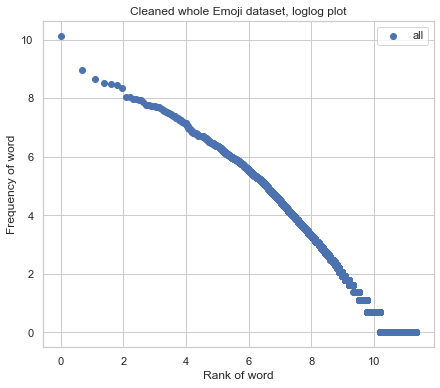

Distribution of true labels:

Plot of labels distribution:


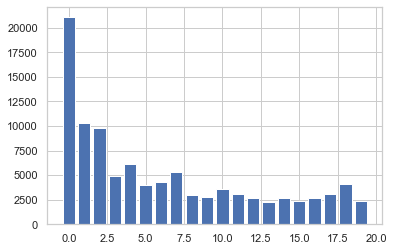

    Label no. Emoji                      Emoji as txt  Count  Percentage
0           0     ❤                       _red_heart_  21057       21.06
1           1     😍     _smiling_face_with_hearteyes_  10252       10.25
2           2     😂          _face_with_tears_of_joy_   9750        9.75
3           3     💕                      _two_hearts_   4956        4.96
4           4     🔥                            _fire_   6105        6.11
5           5     😊  _smiling_face_with_smiling_eyes_   3983        3.98
6           6     😎    _smiling_face_with_sunglasses_   4278        4.28
7           7     ✨                        _sparkles_   5293        5.29
8           8     💙                      _blue_heart_   3013        3.01
9           9     😘             _face_blowing_a_kiss_   2737        2.74
10         10     📷                          _camera_   3573        3.57
11         11    🇺🇸                   _United_States_   3038        3.04
12         12     ☀                             _su

In [32]:
# For the Emoji dataset
emoji_text = emoji_text_train + emoji_text_val + emoji_text_test
emoji_top_20 = dataset_statistics(emoji_text, "whole Emoji", "datasets/emoji/")

Statistics for whole Offensive dataset:

Top 20 in freq_words 
 {'user': 34024, 'liberals': 1485, 'gun': 1427, 'control': 1286, 'antifa': 1244, 'like': 1172, 'maga': 1067, 'conservatives': 1029, 'people': 968, 'get': 713, 'one': 688, 'amp': 682, 'trump': 682, 'know': 668, 'would': 581, 'think': 575, 'good': 491, 'right': 476, 'us': 440, 'want': 423} 

Top 20 least common words in freq_words 
 [('countrymen', 1), ('breitbarters', 1), ('progressing', 1), ('reads', 1), ('unto', 1), ('optic', 1), ('vetsresistsquadron', 1), ('scout', 1), ('lifetimes', 1), ('obummer', 1), ('plethora', 1), ('peruse', 1), ('lighting', 1), ('torches', 1), ('checkmarks', 1), ('verifiedhate', 1), ('lmfaoooooo', 1), ('shitbiscuit', 1), ('tempe', 1), ('licensereporters', 1)] 

The number of characters: 1813028
The number of tokens is: 402391
The number of sentences is: 21458
The average number of tokens per sentence is: 14
The size of the vocabulary (unique tokens) are: 19557
The tokens ratio is: 0.049
The number o

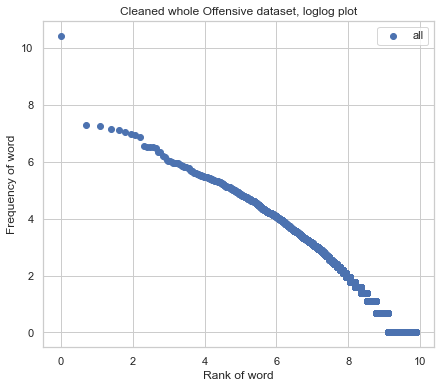

Distribution of true labels:

Plot of labels distribution:


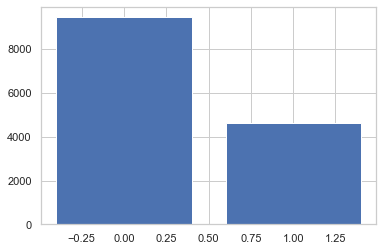

   Label no.  Count  Percentage
0          0   9458       67.09
1          1   4639       32.91


In [33]:
# For the whole Offensive dataset
offensive_text = offensive_text_train + offensive_text_val + offensive_text_test
offensive_top_20 = dataset_statistics(offensive_text, "whole Offensive", "datasets/offensive/")

***
## 2.2) Zipf's Law
### 2.2.1) Emoji dataset

In short, Zipf's Law is a distribution of data, where the 2nd highest ranking has half the number of occurrences as the highest ranking, the 3rd having 1/3 number of occurrences and so on.
Another way of writting Zipf's law is as following:
rank x frequency $\approx$ const


A quick way of determining weather something follows the law is to use the formula rank x frequency $\approx$ const and plot the results as a histogram. If all the bars in the histogram has rougly the same height the given data follows Zipf's law
Another way is to use a loglog plot. If the line follows a diagonal line, then there is evidence that the data follows Zipf's Law

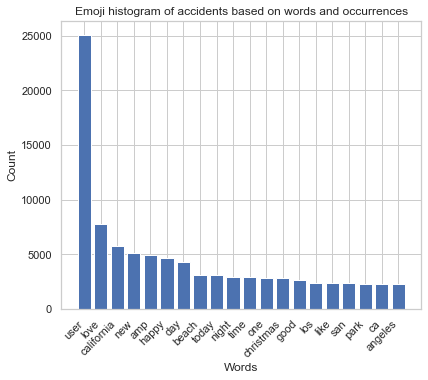

In [34]:
#Here we simply plot the distribution
fig = plt.figure(figsize = (5,4))
axes = fig.add_axes([0,0,1,1])
axes.bar(emoji_top_20.keys(),emoji_top_20.values())
fig.autofmt_xdate(rotation=45)
axes.set_title('Emoji histogram of accidents based on words and occurrences')
axes.set_ylabel('Count')
axes.set_xlabel('Words');

In [35]:
# Here we multiply the frequency with the rank

In [36]:
li =  []
counter = 1
for elm in emoji_top_20.values():
    li.append(elm * counter)
    counter += 1

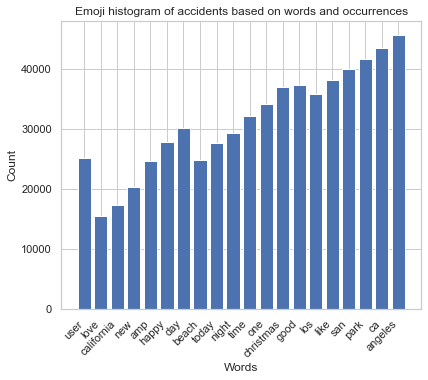

In [37]:
fig = plt.figure(figsize = (5,4))
axes = fig.add_axes([0,0,1,1])
axes.bar(emoji_top_20.keys(),li)
fig.autofmt_xdate(rotation=45)
axes.set_title('Emoji histogram of accidents based on words and occurrences')
axes.set_ylabel('Count')
axes.set_xlabel('Words');

In [38]:
# Raw dataset
emoji_raw_val = word_frequency(emoji_words_val_txt)
emoji_raw_train = word_frequency(emoji_words_train_txt)
emoji_raw_test = word_frequency(emoji_words_test_txt)

In [39]:
thing = most_common_words(emoji_raw_val)

In [40]:
li =  []
counter = 1
for elm in thing.values():
    li.append(elm * counter)
    counter += 1
    if counter == 51:
        break

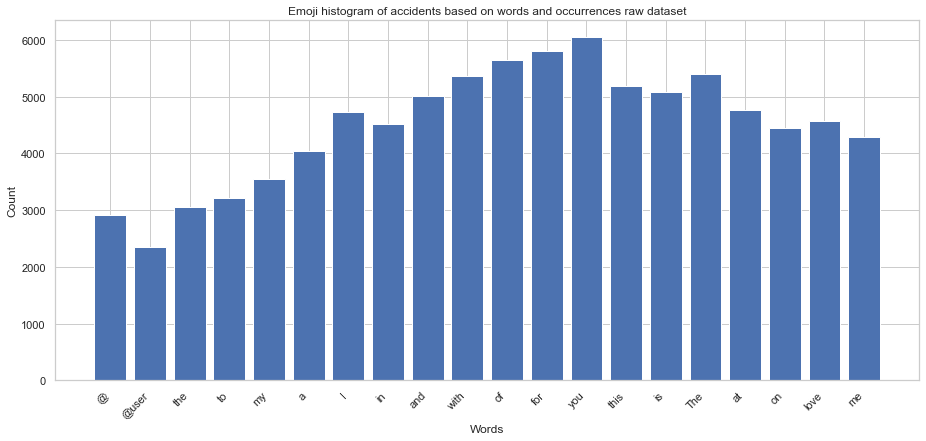

In [41]:
fig = plt.figure(figsize = (12,5))
axes = fig.add_axes([0,0,1,1])
axes.bar(list(thing.keys())[:20],li[:20])
fig.autofmt_xdate(rotation=45)
axes.set_title('Emoji histogram of accidents based on words and occurrences raw dataset')
axes.set_ylabel('Count')
axes.set_xlabel('Words');

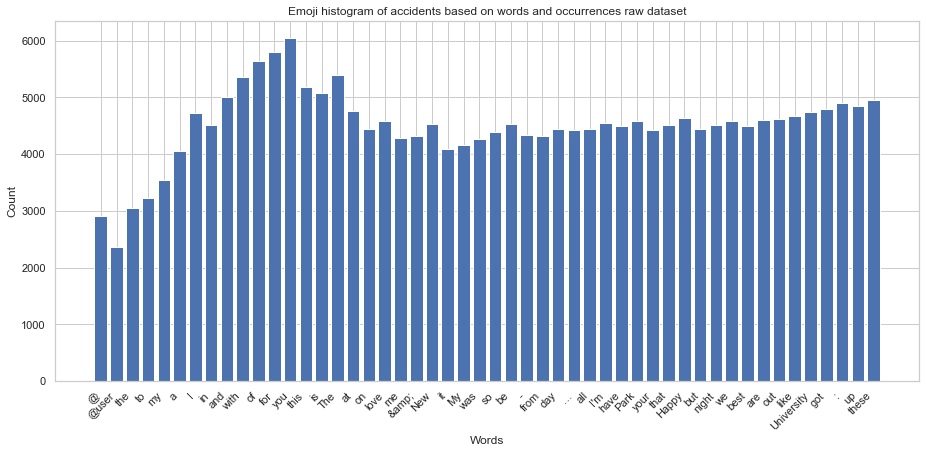

In [42]:
fig = plt.figure(figsize = (12,5))
axes = fig.add_axes([0,0,1,1])
axes.bar(list(thing.keys())[:50],li)
fig.autofmt_xdate(rotation=45)
axes.set_title('Emoji histogram of accidents based on words and occurrences raw dataset')
axes.set_ylabel('Count')
axes.set_xlabel('Words');

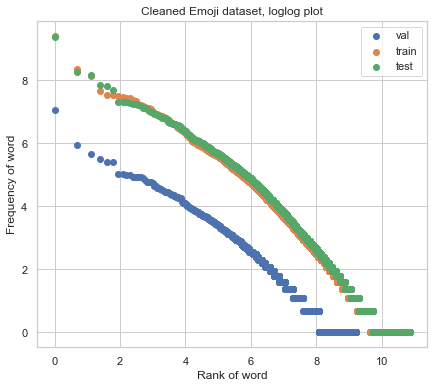

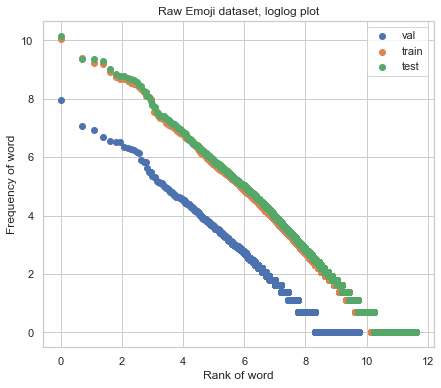

In [43]:
# Cleaned dataset:
llplot([emoji_freq_words_val, emoji_freq_words_train, emoji_freq_words_test], labels=["val", "train", "test"], title="Cleaned Emoji dataset, loglog plot")

llplot([emoji_raw_val, emoji_raw_train, emoji_raw_test], labels=["val", "train", "test"], title="Raw Emoji dataset, loglog plot")

***
### 2.2.2) Offensive dataset

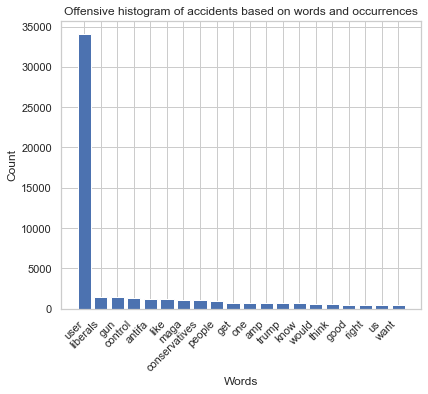

In [44]:
fig = plt.figure(figsize = (5,4))
axes = fig.add_axes([0,0,1,1])
axes.bar(offensive_top_20.keys(),offensive_top_20.values())
fig.autofmt_xdate(rotation=45)
axes.set_title('Offensive histogram of accidents based on words and occurrences')
axes.set_ylabel('Count')
axes.set_xlabel('Words');

In [45]:
li =  []
counter = 1
for elm in offensive_top_20.values():
    li.append(elm * counter)
    counter += 1

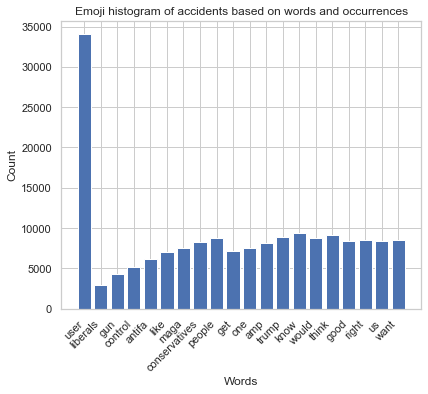

In [46]:
fig = plt.figure(figsize = (5,4))
axes = fig.add_axes([0,0,1,1])
axes.bar(offensive_top_20.keys(),li)
fig.autofmt_xdate(rotation=45)
axes.set_title('Emoji histogram of accidents based on words and occurrences')
axes.set_ylabel('Count')
axes.set_xlabel('Words');

In [47]:
# Raw dataset
offensive_raw_val = word_frequency(offensive_words_val_txt)
offensive_raw_train = word_frequency(offensive_words_train_txt)
offensive_raw_test = word_frequency(offensive_words_test_txt)


In [48]:
thing = most_common_words(offensive_raw_val)

In [49]:
li =  []
counter = 1
for elm in thing.values():
    li.append(elm * counter)
    counter += 1
    if counter == 51:
        break

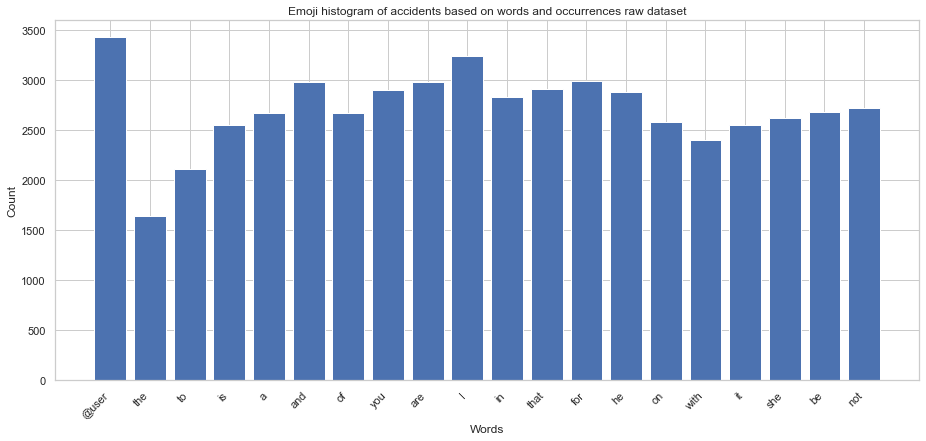

In [50]:
fig = plt.figure(figsize = (12,5))
axes = fig.add_axes([0,0,1,1])
axes.bar(list(thing.keys())[:20],li[:20])
fig.autofmt_xdate(rotation=45)
axes.set_title('Emoji histogram of accidents based on words and occurrences raw dataset')
axes.set_ylabel('Count')
axes.set_xlabel('Words');

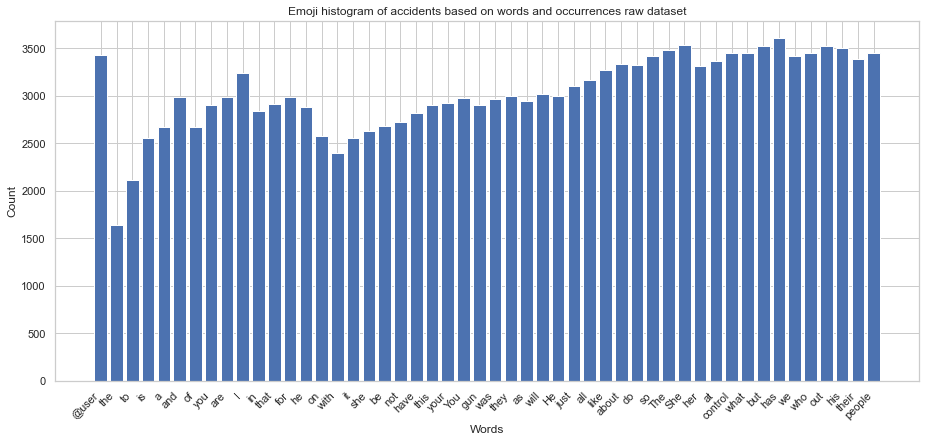

In [51]:
fig = plt.figure(figsize = (12,5))
axes = fig.add_axes([0,0,1,1])
axes.bar(list(thing.keys())[:50],li[:50])
fig.autofmt_xdate(rotation=45)
axes.set_title('Emoji histogram of accidents based on words and occurrences raw dataset')
axes.set_ylabel('Count')
axes.set_xlabel('Words');

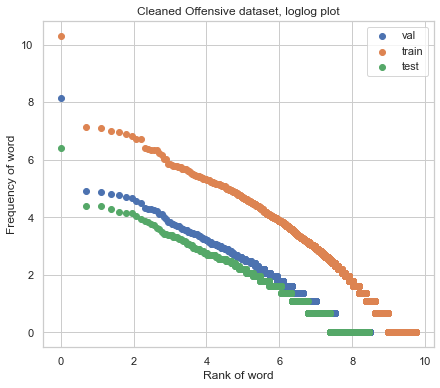

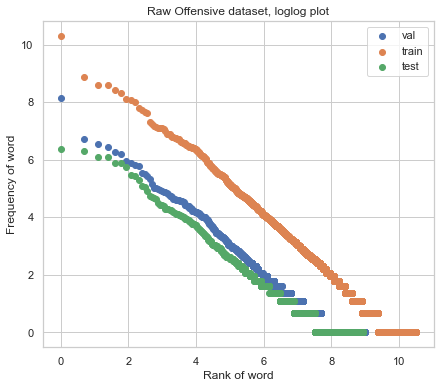

In [52]:
# Cleaned dataset:
llplot([offensive_freq_words_val, offensive_freq_words_train, offensive_freq_words_test], labels=["val", "train", "test"], title="Cleaned Offensive dataset, loglog plot")

llplot([offensive_raw_val, offensive_raw_train, offensive_raw_test], labels=["val", "train", "test"], title="Raw Offensive dataset, loglog plot")

There is an overall trend that the follows the law, however, this is has not been proven mathematicly, and our plots doesn't follow the excact distributions as described.

***
***

# TASK 3: MANUAL ANNOTATION AND INTER-ANNOTATOR AGREEMENT

In [53]:
#lukas annotation
rater1=[]
with open('annotation/lukas.txt', 'r') as f:
    line = f.readline()
    while line:
        rater1.append(line.strip())
        line = f.readline()

#thomas annotation
rater2=[]
with open('annotation/thomas.txt', 'r') as f:
    line = f.readline()
    while line:
        rater2.append(line.strip())
        line = f.readline()

#martin annotation
rater3=[]
with open('annotation/martin.txt', 'r') as f:
    line = f.readline()
    while line:
        rater3.append(line.strip())
        line = f.readline()

#yasmine annotation
rater4=[]
with open('annotation/yasmin.txt', 'r') as f:
    line = f.readline()
    while line:
        rater4.append(line.strip().split()[1])
        line = f.readline()

#true
true=[]
with open('annotation/iaa_labels.txt', 'r') as f:
    line = f.readline()
    while line:
        true.append(line.strip())
        line = f.readline()

In [54]:
from nltk import agreement
rater1 = rater1[0:100]
rater2 = rater2[0:100]
rater3 = rater3[0:100]
rater4 = rater4[0:100]
true   = true[0:100]
taskdata=[[0,str(i),str(rater1[i])] for i in range(0,len(rater1))]+[[1,str(i),str(rater2[i])] for i in range(0,len(rater2))]+[[2,str(i),str(rater3[i])] for i in range(0,len(rater3))]+[[3,str(i),str(true[i])] for i in range(0,len(true))]#+[[4,str(i),str(rater4[i])] for i in range(0,len(rater4))]


ratingtask = agreement.AnnotationTask(data=taskdata)

#Cohen 1960 Averages naively over kappas for each coder pair.
print("kappa  " +str(round(ratingtask.kappa(),2)))
print("fleiss " +str(round(ratingtask.multi_kappa(),2)))
print("alpha  " +str(round(ratingtask.alpha(),2)))
print("scotts " +str(round(ratingtask.pi(),2)))

#Average observed agreement across all coders and items
print('avg Ao', round(ratingtask.avg_Ao(),2))


kappa  0.41
fleiss 0.39
alpha  0.38
scotts 0.38
avg Ao 0.72


***
***

# TASK 04 - AUTOMATIC PREDICTION
## Offensive dataset

In [55]:
train_df = merging_labels_and_sentences('datasets/offensive/train_text', 'datasets/offensive/train_labels')

missing_val = missing_values(train_df)
# Average words devided into labels
avg_labels_word = word_count(train_df)
avg_labels_char = char_count(train_df)

print(' Average Number of Words - Offensive Tweets: ', avg_labels_word[1],'\n','Average Number of Words - Non-offensive Tweets: ', avg_labels_word[2])
print(' Average Characters in Offensive Tweets: ', avg_labels_char[1],'\n','Average Characters in Non-offensive Tweets: ', avg_labels_char[2])

print('\nNumber of missing values for each column\n',missing_val)

 Average Number of Words - Offensive Tweets:  23.256 
 Average Number of Words - Non-offensive Tweets:  21.411
 Average Characters in Offensive Tweets:  131.836 
 Average Characters in Non-offensive Tweets:  122.761

Number of missing values for each column
 id       0
tweet    0
label    0
dtype: int64


C:\Users\Martin\Anaconda3\envs\fyp04\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


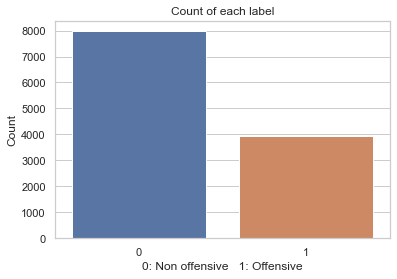

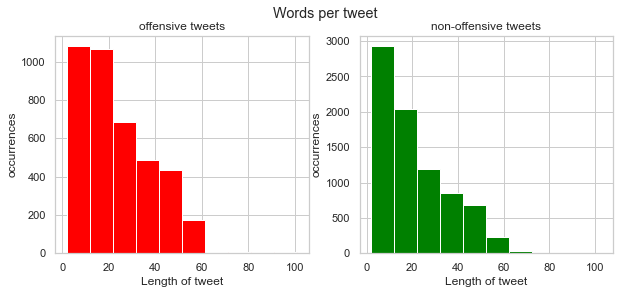

In [56]:
# Number of total labels for each class: 0 = non offensive, 1 = offensive
barplot = class_distribution(train_df,"Count of each label","0: Non offensive   1: Offensive")
# Histogram of Word count pr tweet
plot_word_count = plot_word_count(train_df)

## Testing

In [57]:
test_df = merging_labels_and_sentences('datasets/offensive/test_text', 'datasets/offensive/test_labels')

In [58]:
val_df = merging_labels_and_sentences('datasets/offensive/val_text', 'datasets/offensive/val_labels')

## Term Frequency-Inverse Document Frequencies


Term Frequency-Inverse Document Frequencies (tf-Idf): Count vectors might not be the best representation for converting text data to numerical data. So, instead of simple counting, we can also use an advanced variant of the Bag-of-Words that uses the term frequency–inverse document frequency (or Tf-Idf). Basically, the value of a word increases proportionally to count in the document, but it is inversely proportional to the frequency of the word in the corpus

### Here we are splitting the data


In [59]:
X_train = train_df['tweet']
y_train = train_df['label']
X_test = test_df["tweet"]
y_test = test_df["label"]

# Feature extraction

In [60]:
# Here we tokenize the data
X_train_tok, X_test_tok, y_train, y_test = tokenize_train_test(X_train, X_test,y_train,y_test)


# (tf-Idf)
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

# (#W2v)
w2v_X_train_tok=[nltk.word_tokenize(i) for i in X_train]
model = gensim.models.Word2Vec(w2v_X_train_tok,min_count=1)
w2v = dict(zip(model.wv.index_to_key, model.wv))      
modelw = MeanEmbeddingVectorizer(w2v)


# converting text to numerical data using Word2Vec
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_test_vectors_w2v = modelw.transform(X_test_tok)

In [61]:
validation_data, ligemeget, validation_label, ligemeget_2 = train_test_split(
    val_df['tweet'], val_df['label'], test_size=1, random_state=42)

In [62]:

val_X_test = validation_data
val_y_test = validation_label


In [63]:
# Here we tokenize the data
#val_X_train_tok, val_X_test_tok, val_y_train, val_y_test = tokenize_train_test(validation_data, validation_data,validation_label,val_y_test)
val_w2v_X_train_tok=[nltk.word_tokenize(i) for i in validation_data]

In [64]:
# Here we tokenize the data
X_train_tok, X_test_tok, y_train, y_test = tokenize_train_test(X_train, X_test,y_train,y_test)


# (tf-Idf)
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

# (#W2v)
w2v_X_train_tok=[nltk.word_tokenize(i) for i in X_train]
model = gensim.models.Word2Vec(w2v_X_train_tok,min_count=1)
w2v = dict(zip(model.wv.index_to_key, model.wv))      
modelw = MeanEmbeddingVectorizer(w2v)


# converting text to numerical data using Word2Vec
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_test_vectors_w2v = modelw.transform(X_test_tok)

In [65]:

# (tf-Idf)
val_tfidf_vectorizer = TfidfVectorizer(use_idf=True)
val_X_test_vectors_tfidf = tfidf_vectorizer.transform(validation_data)




# (#W2v)
val_X_test_tok=[nltk.word_tokenize(i) for i in validation_data]
val_X_test_vectors_w2v = modelw.transform(val_X_test_tok)

# Bag of words with tf-idf

In [66]:
vectorizer, vocab, train_data_features, tfidf_features, tfidf  = (
        create_bag_of_words(X_train))
ml_model = train_logistic_regression(tfidf_features, y_train)
test_data_features = vectorizer.transform(X_test)
# Convert to numpy array
test_data_features = test_data_features.toarray()
predicted_y = ml_model.predict(test_data_features)
correctly_identified_y = predicted_y == y_test
accuracy = np.mean(correctly_identified_y) * 100
accuracy, precision, recall, f1 = get_metrics(y_test, predicted_y)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))


Creating bag of words...
Training the logistic regression model...
Finished
accuracy = 0.517, precision = 0.742, recall = 0.517, f1 = 0.522


C:\Users\Martin\Anaconda3\envs\fyp04\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Summary 

Testing the Bag of Words implementation combined with tf-idf in the model for Logistic Regression shows Accuracy at _0.50 or 50 %_ and therefore we decided to not test the BOW + tf-idf on other classifier models since BOW + w2v gives much better results for all classifiers (logistic regression, linear svc, naive bayes, random forest)

## Bag of Words - Word2Vec

#### Creating the model

In [67]:
count_vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\w+')

bow = dict()
bow["train"] = (count_vectorizer.fit_transform(X_train), y_train)
bow["test"]  = (count_vectorizer.transform(X_test), y_test)

#### Classifers and imports

In [68]:

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


#log reg
lr_classifier = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)

#linear svc
lsvm_classifier = LinearSVC(C=1.0, class_weight='balanced', multi_class='ovr', random_state=40)

#naive bayes
nb_classifier = MultinomialNB()

#random forest 
clf_bow = RandomForestClassifier(n_estimators = 40)

#data set in bag of words
embedding = bow

#### a) Classifier: Logistic Regression

accuracy = 0.748, precision = 0.747, recall = 0.748, f1 = 0.748


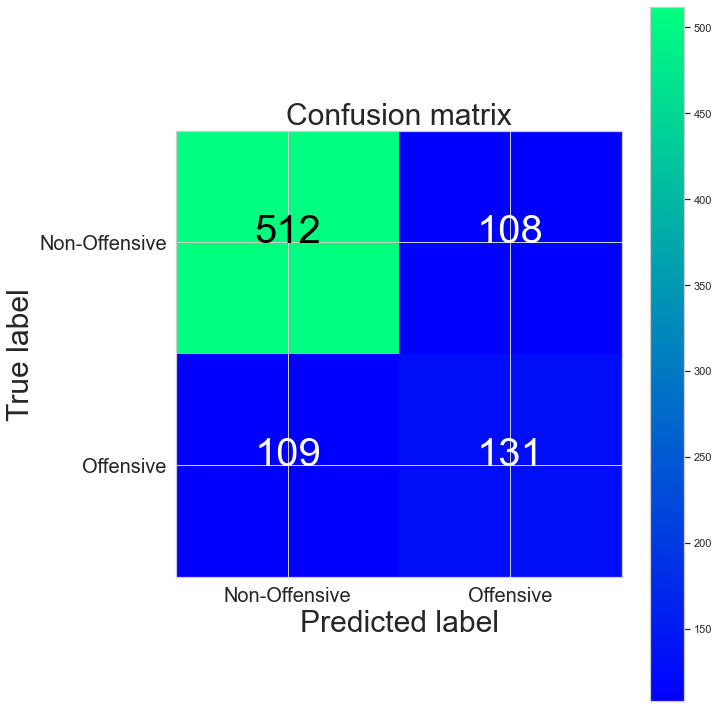

In [69]:
classifier = lr_classifier     
# lr_classifier 

classifier.fit(*embedding["train"])
y_predict = classifier.predict(embedding["test"][0])

accuracy, precision, recall, f1 = get_metrics(embedding["test"][1], y_predict)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))


cm = confusion_matrix(embedding["test"][1], y_predict)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Non-Offensive','Offensive'], normalize=False, title='Confusion matrix')
plt.show()


#### b) Classifier: Linear Support Vector Machine

accuracy = 0.756, precision = 0.754, recall = 0.756, f1 = 0.755


C:\Users\Martin\Anaconda3\envs\fyp04\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


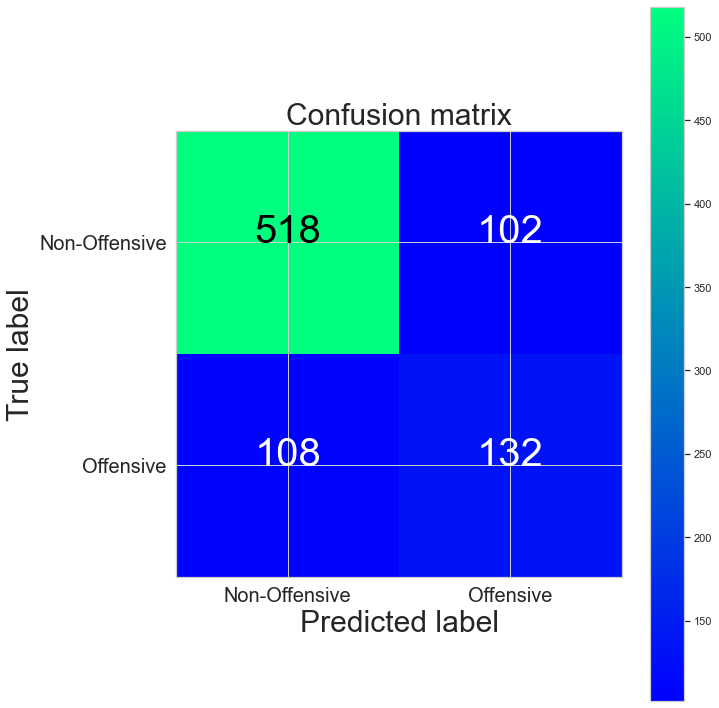

In [70]:
classifier = lsvm_classifier    
# lsvm_classifier 

classifier.fit(*embedding["train"])
y_predict = classifier.predict(embedding["test"][0])

accuracy, precision, recall, f1 = get_metrics(embedding["test"][1], y_predict)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))


cm = confusion_matrix(embedding["test"][1], y_predict)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Non-Offensive','Offensive'], normalize=False, title='Confusion matrix')
plt.show()

#### C) Classifier: Naive Bayes

accuracy = 0.784, precision = 0.778, recall = 0.784, f1 = 0.780


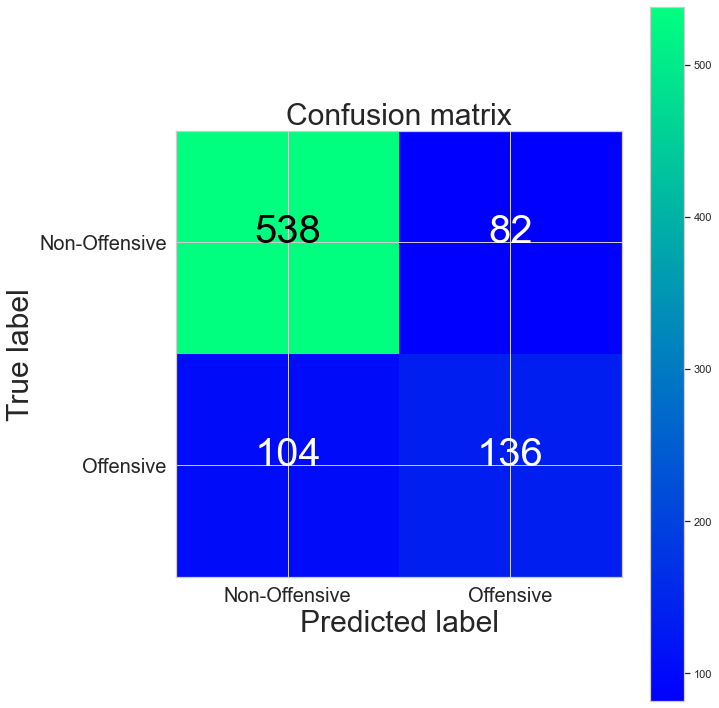

In [71]:

classifier = nb_classifier    
# lr_classifier | lsvm_classifier | nb_classifier

classifier.fit(*embedding["train"])
y_predict = classifier.predict(embedding["test"][0])

accuracy, precision, recall, f1 = get_metrics(embedding["test"][1], y_predict)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))


cm = confusion_matrix(embedding["test"][1], y_predict)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Non-Offensive','Offensive'], normalize=False, title='Confusion matrix')
plt.show()

#### d) Classifier: Random Forest Classifier

accuracy = 0.814, precision = 0.823, recall = 0.814, f1 = 0.788


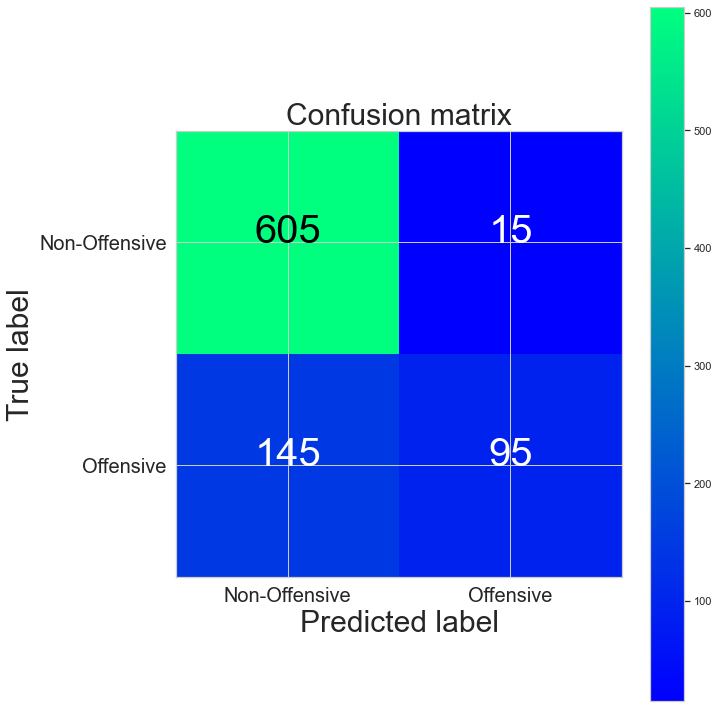

In [72]:

classifier = clf_bow    
# lr_classifier | lsvm_classifier | nb_classifier

classifier.fit(*embedding["train"])
y_predict = classifier.predict(embedding["test"][0])

accuracy, precision, recall, f1 = get_metrics(embedding["test"][1], y_predict)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))


cm = confusion_matrix(embedding["test"][1], y_predict)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Non-Offensive','Offensive'], normalize=False, title='Confusion matrix')
plt.show()

### Summary

Random Forest Classifier with Bag of Words as input gives the best results compared to the other models:
 
- Accuracy at _0.801 or 80 %_ 
- Recall value at _0.801 or 80 %_ 
- F1-score at _0.773 or 77 %_

***

# 4.1) Binary classification

## Stochastic Logistic Regression (sgdc)

1. Feature Extraction Technique: tf-idf
2. Feature Extraction Technique: w2v

#### 1) sgdc with tf-idf

In [73]:
#Use classification algorithm (i.e. Stochastic Logistic Regression) 
lr_sgdc_tf = SGDClassifier(loss='log', penalty='l1')
lr_sgdc_tf.fit(X_train_vectors_tfidf, y_train)

print(lr_sgdc_tf.score(X_train_vectors_tfidf, y_train))



0.7831487076200068


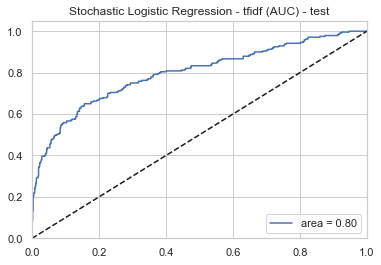

In [74]:

#Create ROC curve
pred_probas_lr_sgdc_tf = lr_sgdc_tf.predict_proba(X_test_vectors_tfidf)[:,1]
fpr_lr_sgdc_tf, tpr_lr_sgdc_tf,  thresholds_lr_sgdc_tf= roc_curve(y_test, pred_probas_lr_sgdc_tf)

roc_auc_lr_sgdc_tf = auc(fpr_lr_sgdc_tf,tpr_lr_sgdc_tf)
plt.plot(fpr_lr_sgdc_tf,tpr_lr_sgdc_tf,label='area = %.2f' %roc_auc_lr_sgdc_tf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Stochastic Logistic Regression - tfidf (AUC) - test')
plt.legend(loc="lower right")
plt.savefig('auc_sdgc_tfidf.png')

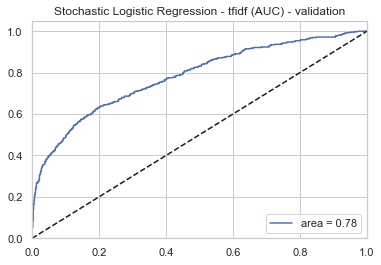

In [75]:
#Create ROC curve
pred_probas_lr_sgdc_tf = lr_sgdc_tf.predict_proba(val_X_test_vectors_tfidf)[:,1]
fpr_lr_sgdc_tf, tpr_lr_sgdc_tf,  thresholds_lr_sgdc_tf= roc_curve(val_y_test, pred_probas_lr_sgdc_tf)

roc_auc_lr_sgdc_tf = auc(fpr_lr_sgdc_tf,tpr_lr_sgdc_tf)
plt.plot(fpr_lr_sgdc_tf,tpr_lr_sgdc_tf,label='area = %.2f' %roc_auc_lr_sgdc_tf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Stochastic Logistic Regression - tfidf (AUC) - validation')
plt.legend(loc="lower right")
plt.savefig('auc_sdgc_tfidf.png')

#### 2) sgdc wit w2v

In [76]:
# Stochastic Logistic Regression) 
lr_sgdc_w2v = SGDClassifier(loss='log', penalty='l1')
lr_sgdc_w2v.fit(X_train_vectors_w2v, y_train)

#Predict y value for test dataset
y_predict_lr_sgdc_w2v = lr_sgdc_w2v.predict(X_test_vectors_w2v)
y_prob_lr_sgdc_w2v = lr_sgdc_w2v.predict_proba(X_test_vectors_w2v)[:,1]

print(classification_report(y_test,y_predict_lr_sgdc_w2v))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_predict_lr_sgdc_w2v))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84       620
           1       0.25      0.00      0.01       240

    accuracy                           0.72       860
   macro avg       0.49      0.50      0.42       860
weighted avg       0.59      0.72      0.61       860

Confusion Matrix:
 [[617   3]
 [239   1]]


AUC: 0.572671370967742


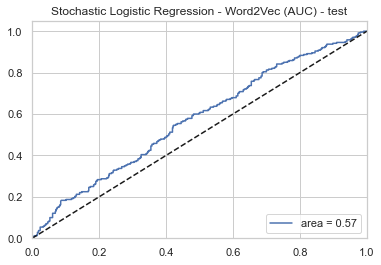

In [77]:
#Create ROC curve
pred_probas_lr_sgdc_w2v = lr_sgdc_w2v.predict_proba(X_test_vectors_w2v)[:,1]

# Follwing cant be calculated due to multi-variables:
fpr_lr_sgdc_w2v,tpr_lr_sgdc_w2v,thresholds_lr_sgdc_w2v = roc_curve(y_test, pred_probas_lr_sgdc_w2v)

roc_auc_lr_sgdc_w2v = auc(fpr_lr_sgdc_w2v,tpr_lr_sgdc_w2v)
print('AUC:', roc_auc_lr_sgdc_w2v)
plt.plot(fpr_lr_sgdc_w2v,tpr_lr_sgdc_w2v,label='area = %.2f' %roc_auc_lr_sgdc_w2v)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Stochastic Logistic Regression - Word2Vec (AUC) - test')
plt.legend(loc="lower right")
plt.savefig('auc_sdgc_w2v.png')

C:\Users\Martin\Anaconda3\envs\fyp04\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Martin\Anaconda3\envs\fyp04\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Martin\Anaconda3\envs\fyp04\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.65      1.00      0.79       864
           1       0.00      0.00      0.00       459

    accuracy                           0.65      1323
   macro avg       0.33      0.50      0.40      1323
weighted avg       0.43      0.65      0.52      1323

Confusion Matrix:
 [[864   0]
 [459   0]]
AUC: 0.6067575950133139


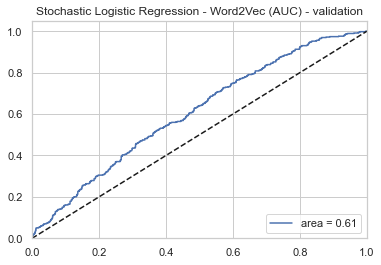

In [78]:
#Predict y value for test dataset
y_predict_lr_sgdc_w2v = lr_sgdc_w2v.predict(val_X_test_vectors_w2v)
y_prob_lr_sgdc_w2v = lr_sgdc_w2v.predict_proba(val_X_test_vectors_w2v)[:,1]

print(classification_report(val_y_test,y_predict_lr_sgdc_w2v))
print('Confusion Matrix:\n',confusion_matrix(val_y_test, y_predict_lr_sgdc_w2v))

#Create ROC curve
pred_probas_lr_sgdc_w2v = lr_sgdc_w2v.predict_proba(val_X_test_vectors_w2v)[:,1]

# Follwing cant be calculated due to multi-variables:
fpr_lr_sgdc_w2v,tpr_lr_sgdc_w2v,thresholds_lr_sgdc_w2v = roc_curve(val_y_test, pred_probas_lr_sgdc_w2v)

roc_auc_lr_sgdc_w2v = auc(fpr_lr_sgdc_w2v,tpr_lr_sgdc_w2v)
print('AUC:', roc_auc_lr_sgdc_w2v)
plt.plot(fpr_lr_sgdc_w2v,tpr_lr_sgdc_w2v,label='area = %.2f' %roc_auc_lr_sgdc_w2v)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Stochastic Logistic Regression - Word2Vec (AUC) - validation')
plt.legend(loc="lower right")
plt.savefig('auc_sdgc_w2v.png')


## Logistic Regression (lr)

1. Feature Extraction Technique: tf-idf
2. Feature Extraction Technique: w2v

#### 1) lr with tf-idf

In [79]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')

lr_tfidf.fit(X_train_vectors_tfidf, y_train)  

#Predict y value for test dataset
y_predict_lr_tfidf = lr_tfidf.predict(X_test_vectors_tfidf)
y_prob_lr_tfidf= lr_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]
print(classification_report(y_test,y_predict_lr_tfidf))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_predict_lr_tfidf))
 
fpr_lr_tfidf, tpr_lr_tfidf, thresholds_lr_tfidf = roc_curve(y_test, y_prob_lr_tfidf)
roc_auc_lr_tfidf = auc(fpr_lr_tfidf, tpr_lr_tfidf)
print('AUC:', roc_auc_lr_tfidf)

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       620
           1       0.69      0.48      0.57       240

    accuracy                           0.79       860
   macro avg       0.75      0.70      0.72       860
weighted avg       0.78      0.79      0.78       860

Confusion Matrix:
 [[568  52]
 [125 115]]
AUC: 0.7932224462365591


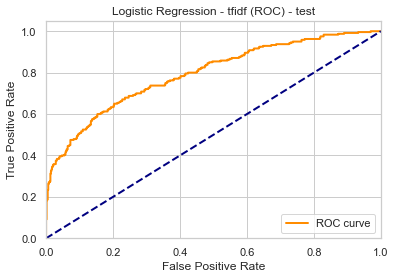

In [80]:
plt.figure()
lw = 2
plt.plot(fpr_lr_tfidf, tpr_lr_tfidf, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - tfidf (ROC) - test')
plt.legend(loc="lower right")
plt.savefig('roc_lr_tfidf.png')

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       864
           1       0.69      0.51      0.58       459

    accuracy                           0.75      1323
   macro avg       0.73      0.69      0.70      1323
weighted avg       0.74      0.75      0.74      1323

Confusion Matrix:
 [[759 105]
 [227 232]]
AUC: 0.7767489711934157


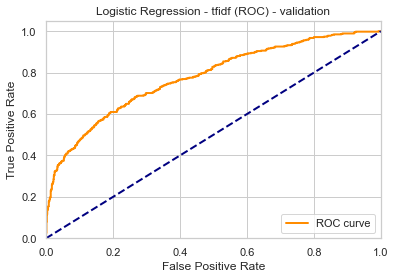

In [81]:
#Predict y value for test dataset
y_predict_lr_tfidf = lr_tfidf.predict(val_X_test_vectors_tfidf)
y_prob_lr_tfidf= lr_tfidf.predict_proba(val_X_test_vectors_tfidf)[:,1]
print(classification_report(val_y_test,y_predict_lr_tfidf))
print('Confusion Matrix:\n',confusion_matrix(val_y_test, y_predict_lr_tfidf))
 
fpr_lr_tfidf, tpr_lr_tfidf, thresholds_lr_tfidf = roc_curve(val_y_test, y_prob_lr_tfidf)
roc_auc_lr_tfidf = auc(fpr_lr_tfidf, tpr_lr_tfidf)
print('AUC:', roc_auc_lr_tfidf)
plt.figure()
lw = 2
plt.plot(fpr_lr_tfidf, tpr_lr_tfidf, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - tfidf (ROC) - validation')
plt.legend(loc="lower right")
plt.savefig('roc_lr_tfidf.png')

#### 2) lr with w2v

In [82]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression (W2v)

lr_w2v=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_w2v.fit(X_train_vectors_w2v, y_train)  #model

#Predict y value for test dataset
y_predict_lr_w2v = lr_w2v.predict(X_test_vectors_w2v)
y_prob_lr_w2v = lr_w2v.predict_proba(X_test_vectors_w2v)[:,1]

print(classification_report(y_test,y_predict_lr_w2v))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_predict_lr_w2v))
 
fpr_lr_w2v, tpr_lr_w2v, thresholds_lr_w2v = roc_curve(y_test, y_prob_lr_w2v)
roc_auc_lr_w2v = auc(fpr_lr_w2v, tpr_lr_w2v)
print('AUC:', roc_auc_lr_w2v)

              precision    recall  f1-score   support

           0       0.73      0.99      0.84       620
           1       0.53      0.04      0.08       240

    accuracy                           0.72       860
   macro avg       0.63      0.51      0.46       860
weighted avg       0.67      0.72      0.62       860

Confusion Matrix:
 [[611   9]
 [230  10]]
AUC: 0.5822076612903225


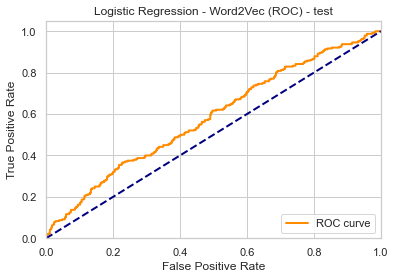

In [83]:
plt.figure()
lw = 2
plt.plot(fpr_lr_w2v, tpr_lr_w2v, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - Word2Vec (ROC) - test')
plt.legend(loc="lower right")
plt.savefig('roc_lr_w2v.png')

              precision    recall  f1-score   support

           0       0.66      0.99      0.79       864
           1       0.58      0.03      0.06       459

    accuracy                           0.66      1323
   macro avg       0.62      0.51      0.43      1323
weighted avg       0.63      0.66      0.54      1323

Confusion Matrix:
 [[853  11]
 [444  15]]
AUC: 0.6266302045509562


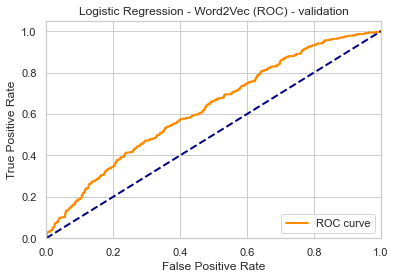

In [84]:
#Predict y value for test dataset
y_predict_lr_w2v = lr_w2v.predict(val_X_test_vectors_w2v)
y_prob_lr_w2v = lr_w2v.predict_proba(val_X_test_vectors_w2v)[:,1]

print(classification_report(val_y_test,y_predict_lr_w2v))
print('Confusion Matrix:\n',confusion_matrix(val_y_test, y_predict_lr_w2v))
 
fpr_lr_w2v, tpr_lr_w2v, thresholds_lr_w2v = roc_curve(val_y_test, y_prob_lr_w2v)
roc_auc_lr_w2v = auc(fpr_lr_w2v, tpr_lr_w2v)
print('AUC:', roc_auc_lr_w2v)

plt.figure()
lw = 2
plt.plot(fpr_lr_w2v, tpr_lr_w2v, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - Word2Vec (ROC) - validation')
plt.legend(loc="lower right")
plt.savefig('roc_lr_w2v.png')

## Naive Bayes (nb)

1. Feature Extraction Technique: tf-idf
2. Feature Extraction Technique: w2v

#### 1) nb with tl-idf

In [85]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train) 

 #Predict y value for test dataset
y_predict_nb_tfidf= nb_tfidf.predict(X_test_vectors_tfidf)
y_prob_nb_tfidf = nb_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]

print(classification_report(y_test,y_predict_nb_tfidf))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_predict_nb_tfidf))
 
fpr_nb_tfidf, tpr_nb_tfidf, thresholds_nb_tfidf = roc_curve(y_test, y_prob_nb_tfidf)
roc_auc_nb_tfidf = auc(fpr_nb_tfidf, tpr_nb_tfidf)
print('AUC:', roc_auc_nb_tfidf)

              precision    recall  f1-score   support

           0       0.75      1.00      0.85       620
           1       0.94      0.12      0.22       240

    accuracy                           0.75       860
   macro avg       0.84      0.56      0.54       860
weighted avg       0.80      0.75      0.68       860

Confusion Matrix:
 [[618   2]
 [210  30]]
AUC: 0.7602990591397849


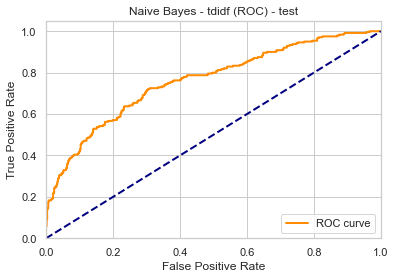

In [86]:
plt.figure()
lw = 2
plt.plot(fpr_nb_tfidf, tpr_nb_tfidf, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes - tdidf (ROC) - test')
plt.legend(loc="lower right")
plt.savefig('roc_nb_tdidf.png')

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       864
           1       0.96      0.12      0.21       459

    accuracy                           0.69      1323
   macro avg       0.82      0.56      0.51      1323
weighted avg       0.78      0.69      0.60      1323

Confusion Matrix:
 [[862   2]
 [405  54]]
AUC: 0.721647300895667


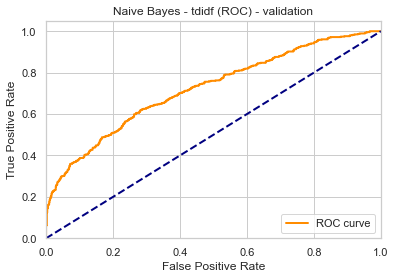

In [87]:
 #Predict y value for test dataset
y_predict_nb_tfidf= nb_tfidf.predict(val_X_test_vectors_tfidf)
y_prob_nb_tfidf = nb_tfidf.predict_proba(val_X_test_vectors_tfidf)[:,1]

print(classification_report(val_y_test,y_predict_nb_tfidf))
print('Confusion Matrix:\n',confusion_matrix(val_y_test, y_predict_nb_tfidf))
 
fpr_nb_tfidf, tpr_nb_tfidf, thresholds_nb_tfidf = roc_curve(val_y_test, y_prob_nb_tfidf)
roc_auc_nb_tfidf = auc(fpr_nb_tfidf, tpr_nb_tfidf)
print('AUC:', roc_auc_nb_tfidf)


plt.figure()
lw = 2
plt.plot(fpr_nb_tfidf, tpr_nb_tfidf, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes - tdidf (ROC) - validation')
plt.legend(loc="lower right")
plt.savefig('roc_nb_tdidf.png')

#### 2) nb with w2v

In [88]:
#FITTING THE CLASSIFICATION MODEL using Gaussian Naive Bayes(w2v)
nb_w2v = GaussianNB()
nb_w2v.fit(X_train_vectors_w2v, y_train) 


 #Predict y value for test dataset
y_predict_nb_w2v = nb_w2v.predict(X_test_vectors_w2v)
y_prob_nb_w2v = nb_w2v.predict_proba(X_test_vectors_w2v)[:,1]

print(classification_report(y_test,y_predict_nb_w2v))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_predict_nb_w2v))
 
fpr_nb_w2v, tpr_nb_w2v, thresholds_nb_w2v = roc_curve(y_test, y_prob_nb_w2v)
roc_auc_nb_w2v = auc(fpr_nb_w2v, tpr_nb_w2v)
print('AUC:', roc_auc_nb_w2v)

              precision    recall  f1-score   support

           0       0.75      0.43      0.55       620
           1       0.30      0.62      0.40       240

    accuracy                           0.48       860
   macro avg       0.52      0.53      0.47       860
weighted avg       0.62      0.48      0.51       860

Confusion Matrix:
 [[267 353]
 [ 91 149]]
AUC: 0.544203629032258


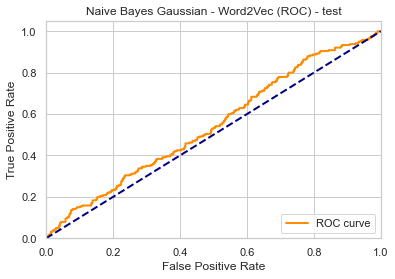

In [89]:
plt.figure()
lw = 2
plt.plot(fpr_nb_w2v, tpr_nb_w2v, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Gaussian - Word2Vec (ROC) - test')
plt.legend(loc="lower right")
plt.savefig('roc_nb_w2v.png')

              precision    recall  f1-score   support

           0       0.76      0.40      0.53       864
           1       0.40      0.76      0.53       459

    accuracy                           0.53      1323
   macro avg       0.58      0.58      0.53      1323
weighted avg       0.64      0.53      0.53      1323

Confusion Matrix:
 [[349 515]
 [109 350]]
AUC: 0.605368201807472


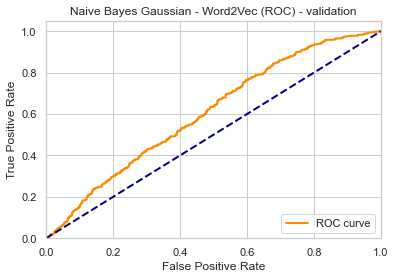

In [90]:
 #Predict y value for test dataset
y_predict_nb_w2v = nb_w2v.predict(val_X_test_vectors_w2v)
y_prob_nb_w2v = nb_w2v.predict_proba(val_X_test_vectors_w2v)[:,1]

print(classification_report(val_y_test,y_predict_nb_w2v))
print('Confusion Matrix:\n',confusion_matrix(val_y_test, y_predict_nb_w2v))
 
fpr_nb_w2v, tpr_nb_w2v, thresholds_nb_w2v = roc_curve(val_y_test, y_prob_nb_w2v)
roc_auc_nb_w2v = auc(fpr_nb_w2v, tpr_nb_w2v)
print('AUC:', roc_auc_nb_w2v)

plt.figure()
lw = 2
plt.plot(fpr_nb_w2v, tpr_nb_w2v, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Gaussian - Word2Vec (ROC) - validation')
plt.legend(loc="lower right")
plt.savefig('roc_nb_w2v.png')

## Random Forest Classifier (clf)

1. Feature Extraction Technique: tf-idf
2. Feature Extraction Technique: w2v

#### 1) clf with tf-idf

In [91]:
#FITTING THE CLASSIFICATION MODEL using RandomForrest (tf-idf)
clf_tfidf = RandomForestClassifier(n_estimators = 100)
clf_tfidf.fit(X_train_vectors_tfidf, y_train) 


 #Predict y value for test dataset
y_predict_clf_tfidf = clf_tfidf.predict(X_test_vectors_tfidf)
y_prob_clf_tfidf = clf_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]

print(classification_report(y_test,y_predict_clf_tfidf))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict_clf_tfidf))
 
fpr_clf_tfidf, tpr_clf_tfidf, thresholds_clf_tfidf = roc_curve(y_test, y_prob_clf_tfidf)
roc_auc_clf_tfidf = auc(fpr_clf_tfidf, tpr_clf_tfidf)
print('AUC:', roc_auc_clf_tfidf)

              precision    recall  f1-score   support

           0       0.79      0.98      0.88       620
           1       0.87      0.34      0.49       240

    accuracy                           0.80       860
   macro avg       0.83      0.66      0.68       860
weighted avg       0.82      0.80      0.77       860

Confusion Matrix: [[608  12]
 [158  82]]
AUC: 0.8252352150537635


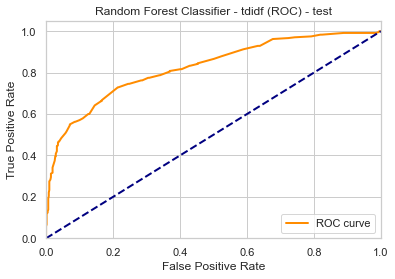

In [92]:
plt.figure()
lw = 2
plt.plot(fpr_clf_tfidf, tpr_clf_tfidf, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier - tfidf (ROC) - test')
plt.legend(loc="lower right")
plt.savefig('roc_clf_tfidf.png')

              precision    recall  f1-score   support

           0       0.73      0.97      0.83       864
           1       0.84      0.32      0.47       459

    accuracy                           0.74      1323
   macro avg       0.78      0.64      0.65      1323
weighted avg       0.77      0.74      0.70      1323

Confusion Matrix: [[835  29]
 [311 148]]
AUC: 0.7890026123618171


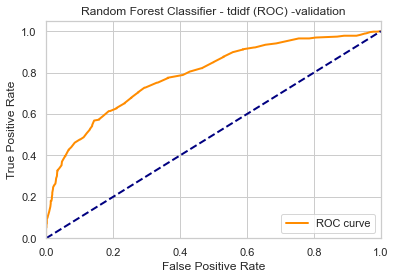

In [93]:
 #Predict y value for test dataset
y_predict_clf_tfidf = clf_tfidf.predict(val_X_test_vectors_tfidf)
y_prob_clf_tfidf = clf_tfidf.predict_proba(val_X_test_vectors_tfidf)[:,1]

print(classification_report(val_y_test,y_predict_clf_tfidf))
print('Confusion Matrix:',confusion_matrix(val_y_test, y_predict_clf_tfidf))
 
fpr_clf_tfidf, tpr_clf_tfidf, thresholds_clf_tfidf = roc_curve(val_y_test, y_prob_clf_tfidf)
roc_auc_clf_tfidf = auc(fpr_clf_tfidf, tpr_clf_tfidf)
print('AUC:', roc_auc_clf_tfidf)
plt.figure()
lw = 2
plt.plot(fpr_clf_tfidf, tpr_clf_tfidf, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier - tdidf (ROC) -validation')
plt.legend(loc="lower right")
plt.savefig('roc_clf_tfidf.png')

#### 2) clf with w2v

In [94]:
#FITTING THE CLASSIFICATION MODEL using RandomForrest (w2v)
clf_w2v = RandomForestClassifier(n_estimators = 100)
clf_w2v.fit(X_train_vectors_w2v, y_train) 


 #Predict y value for test dataset
y_predict_clf_w2v = clf_w2v.predict(X_test_vectors_w2v)
y_prob_clf_w2v = clf_w2v.predict_proba(X_test_vectors_w2v)[:,1]

print(classification_report(y_test,y_predict_clf_w2v))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_predict_clf_w2v))
 
fpr_clf_w2v, tpr_clf_w2v, thresholds_clf_w2v = roc_curve(y_test, y_prob_clf_w2v)
roc_auc_clf_w2v = auc(fpr_clf_w2v, tpr_clf_w2v)
print('AUC:', roc_auc_clf_w2v)


              precision    recall  f1-score   support

           0       0.73      0.95      0.82       620
           1       0.36      0.07      0.11       240

    accuracy                           0.71       860
   macro avg       0.54      0.51      0.47       860
weighted avg       0.62      0.71      0.63       860

Confusion Matrix:
 [[592  28]
 [224  16]]
AUC: 0.5534072580645162


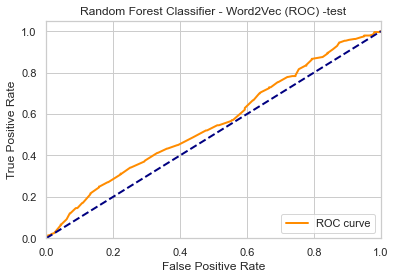

In [95]:
plt.figure()
lw = 2
plt.plot(fpr_clf_w2v, tpr_clf_w2v, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier - Word2Vec (ROC) -test')
plt.legend(loc="lower right")
plt.savefig('roc_clf_w2v.png')

              precision    recall  f1-score   support

           0       0.66      0.94      0.77       864
           1       0.41      0.08      0.14       459

    accuracy                           0.64      1323
   macro avg       0.54      0.51      0.46      1323
weighted avg       0.57      0.64      0.55      1323

Confusion Matrix:
 [[810  54]
 [421  38]]
AUC: 0.5797842027757604


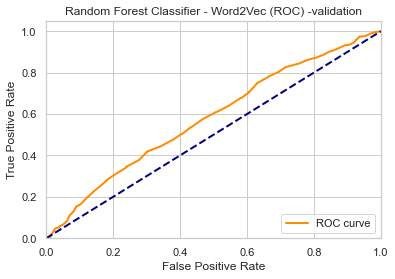

In [96]:

 #Predict y value for test dataset
y_predict_clf_w2v = clf_w2v.predict(val_X_test_vectors_w2v)
y_prob_clf_w2v = clf_w2v.predict_proba(val_X_test_vectors_w2v)[:,1]

print(classification_report(val_y_test,y_predict_clf_w2v))
print('Confusion Matrix:\n',confusion_matrix(val_y_test, y_predict_clf_w2v))
 
fpr_clf_w2v, tpr_clf_w2v, thresholds_clf_w2v = roc_curve(val_y_test, y_prob_clf_w2v)
roc_auc_clf_w2v = auc(fpr_clf_w2v, tpr_clf_w2v)
print('AUC:', roc_auc_clf_w2v)


plt.figure()
lw = 2
plt.plot(fpr_clf_w2v, tpr_clf_w2v, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier - Word2Vec (ROC) -validation')
plt.legend(loc="lower right")
plt.savefig('roc_clf_w2v.png')

***

# 4.2) Multiclass Classification

_Emoji dataset_

In [97]:
val_emoji_df = merging_labels_and_sentences('datasets/emoji/val_text', 'datasets/emoji/val_labels')

In [98]:

validation_data, ligemeget, validation_label, ligemeget_2 = train_test_split(
    val_emoji_df['tweet'], val_emoji_df['label'], test_size=1, random_state=42)

val_X_test = validation_data
val_y_test_em = validation_label

# Here we tokenize the data
#val_X_train_tok, val_X_test_tok, val_y_train, val_y_test = tokenize_train_test(validation_data, validation_data,validation_label,val_y_test)
val_w2v_X_train_tok=[nltk.word_tokenize(i) for i in validation_data]

In [99]:
emoji_df = merging_labels_and_sentences('datasets/emoji/train_text', 'datasets/emoji/train_labels')

X = emoji_df['tweet']
y = emoji_df['label']


In [100]:
# Splitting the dataset into training and testing sets
X_train_em, X_test_em, y_train_em, y_test_em = train_test_split(
    X, y, test_size = 0.1, random_state = 13)

X_train_tok_em= [nltk.word_tokenize(i) for i in X_train_em]  
X_test_tok_em= [nltk.word_tokenize(i) for i in X_test_em]

# (tf-Idf)
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf_em = tfidf_vectorizer.fit_transform(X_train_em) 
X_test_vectors_tfidf_em = tfidf_vectorizer.transform(X_test_em)

# creating the model
model_emoji = gensim.models.Word2Vec(X,min_count=1)
w2v_emoji = dict(zip(model_emoji.wv.index_to_key, model_emoji.wv))      
model_emoji.w = MeanEmbeddingVectorizer(w2v_emoji)

# converting text to numerical data using Word2Vec
X_train_vectors_w2v_em = model_emoji.w.transform(X_train_tok_em)
X_test_vectors_w2v_em = model_emoji.w.transform(X_test_tok_em)

In [101]:

# (tf-Idf)
val_tfidf_vectorizer = TfidfVectorizer(use_idf=True)
val_X_test_vectors_tfidf_em = tfidf_vectorizer.transform(validation_data)




# (#W2v)
val_X_test_tok=[nltk.word_tokenize(i) for i in validation_data]
val_X_test_vectors_w2v_em = model_emoji.w.transform(val_X_test_tok)

## 1) Multiclassification: One vs. Rest Classifier (SVM)

#### 1) SVM with w2v

In [102]:
# Creating the SVM model
#model = OneVsRestClassifier(SVC())
emoji_SVM = OneVsRestClassifier(GaussianNB())


# Fitting the model with training data
emoji_SVM.fit(X_train_vectors_w2v_em, y_train_em)
   
# Making a prediction on the test set
prediction_SVM = emoji_SVM.predict(X_test_vectors_w2v_em)
   
# Evaluating the model
print(100*"-")
print("test")
print(100*"-")
print(f"Test Set Accuracy : {accuracy_score(y_test_em, prediction_SVM) * 100} %\n\n")
print(f"Classification Report : \n\n{classification_report(y_test_em, prediction_SVM)}")

----------------------------------------------------------------------------------------------------
test
----------------------------------------------------------------------------------------------------
Test Set Accuracy : 18.88888888888889 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.74      0.53      0.62       905
           1       0.00      0.00      0.00       483
           2       0.19      0.20      0.20       460
           3       0.09      0.25      0.13       206
           4       0.10      0.02      0.04       227
           5       0.00      0.00      0.00       246
           6       0.00      0.00      0.00       188
           7       0.08      0.08      0.08       250
           8       0.00      0.00      0.00       113
           9       0.06      0.13      0.08       135
          10       0.14      0.52      0.22       195
          11       0.04      0.46      0.08       100
          12       0.1

C:\Users\Martin\Anaconda3\envs\fyp04\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Martin\Anaconda3\envs\fyp04\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Martin\Anaconda3\envs\fyp04\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
# Making a prediction on the test set
prediction_SVM = emoji_SVM.predict(val_X_test_vectors_w2v_em)
 # Evaluating the model
print(100*"-")
print("validation")
print(100*"-")  
# Evaluating the model
print(f"Test Set Accuracy : {accuracy_score(val_y_test_em, prediction_SVM) * 100} %\n\n")
print(f"Classification Report : \n\n{classification_report(val_y_test_em, prediction_SVM)}")

----------------------------------------------------------------------------------------------------
validation
----------------------------------------------------------------------------------------------------
Test Set Accuracy : 9.521904380876176 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.38      0.06      0.10      1056
           1       0.00      0.00      0.00       521
           2       0.17      0.25      0.20       503
           3       0.09      0.30      0.14       308
           4       0.05      0.01      0.02       243
           5       0.00      0.00      0.00       238
           6       0.00      0.00      0.00       204
           7       0.05      0.10      0.06       199
           8       0.00      0.00      0.00       177
           9       0.04      0.09      0.06       171
          10       0.11      0.62      0.18       159
          11       0.05      0.38      0.09       143
          12    

C:\Users\Martin\Anaconda3\envs\fyp04\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Martin\Anaconda3\envs\fyp04\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Martin\Anaconda3\envs\fyp04\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2) Multiclassificarion: One vs. One Classifier (SVC)

#### 1) SVG with w2v

In [104]:

emoji_SVC = OneVsOneClassifier(GaussianNB())


# Fitting the model with training data
emoji_SVC.fit(X_train_vectors_w2v_em, y_train_em)
   
# Making a prediction on the test set
prediction_SVC = emoji_SVC.predict(X_test_vectors_w2v_em)

# Evaluating the model
print(100*"-")
print("test")
print(100*"-")
# Evaluating the model
print(f"Test Set Accuracy : {accuracy_score(y_test_em, prediction_SVC) * 100} %\n\n")

print(f"Classification Report : \n\n{classification_report(y_test_em, prediction_SVC)}")

----------------------------------------------------------------------------------------------------
test
----------------------------------------------------------------------------------------------------
Test Set Accuracy : 14.555555555555555 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.72      0.26      0.38       905
           1       0.00      0.00      0.00       483
           2       0.19      0.18      0.19       460
           3       0.09      0.26      0.13       206
           4       0.10      0.02      0.04       227
           5       0.00      0.00      0.00       246
           6       0.00      0.00      0.00       188
           7       0.08      0.08      0.08       250
           8       0.00      0.00      0.00       113
           9       0.06      0.13      0.08       135
          10       0.14      0.51      0.22       195
          11       0.04      0.46      0.08       100
          12       0.

C:\Users\Martin\Anaconda3\envs\fyp04\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Martin\Anaconda3\envs\fyp04\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Martin\Anaconda3\envs\fyp04\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
prediction_SVC = emoji_SVC.predict(val_X_test_vectors_w2v_em)

# Evaluating the model
print(100*"-")
print("validation")
print(100*"-")
# Evaluating the model
print(f"Test Set Accuracy : {accuracy_score(val_y_test_em, prediction_SVC) * 100} %\n\n")

print(f"Classification Report : \n\n{classification_report(val_y_test_em, prediction_SVC)}")

----------------------------------------------------------------------------------------------------
validation
----------------------------------------------------------------------------------------------------
Test Set Accuracy : 8.921784356871374 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.26      0.02      0.04      1056
           1       0.00      0.00      0.00       521
           2       0.17      0.22      0.19       503
           3       0.09      0.31      0.14       308
           4       0.05      0.01      0.02       243
           5       0.00      0.00      0.00       238
           6       0.00      0.00      0.00       204
           7       0.05      0.10      0.07       199
           8       0.00      0.00      0.00       177
           9       0.04      0.09      0.05       171
          10       0.11      0.62      0.18       159
          11       0.05      0.38      0.09       143
          12    

C:\Users\Martin\Anaconda3\envs\fyp04\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Martin\Anaconda3\envs\fyp04\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Martin\Anaconda3\envs\fyp04\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3) kNN for Multiclassification

#### 1) KNN  with tl-idf

In [106]:
neigh_knn = KNeighborsClassifier(n_neighbors=10)
neigh_knn.fit(X_train_vectors_tfidf_em, y_train_em)
pred_knn = neigh_knn.predict(X_test_vectors_tfidf_em)
print(100*"-")
print("test")
print(100*"-")
print(f"Test Set Accuracy : {accuracy_score(y_test_em, pred_knn) * 100} %\n\n")
print(f"Classification Report : \n\n{classification_report(y_test_em, pred_knn)}")

----------------------------------------------------------------------------------------------------
test
----------------------------------------------------------------------------------------------------
Test Set Accuracy : 23.044444444444444 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.25      0.63      0.36       905
           1       0.15      0.17      0.16       483
           2       0.31      0.30      0.31       460
           3       0.14      0.05      0.07       206
           4       0.28      0.15      0.19       227
           5       0.10      0.04      0.06       246
           6       0.07      0.05      0.06       188
           7       0.13      0.20      0.16       250
           8       0.18      0.07      0.10       113
           9       0.17      0.02      0.04       135
          10       0.28      0.09      0.14       195
          11       0.46      0.24      0.32       100
          12       0.

In [107]:
print(100*"-")
print("validation")
print(100*"-")
pred_knn = neigh_knn.predict(val_X_test_vectors_tfidf_em)
print(f"Test Set Accuracy : {accuracy_score(val_y_test_em, pred_knn) * 100} %\n\n")
print(f"Classification Report : \n\n{classification_report(val_y_test_em, pred_knn)}")

----------------------------------------------------------------------------------------------------
validation
----------------------------------------------------------------------------------------------------
Test Set Accuracy : 23.264652930586116 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.26      0.62      0.37      1056
           1       0.15      0.18      0.17       521
           2       0.27      0.30      0.28       503
           3       0.17      0.05      0.08       308
           4       0.37      0.25      0.30       243
           5       0.12      0.07      0.09       238
           6       0.07      0.06      0.06       204
           7       0.11      0.21      0.15       199
           8       0.12      0.03      0.05       177
           9       0.19      0.04      0.06       171
          10       0.11      0.03      0.04       159
          11       0.38      0.13      0.20       143
          12   

#### 2) kNN with w2v

In [108]:
neigh_knn = KNeighborsClassifier(n_neighbors=3)
neigh_knn.fit(X_train_vectors_w2v_em, y_train_em)
pred_knn = neigh_knn.predict(X_test_vectors_w2v_em)
print(100*"-")
print("test")
print(100*"-")
print(f"Test Set Accuracy : {accuracy_score(y_test_em, pred_knn) * 100} %\n\n")
print(f"Classification Report : \n\n{classification_report(y_test_em, pred_knn)}")

----------------------------------------------------------------------------------------------------
test
----------------------------------------------------------------------------------------------------
Test Set Accuracy : 24.422222222222224 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.53      0.80      0.64       905
           1       0.13      0.19      0.15       483
           2       0.13      0.32      0.19       460
           3       0.08      0.13      0.10       206
           4       0.12      0.09      0.11       227
           5       0.06      0.04      0.05       246
           6       0.05      0.03      0.04       188
           7       0.05      0.02      0.03       250
           8       0.00      0.00      0.00       113
           9       0.00      0.00      0.00       135
          10       0.38      0.24      0.29       195
          11       0.00      0.00      0.00       100
          12       0.

In [109]:
pred_knn = neigh_knn.predict(val_X_test_vectors_w2v_em)
print(100*"-")
print("validation")
print(100*"-")
print(f"Test Set Accuracy : {accuracy_score(val_y_test_em, pred_knn) * 100} %\n\n")
print(f"Classification Report : \n\n{classification_report(val_y_test_em, pred_knn)}")

----------------------------------------------------------------------------------------------------
validation
----------------------------------------------------------------------------------------------------
Test Set Accuracy : 12.32246449289858 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.24      0.20      0.22      1056
           1       0.12      0.20      0.15       521
           2       0.10      0.33      0.15       503
           3       0.06      0.09      0.07       308
           4       0.08      0.07      0.08       243
           5       0.05      0.04      0.04       238
           6       0.06      0.05      0.05       204
           7       0.06      0.05      0.06       199
           8       0.00      0.00      0.00       177
           9       0.05      0.01      0.02       171
          10       0.28      0.26      0.27       159
          11       0.12      0.01      0.01       143
          12    

# 4) Multiclass: CNN 

#### 1) CNN with w2v

In [110]:
#Train
li = []
for elm in  X_train_vectors_w2v_em:
    li.append(elm.reshape(10,10,1))
X_train_vectors_w2v_em = np.array(li)
something = abs(X_train_vectors_w2v_em)
maximum = np.amax(something)
X_train_vectors_w2v_em = np.divide(something,maximum)

In [111]:
#Test
li = []
for elm in  X_test_vectors_w2v_em:
    li.append(elm.reshape(10,10,1))
X_test_vectors_w2v_em = np.array(li)
something = abs(X_test_vectors_w2v_em)
maximum = np.amax(something)
X_test_vectors_w2v_em = np.divide(something,maximum)

In [112]:
y_train_em = to_categorical(list(y_train_em))
y_test_em = to_categorical(list(y_test_em))

In [113]:
#create model
sigurt = Sequential()
#add model layers
sigurt.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(10,10,1)))
sigurt.add(Conv2D(32, kernel_size=3, activation="relu"))
sigurt.add(Flatten())
sigurt.add(Dense(20, activation="softmax"))
#compile model using accuracy to measure model performance
sigurt.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
sigurt.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 8, 64)          640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 32)          18464     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 20)                23060     
Total params: 42,164
Trainable params: 42,164
Non-trainable params: 0
_________________________________________________________________


In [114]:
#train the model
sigurt.fit(X_train_vectors_w2v_em, y_train_em, validation_data=(X_test_vectors_w2v_em, y_test_em), epochs=3)

Epoch 1/3
1266/1266 [==============================] - 7s 5ms/step - loss: 2.4562 - accuracy: 0.2641 - val_loss: 2.3980 - val_accuracy: 0.2744
Epoch 2/3
1266/1266 [==============================] - 6s 5ms/step - loss: 2.3628 - accuracy: 0.2840 - val_loss: 2.3686 - val_accuracy: 0.2747
Epoch 3/3
1266/1266 [==============================] - 7s 5ms/step - loss: 2.3393 - accuracy: 0.2880 - val_loss: 2.3568 - val_accuracy: 0.2762


In [115]:
pred = np.array([ np.argmax(x) for x in sigurt.predict(X_test_vectors_w2v_em)])

In [116]:
y_pred = np.array([ np.argmax(x) for x in y_test_em])

In [117]:
print(100*"-")
print("test")
print(100*"-")
print(classification_report(y_pred,pred))

----------------------------------------------------------------------------------------------------
test
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       905
           1       0.13      0.29      0.18       483
           2       0.14      0.65      0.23       460
           3       0.00      0.00      0.00       206
           4       0.00      0.00      0.00       227
           5       0.33      0.00      0.01       246
           6       0.00      0.00      0.00       188
           7       0.18      0.04      0.06       250
           8       0.00      0.00      0.00       113
           9       0.00      0.00      0.00       135
          10       0.36      0.48      0.41       195
          11       0.00      0.00      0.00       100
          12       0.00      0.00      0.00       128
          13       0.00      0.00   

C:\Users\Martin\Anaconda3\envs\fyp04\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Martin\Anaconda3\envs\fyp04\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Martin\Anaconda3\envs\fyp04\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:
#Test
li = []
for elm in  val_X_test_vectors_w2v_em:
    li.append(elm.reshape(10,10,1))
val_X_test_vectors_w2v_em = np.array(li)
something = abs(val_X_test_vectors_w2v_em)
maximum = np.amax(something)
val_X_test_vectors_w2v_em = np.divide(something,maximum)

In [119]:
val_y_test_em = to_categorical(list(val_y_test_em))

In [120]:
pred = np.array([ np.argmax(x) for x in sigurt.predict(val_X_test_vectors_w2v_em)])

In [121]:
y_pred = np.array([ np.argmax(x) for x in val_y_test_em])

In [122]:
print(100*"-")
print("validation")
print(100*"-")
print(classification_report(y_pred,pred))

----------------------------------------------------------------------------------------------------
validation
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.38      0.07      0.11      1056
           1       0.12      0.17      0.14       521
           2       0.11      0.80      0.19       503
           3       0.00      0.00      0.00       308
           4       0.00      0.00      0.00       243
           5       0.00      0.00      0.00       238
           6       0.00      0.00      0.00       204
           7       0.09      0.04      0.06       199
           8       0.00      0.00      0.00       177
           9       0.00      0.00      0.00       171
          10       0.27      0.48      0.35       159
          11       0.00      0.00      0.00       143
          12       0.00      0.00      0.00       129
          13       0.00      0

C:\Users\Martin\Anaconda3\envs\fyp04\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Martin\Anaconda3\envs\fyp04\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Martin\Anaconda3\envs\fyp04\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
